In [1]:
import os

os.chdir("/home/jovyan/work")
print(os.getcwd())

/home/jovyan/work


In [2]:
# !pip install numpy networkx matplotlib
import networkx as nx
import json
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import random
import qiskit
import copy

In [3]:
from graph_basics import GraphCreator, create_starting_config, update_distance_map
from graph_utils import (
    create_idc_dictionary,
    create_dist_dict,
    get_ion_chains
)
from plot import plot_state

In [4]:
# JSONファイルの読み込み
config_file = "cases/full_register_access_12.json"
# config_file = "cases/qft_20.json"
# config_file = "cases/qft_8_no_swap.json"
with pathlib.Path(config_file).open("r") as f:
    config = json.load(f)

# 変数の設定
arch = config["arch"]
max_timesteps = config["max_timesteps"]
num_ion_chains = config["num_ion_chains"]
filename = config["qu_alg"]

m, n, v, h = arch
ion_chain_size_vertical = v
ion_chain_size_horizontal = h

graph_creator = GraphCreator(m, n, ion_chain_size_vertical, ion_chain_size_horizontal)
# graph_creator = GraphCreator(m, n, 3, 3)
G = graph_creator.get_graph()
# Initialize ions on edges using an edge attribute
nx.set_edge_attributes(G, {edge: [] for edge in G.edges}, "ions")

n_of_registers = create_starting_config(G, num_ion_chains, seed=0)
# n_of_registers = create_starting_config(G, num_ion_chains)
# Example of adding ions to specific edges
# G.edges[((0, 0), (0, 1))]['ions'] = [0]
# G.edges[((1, 0), (2, 0))]['ions'] = [1]
# G.edges[((2, 1), (2, 2))]['ions'] = [2]
# G.edges[((4, 2), (4, 3))]['ions'] = [3]
print("path_to_pz", graph_creator.path_to_pz)
print("path_from_pz", graph_creator.path_from_pz)

G.idc_dict = create_idc_dictionary(G)
print("idc_dict", G.idc_dict)
G.dist_dict = create_dist_dict(G, graph_creator.exit, graph_creator.processing_zone)
print("dist_dict", G.dist_dict)
# Example usage of get_ion_chains
ion_chains = get_ion_chains(G)
print("ion_chains", ion_chains)

In [6]:
# from qiskit.visualization import dag_drawer
from qiskit.converters import circuit_to_dagdependency
from qiskit import QuantumCircuit

from compilation import create_initial_sequence, get_front_layer_ions, get_front_layer

distance_map = update_distance_map(ion_chains, G.dist_dict)
seq, flat_seq, dag_dep, next_node = create_initial_sequence(distance_map, filename)
init_seq_len = len(seq)
# print("seq", seq)
# print("flat_seq", flat_seq)
print("seq_len", len(seq))
# print("flat_seq_len", len(flat_seq))
# dag_drawer(dag_dep)

seq_len 12


In [7]:
# qc = QuantumCircuit.from_qasm_file(filename)
# qc.draw(output='mpl')

In [8]:
# idx1 = get_idx_from_idc(G.idc_dict, ((0, 0), (0, 1)))
# print("idx1", idx1)
# idc1 = get_idc_from_idx(G.idc_dict, idx1)
# print("idc1", idc1)

# idc4 = get_idc_from_idx(G.idc_dict, 4)
# print("idc4", idc4)

print("Nodes in the graph:")
for node in G.nodes(data=True):
    if node[1]["node_type"] != "junction_node":
        print(node)

Nodes in the graph:
((4, 4.0), {'node_type': 'exit_connection_node', 'color': 'y'})
((5, 5.0), {'node_type': 'processing_zone_node', 'color': 'r'})
((4, 2.5), {'node_type': 'entry_connection_node', 'color': 'orange'})
((6, 5), {'node_type': 'parking_node', 'color': 'r'})


In [9]:
print("Edges in the graph:")
for edge in G.edges(data=True):
    if edge[2]["edge_type"] != "trap":
        print(edge)

Edges in the graph:
((3, 0), (4, 2.5), {'edge_type': 'entry', 'color': 'k', 'ions': []})
((3, 3), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': []})
((4, 4.0), (5, 5.0), {'edge_type': 'exit', 'color': 'k', 'ions': []})
((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': []})
((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'g', 'ions': []})


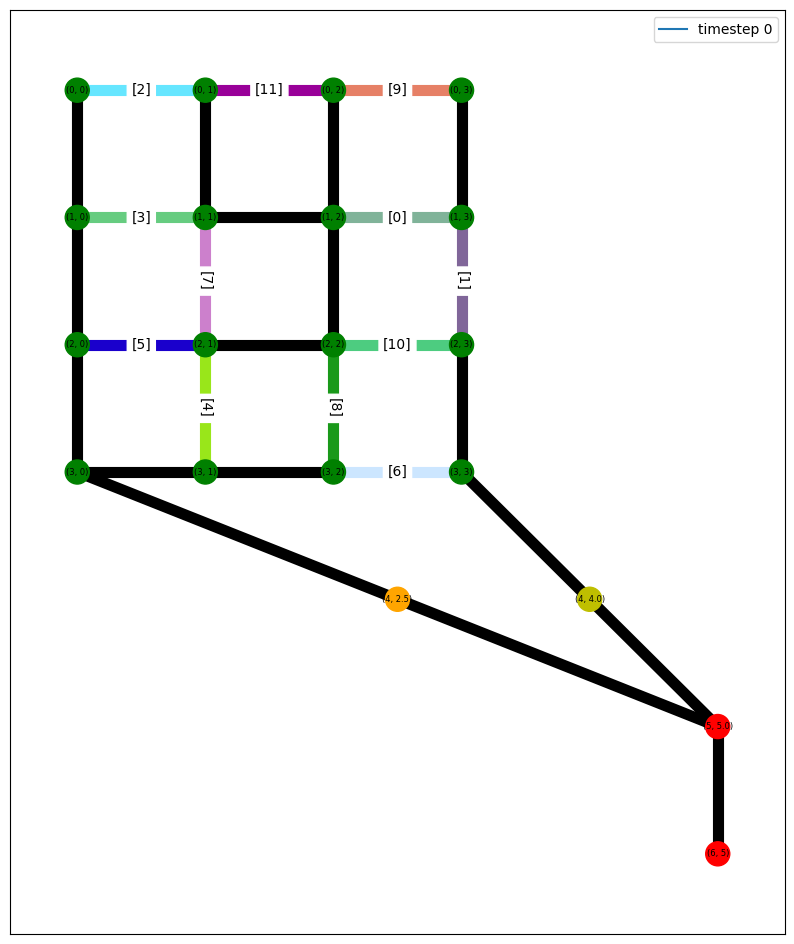

In [10]:
timestep = 0
labels = ("timestep %s" % timestep, None)

# Example usage of plot_state
plot_state(G, labels, show_plot=True)

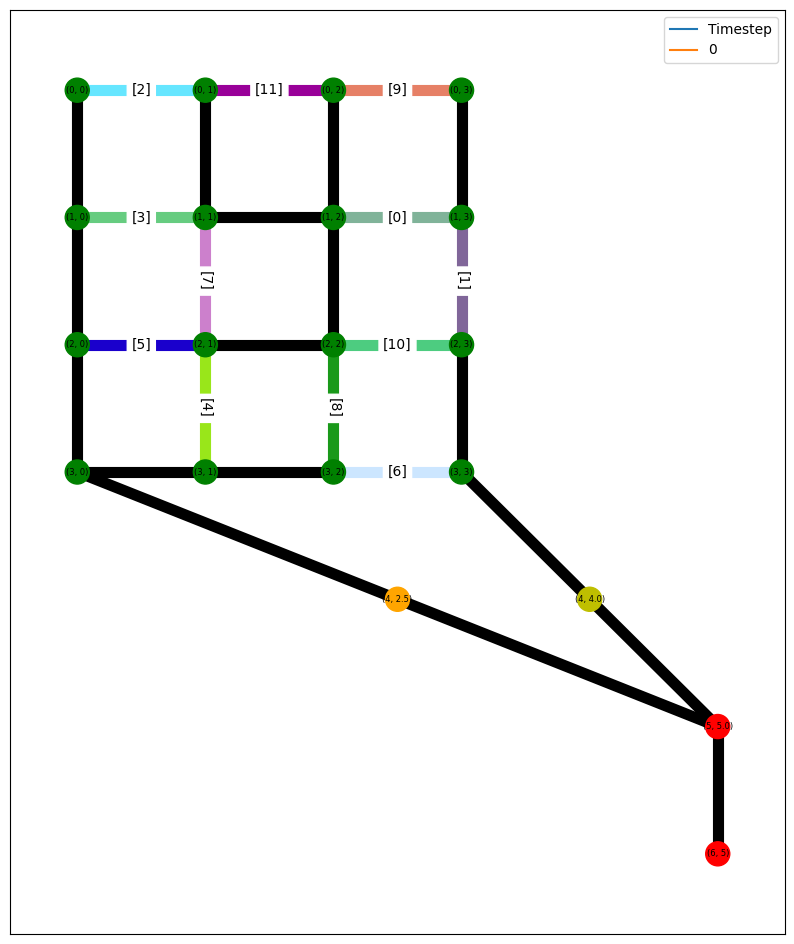

Next Node ID: 6, qindices: [6]
unique_seq [6, 1, 8, 10, 0, 4, 5, 7, 9, 3, 11, 2]
move_list [6, 1, 8, 10, 0, 4, 5, 7, 9, 3, 11, 2]
go to PZ


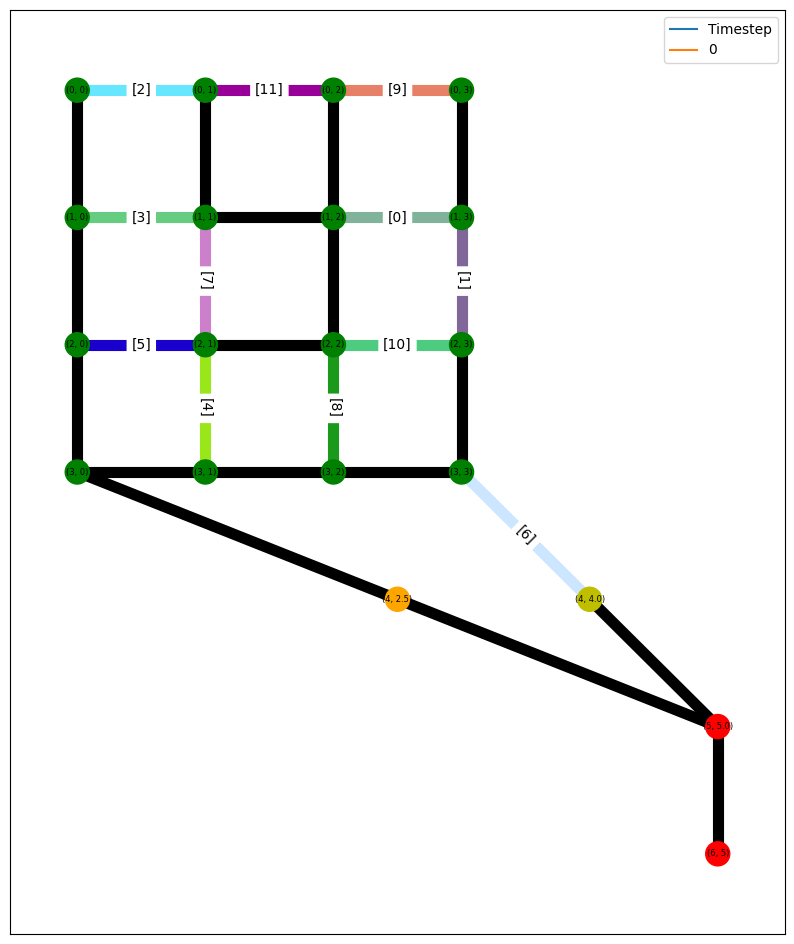

go to PZ


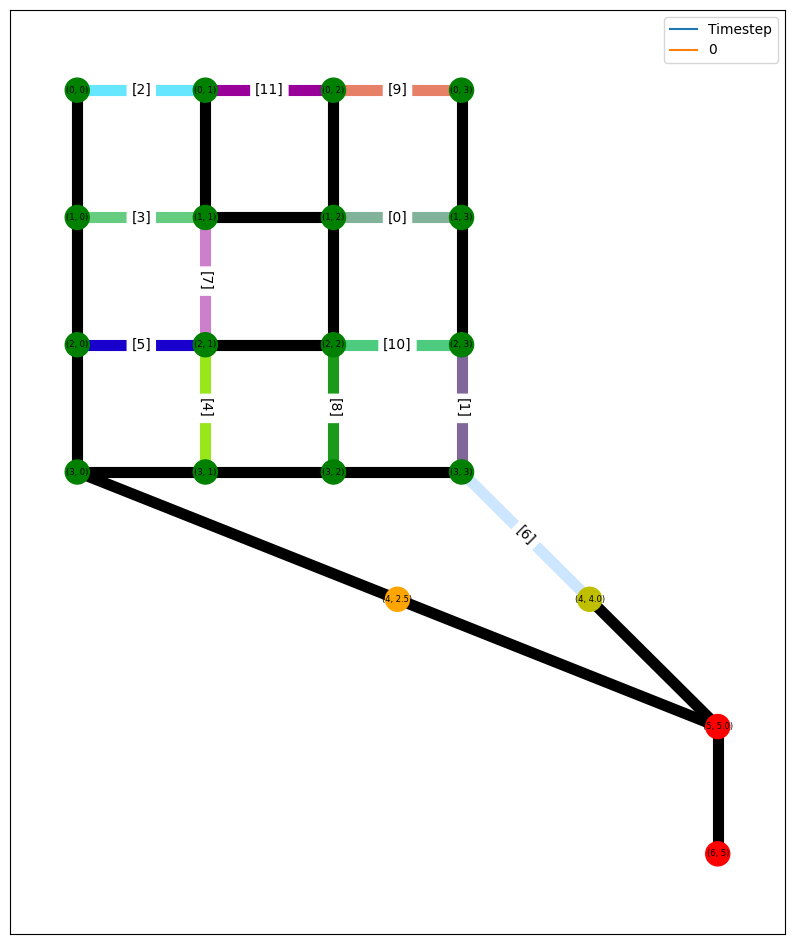

go to PZ


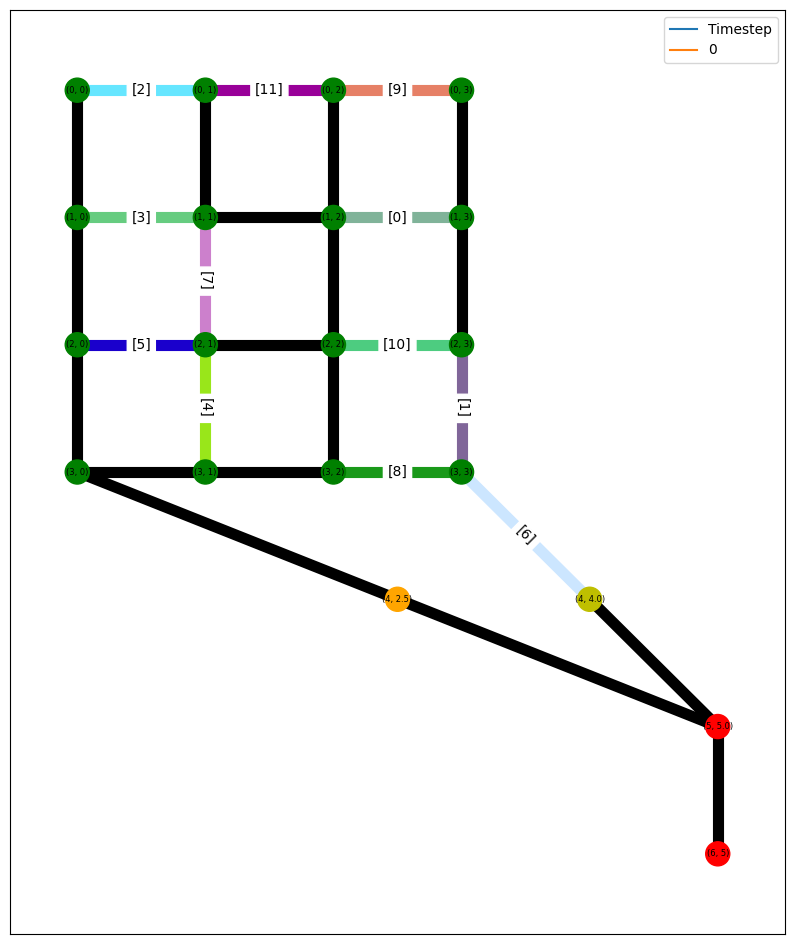

go to PZ


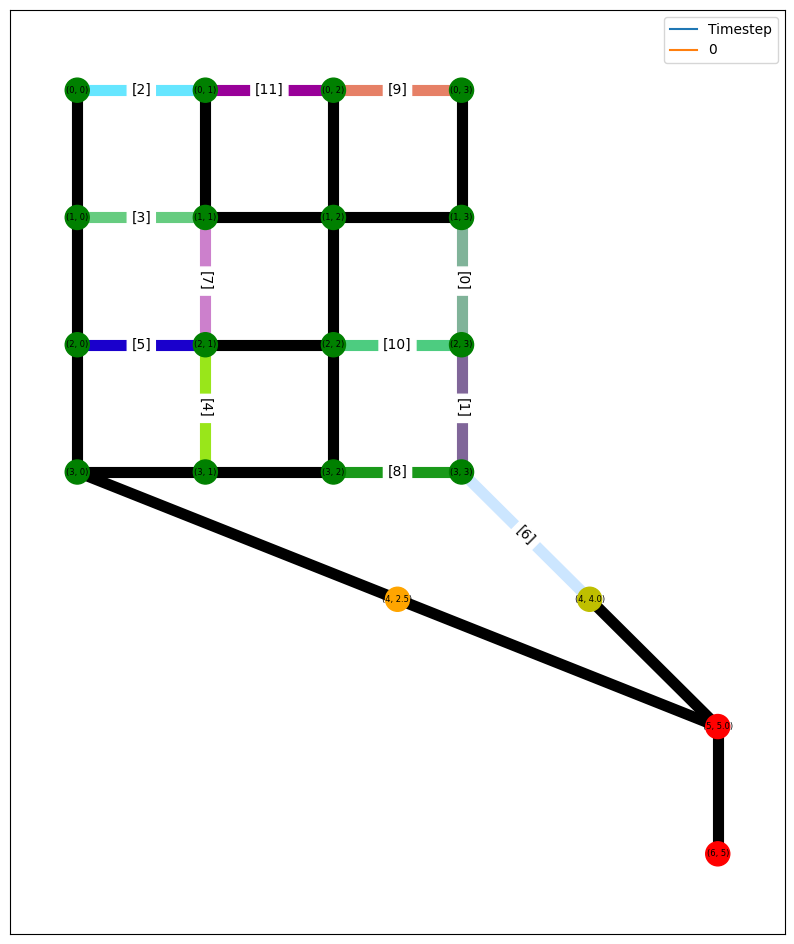

go to PZ


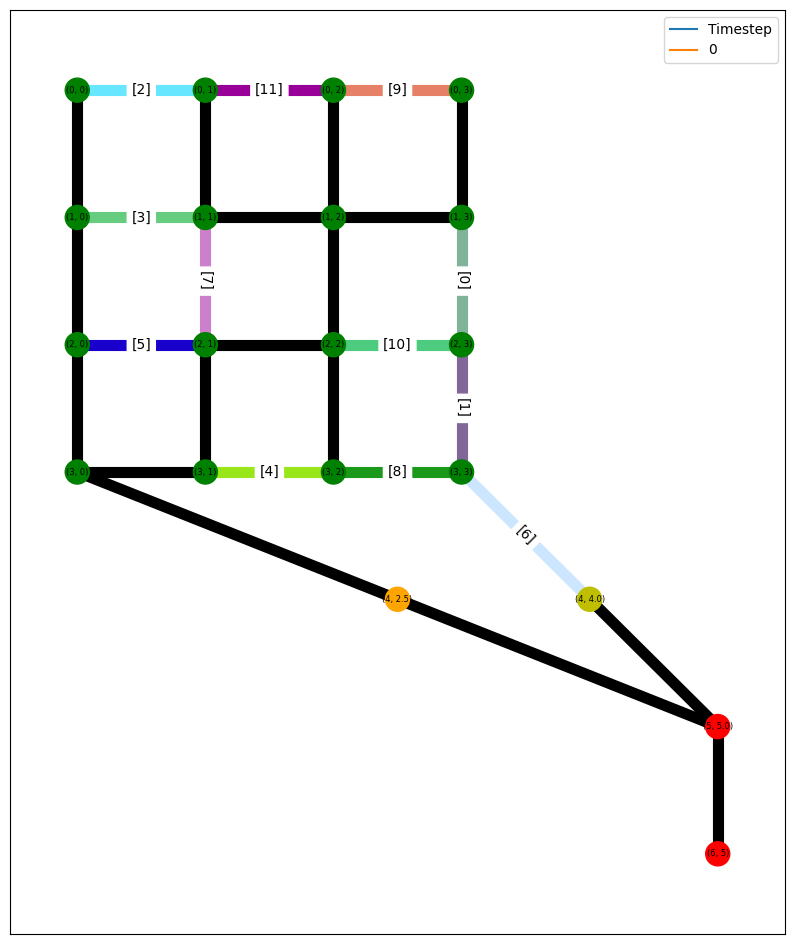

go to PZ


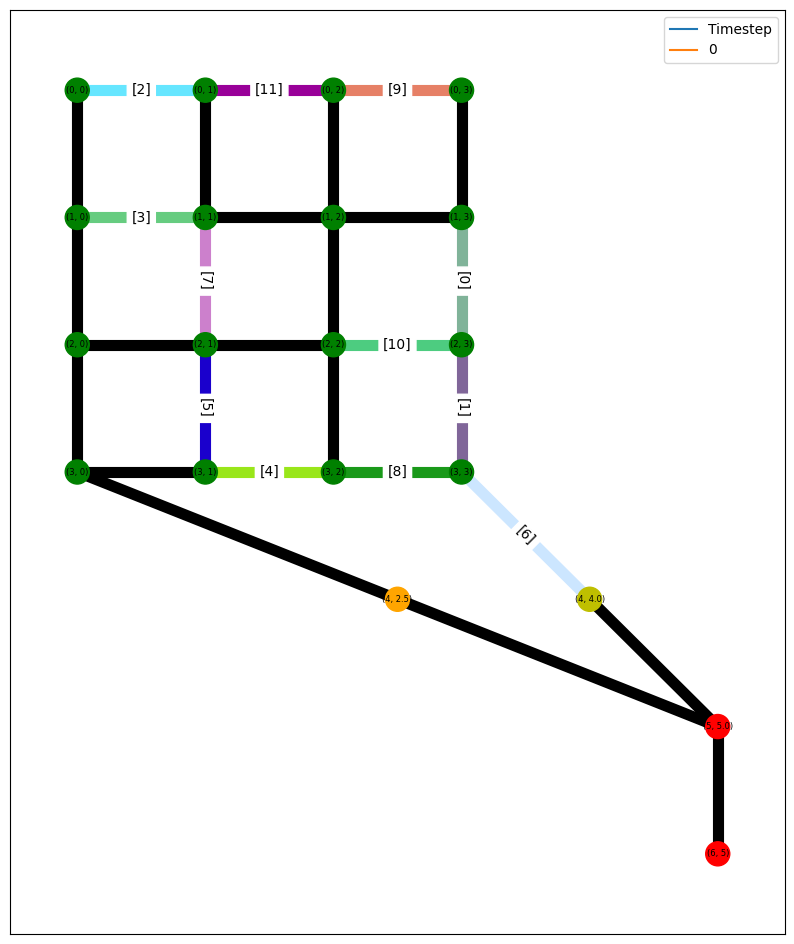

go to PZ


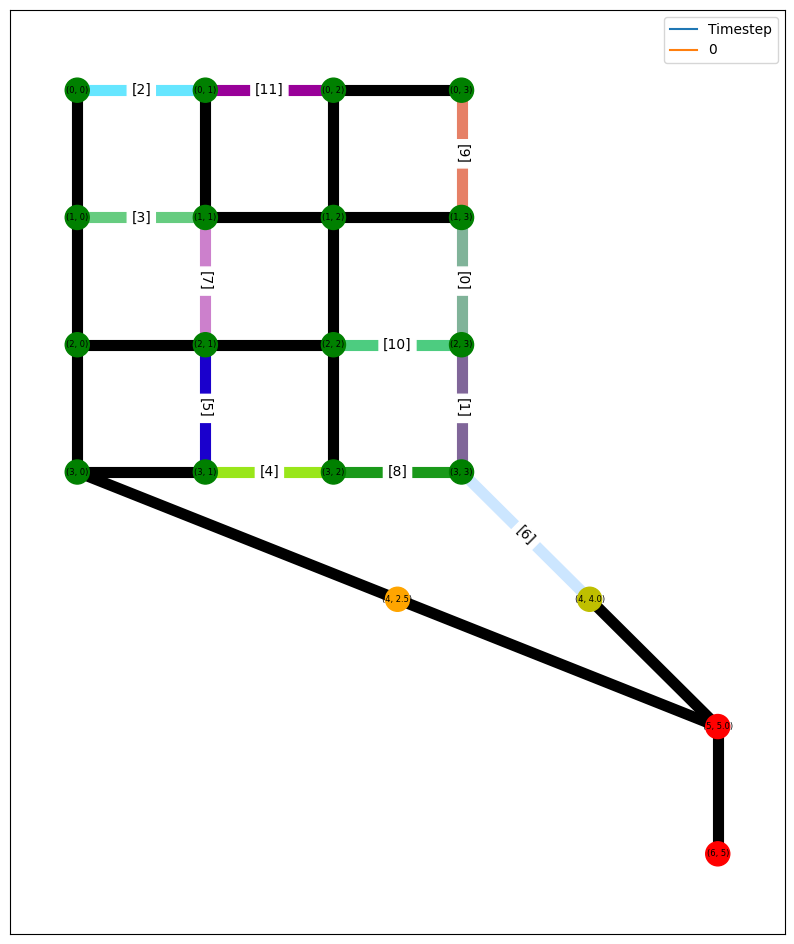

go to PZ


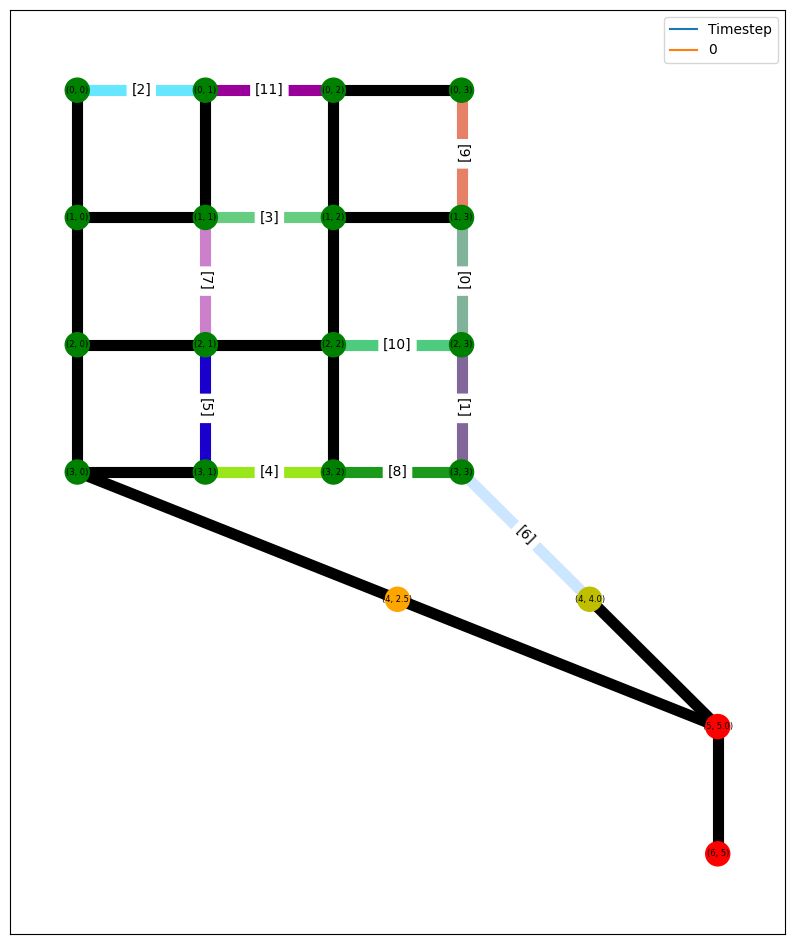

go to PZ


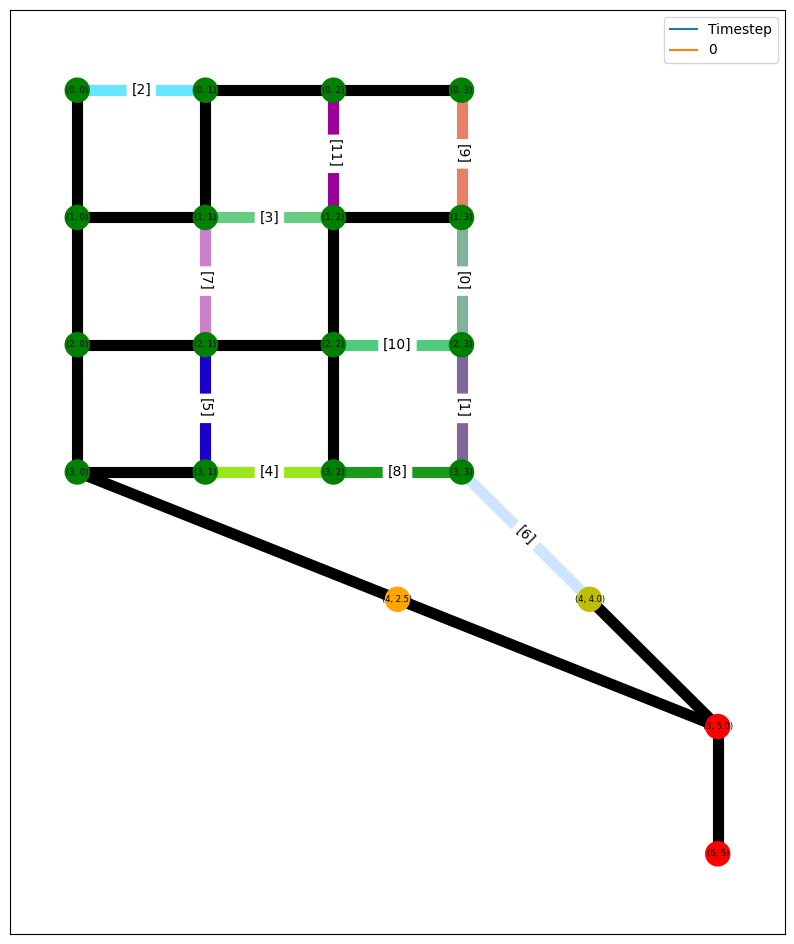

go to PZ


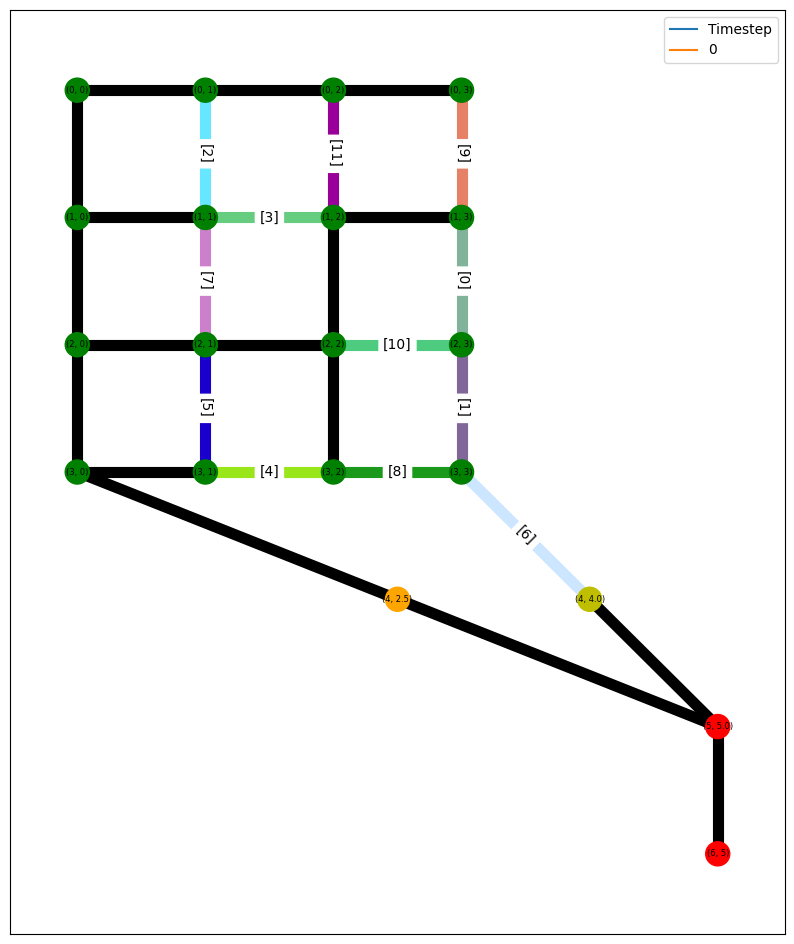

process pz
Next Node ID: 6, qindices: [6]
unique_seq [6, 1, 8, 0, 4, 10, 5, 9, 3, 7, 11, 2]
move_list [6, 1, 8, 0, 4, 10, 5, 9, 3, 7, 11, 2]
go to PZ


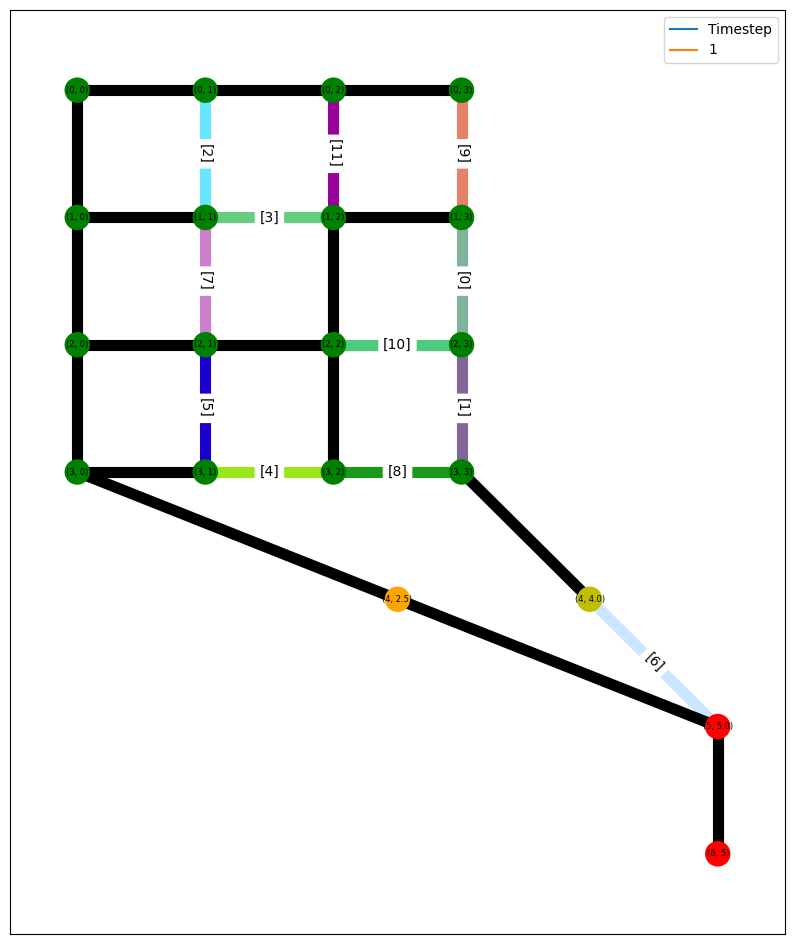

go to PZ


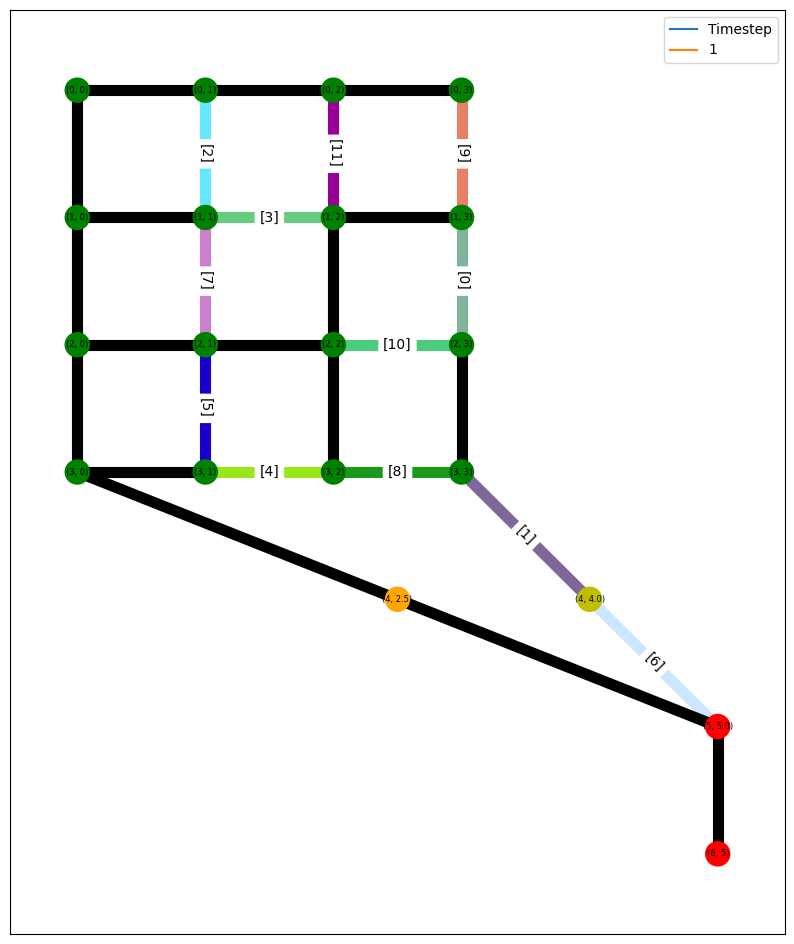

go to PZ


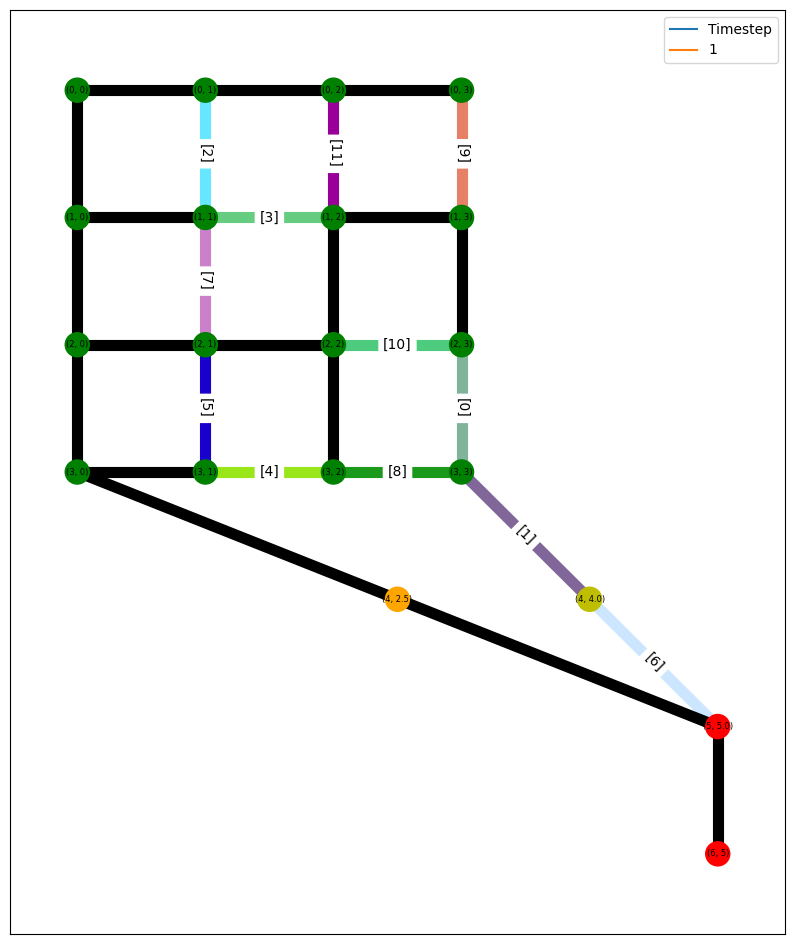

next_edge None
rollback 2
next_edge ((3, 2), (2, 2), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})


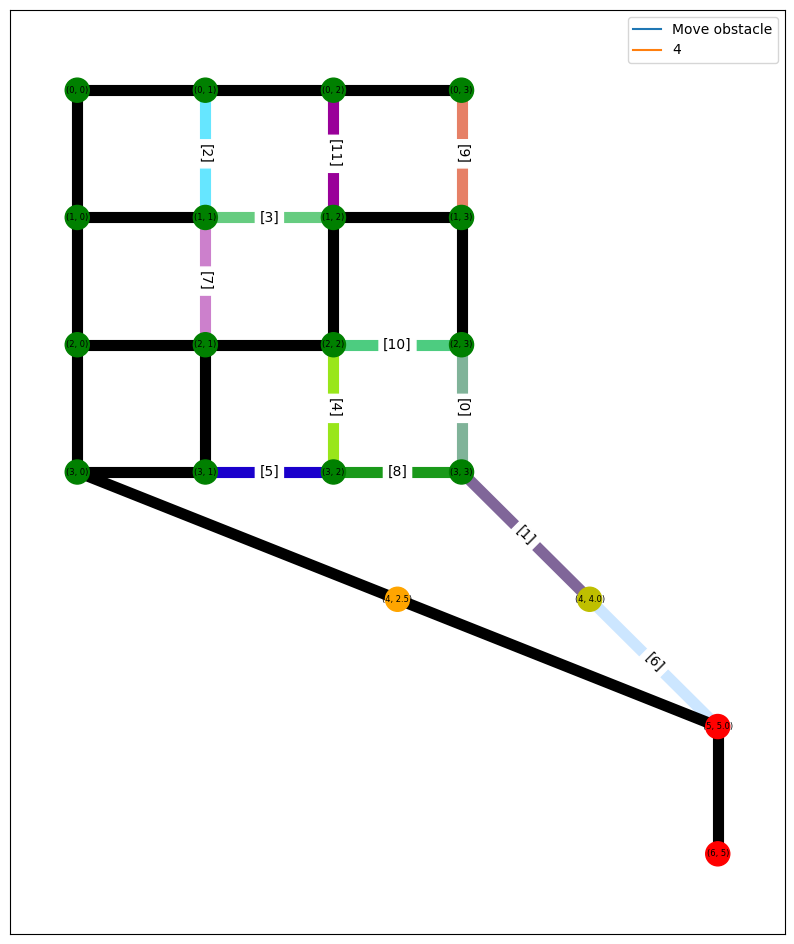

go to PZ


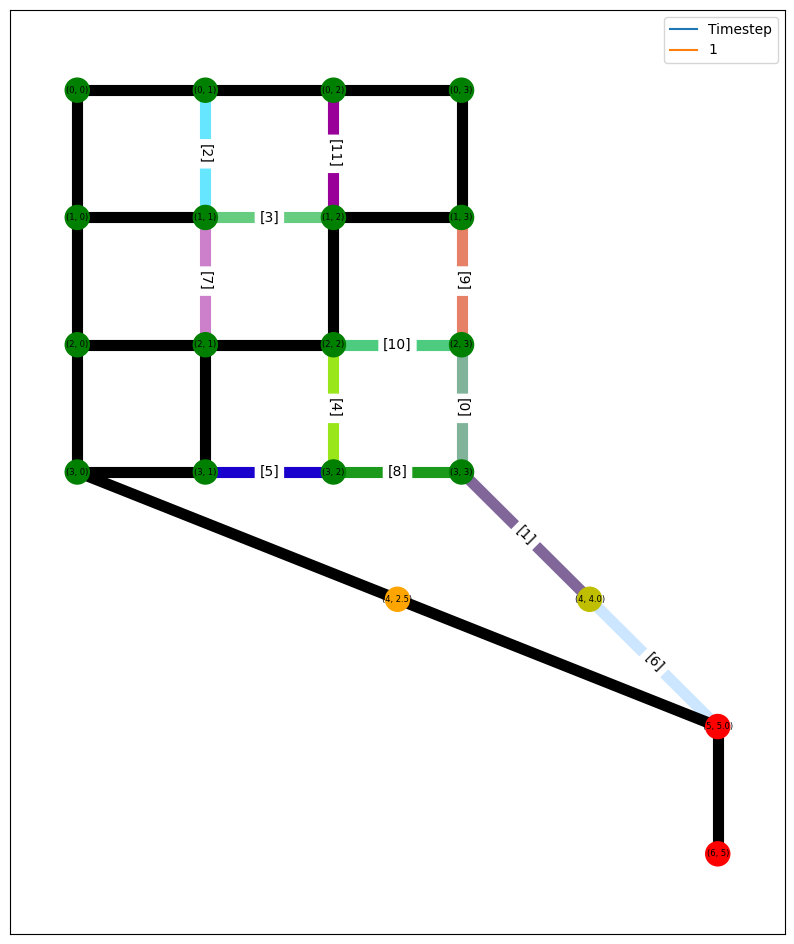

go to PZ


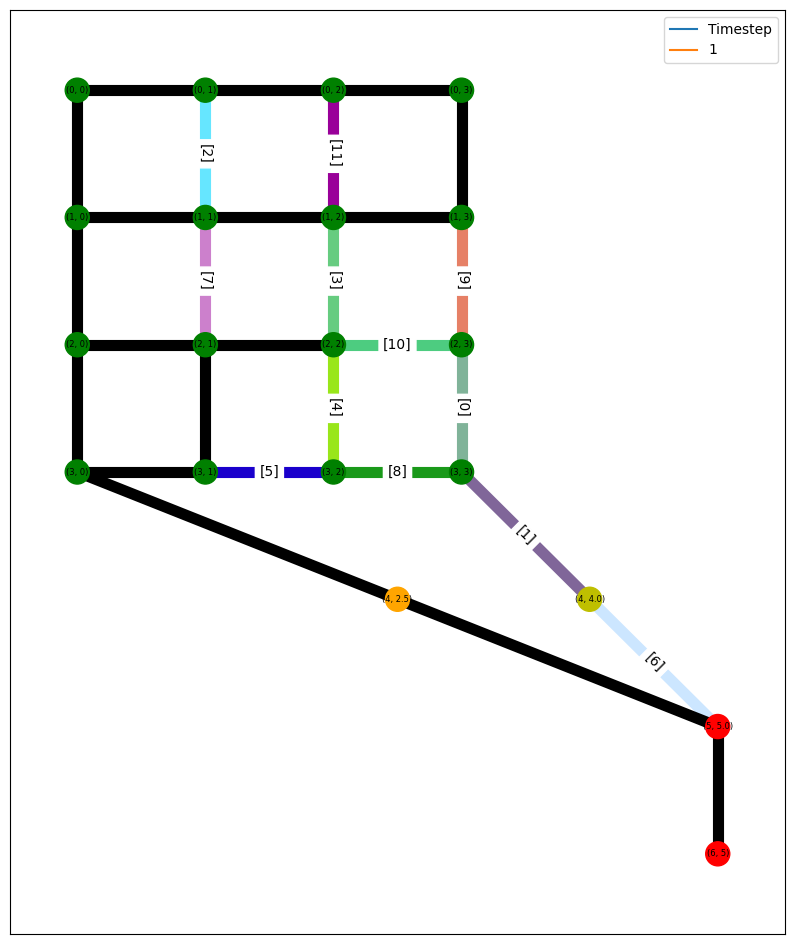

go to PZ


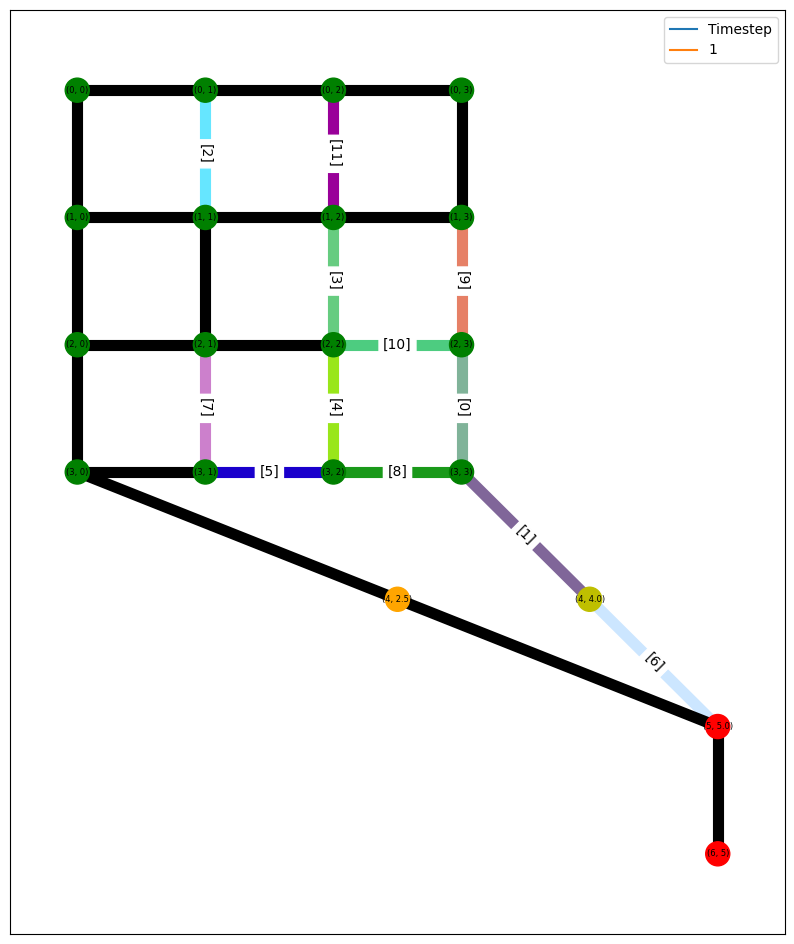

go to PZ


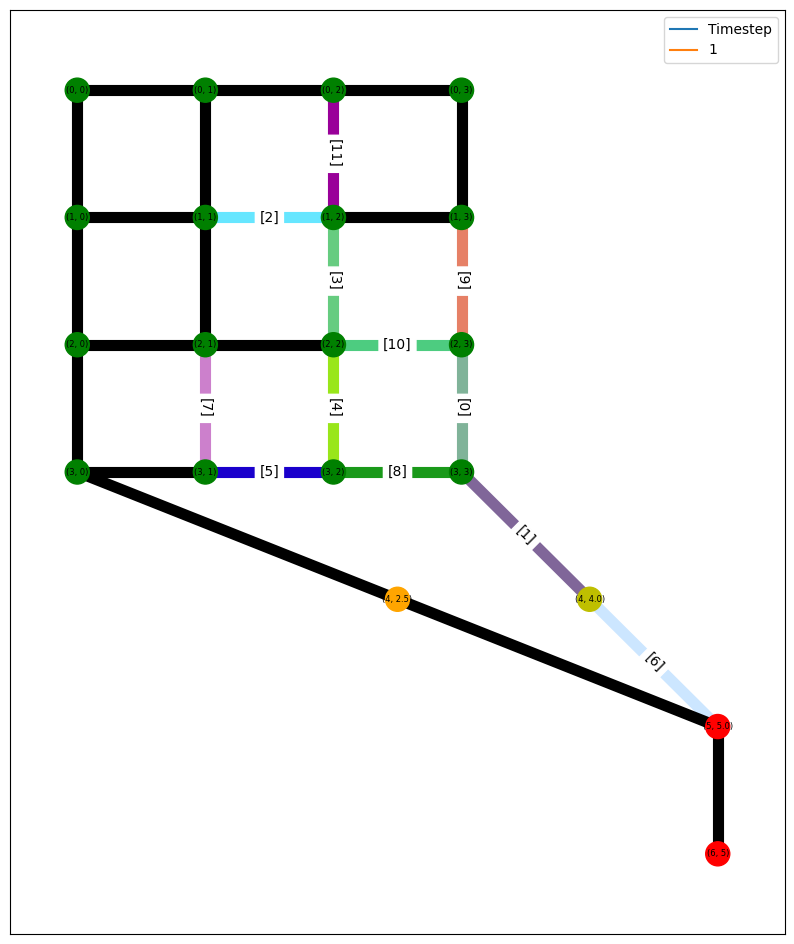

process pz
Next Node ID: 6, qindices: [6]
unique_seq [6, 1, 0, 8, 4, 5, 9, 10, 3, 7, 2, 11]
move_list [6, 1, 0, 8, 4, 5, 9, 10, 3, 7, 2, 11]
go to PZ


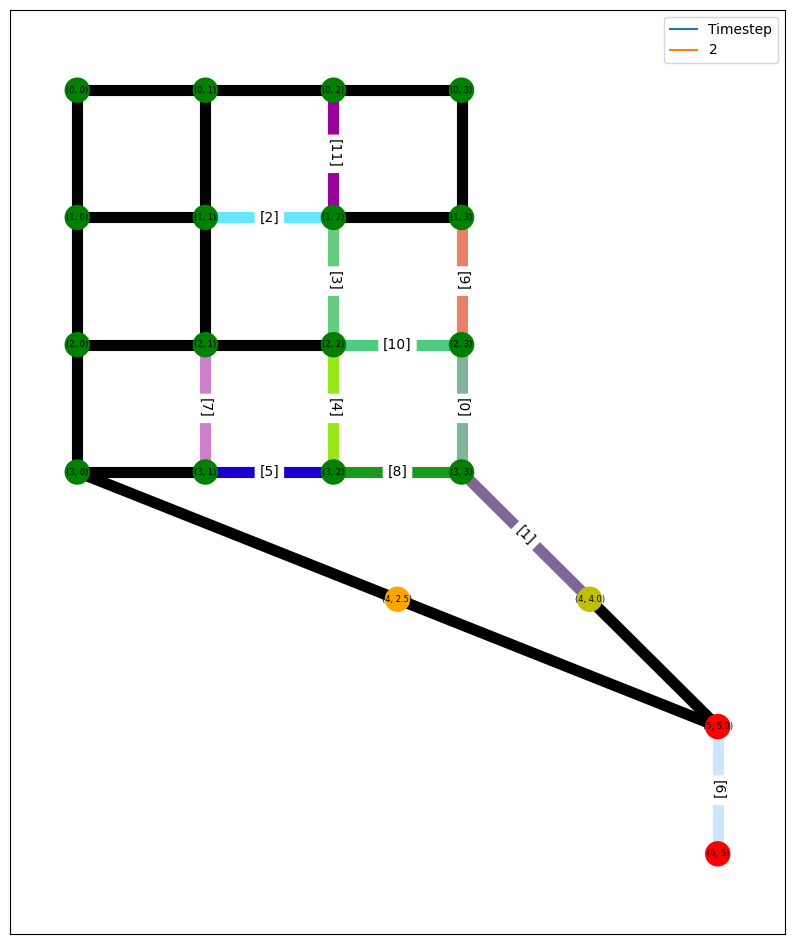

go to PZ


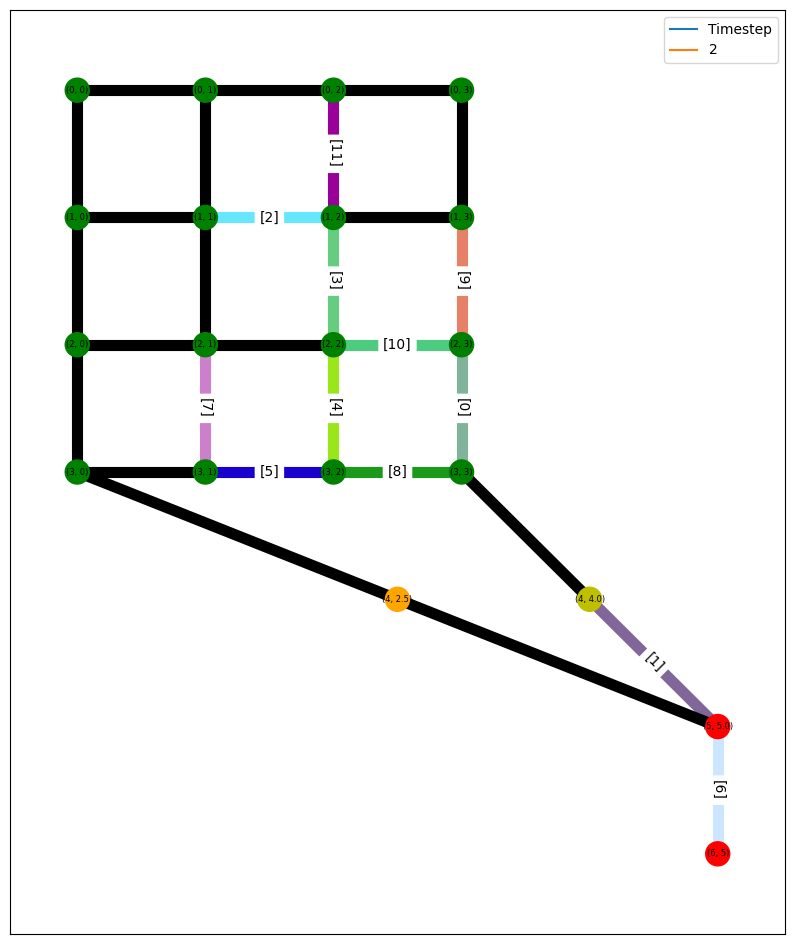

go to PZ


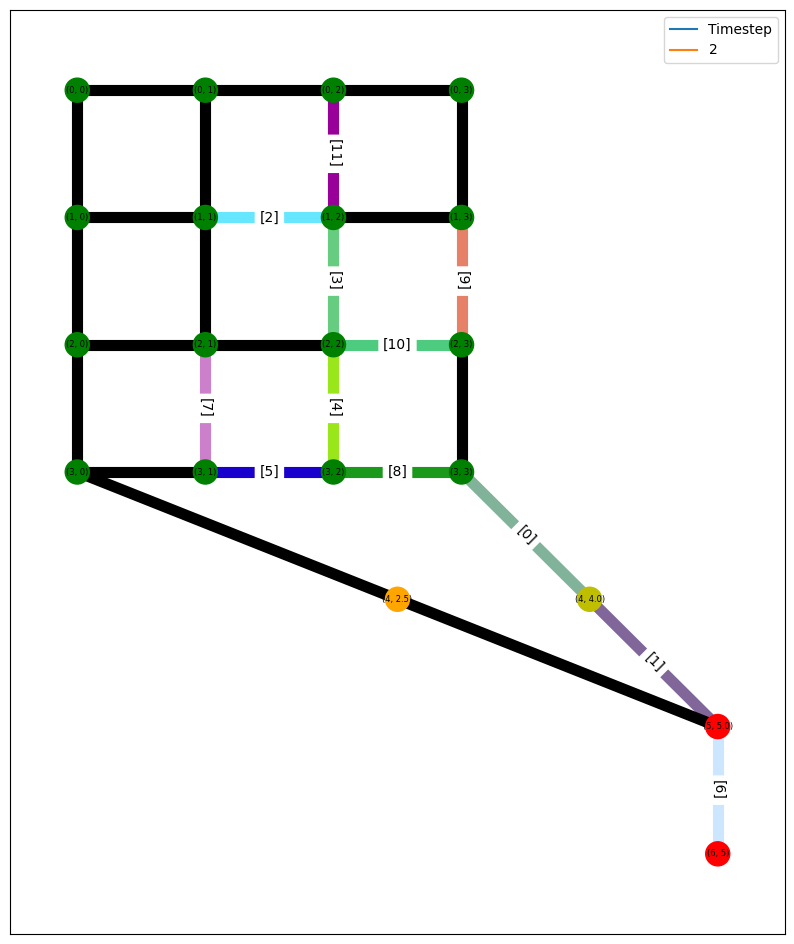

next_edge None
rollback 2
next_edge None
rollback 2
go to PZ


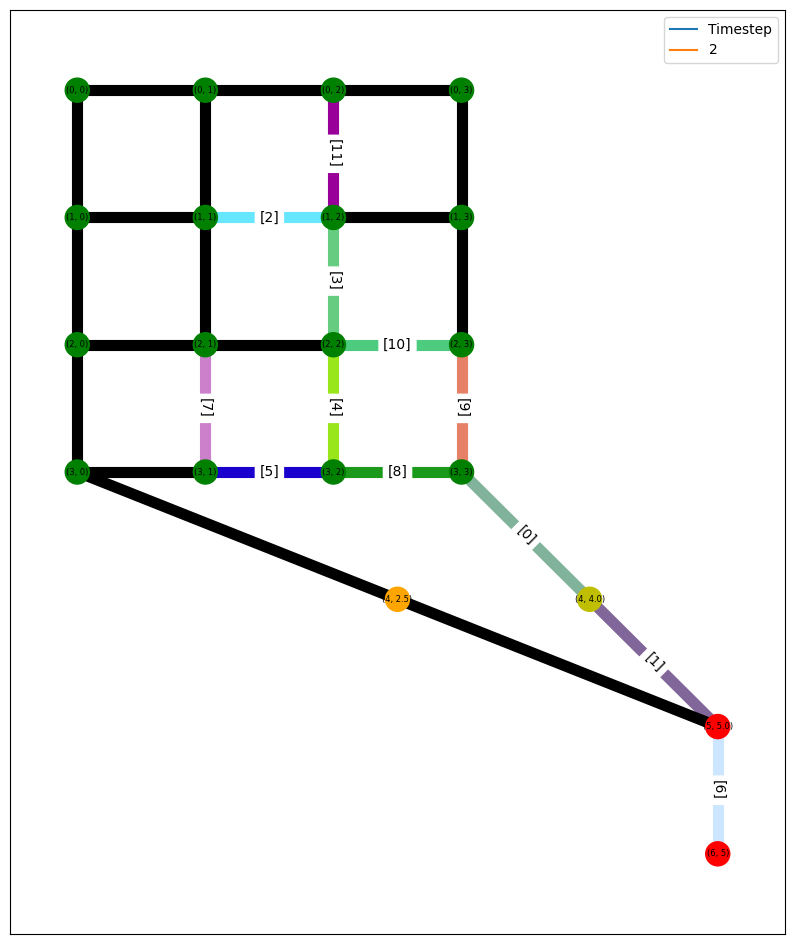

next_edge None


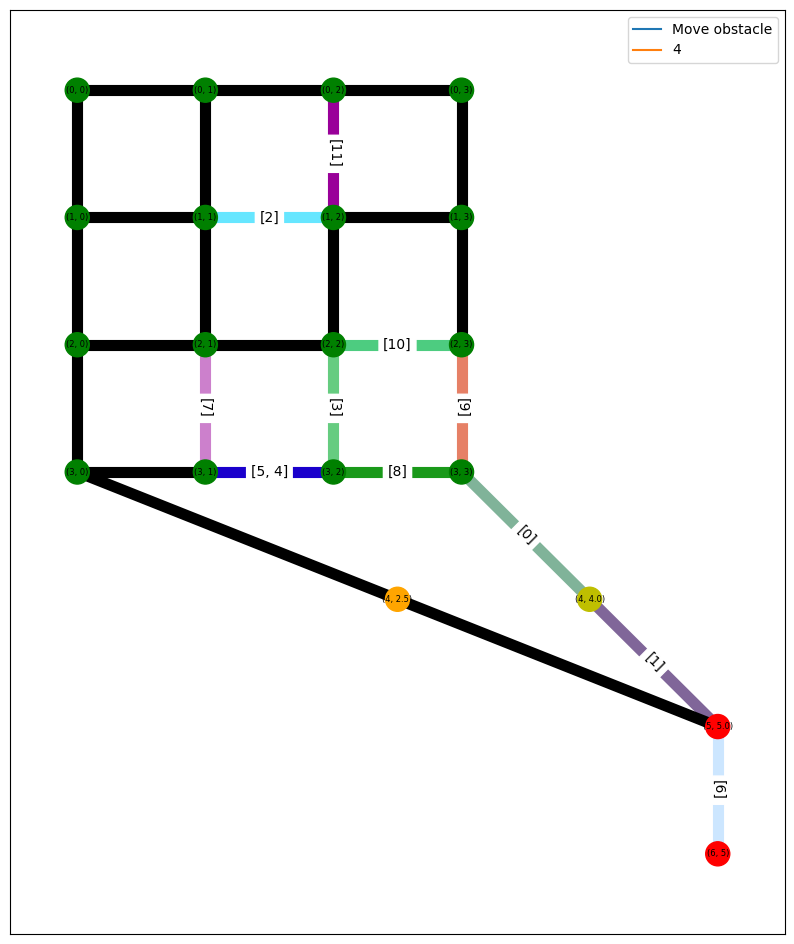

next_edge ((3, 1), (3, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k'})


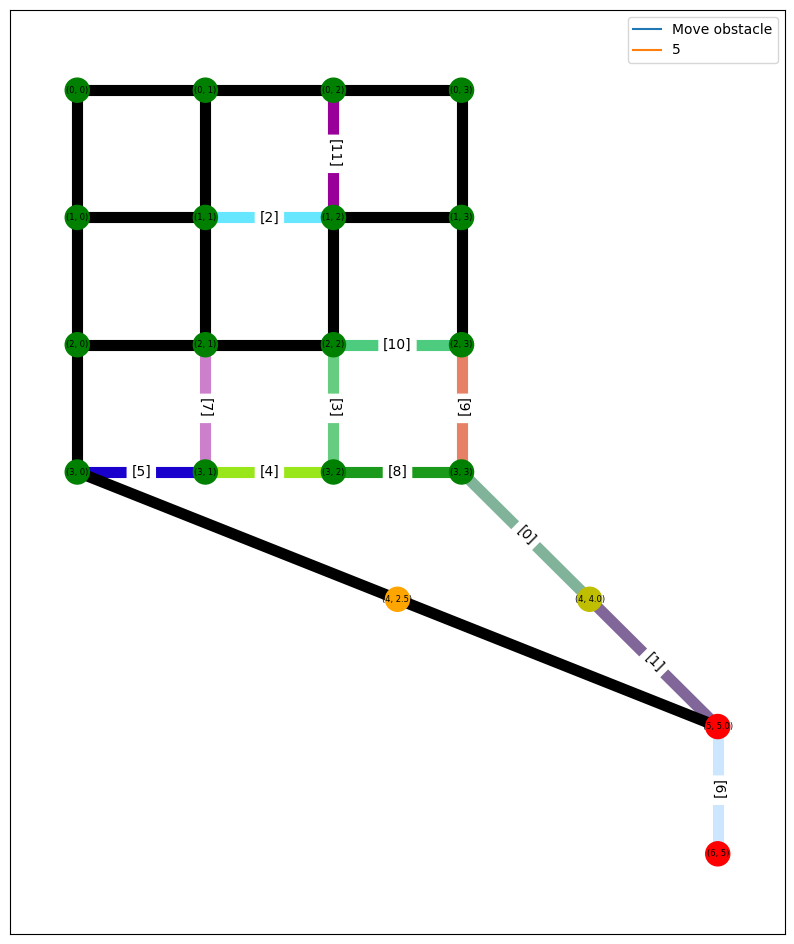

go to PZ


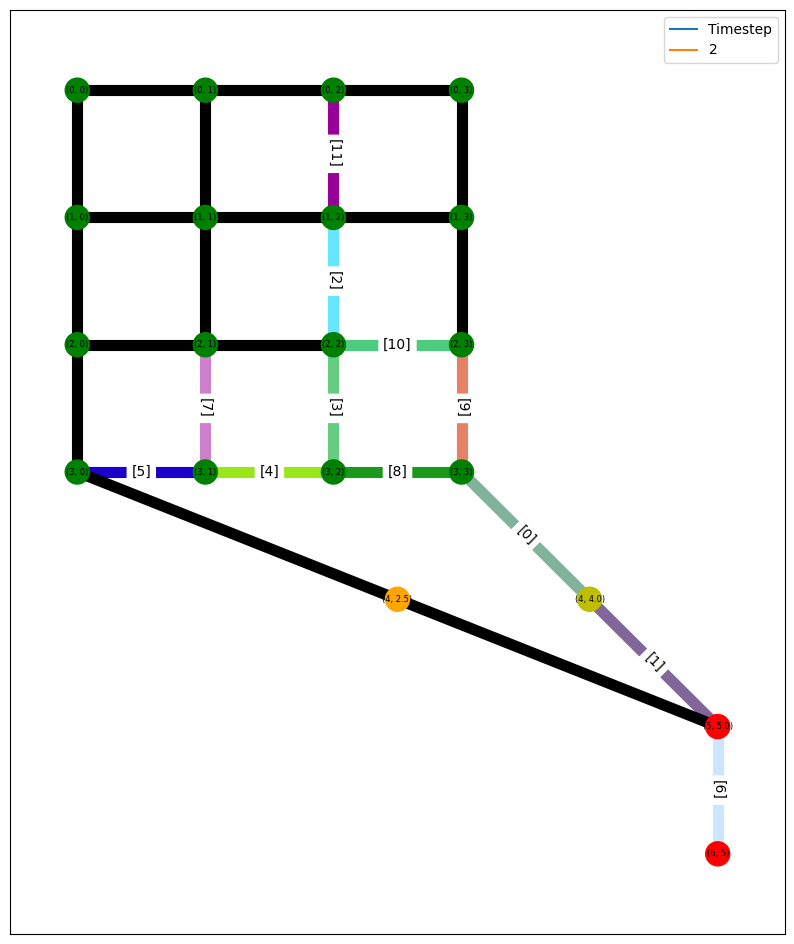

process pz
process gates
time step: 3, execution of gate (1/12) on qubit(s) [6]
Next Node ID: 1, qindices: [1]
unique_seq [1, 0, 8, 9, 3, 4, 10, 2, 5, 7, 11]
move_list [1, 0, 8, 9, 3, 4, 10, 2, 5, 7, 11]
go to PZ


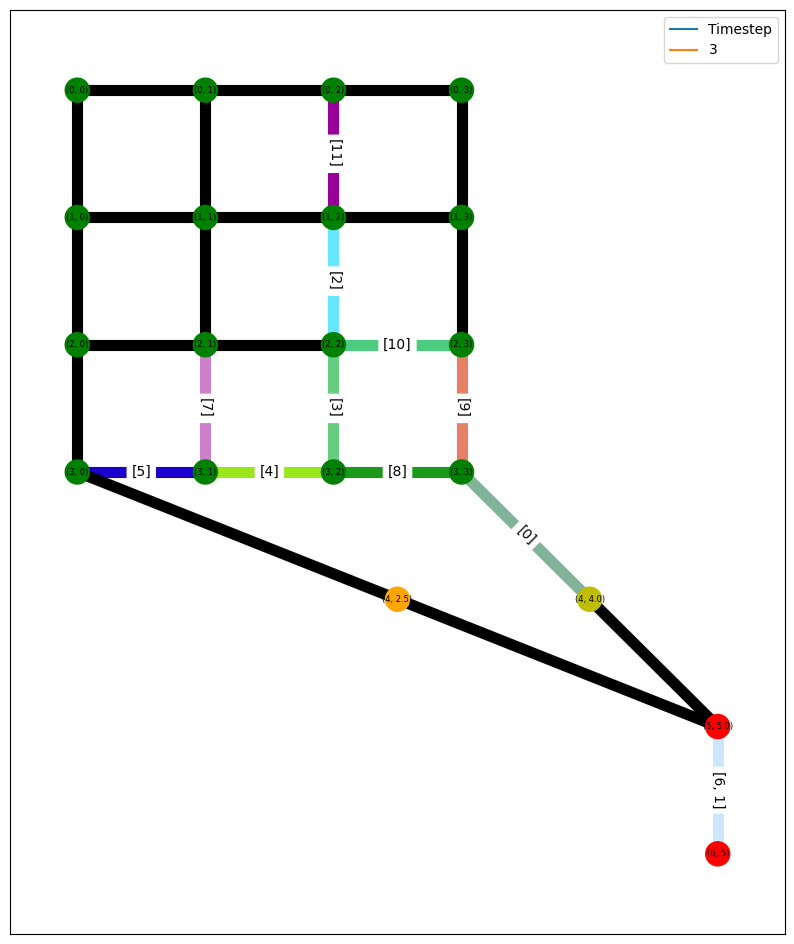

go to PZ


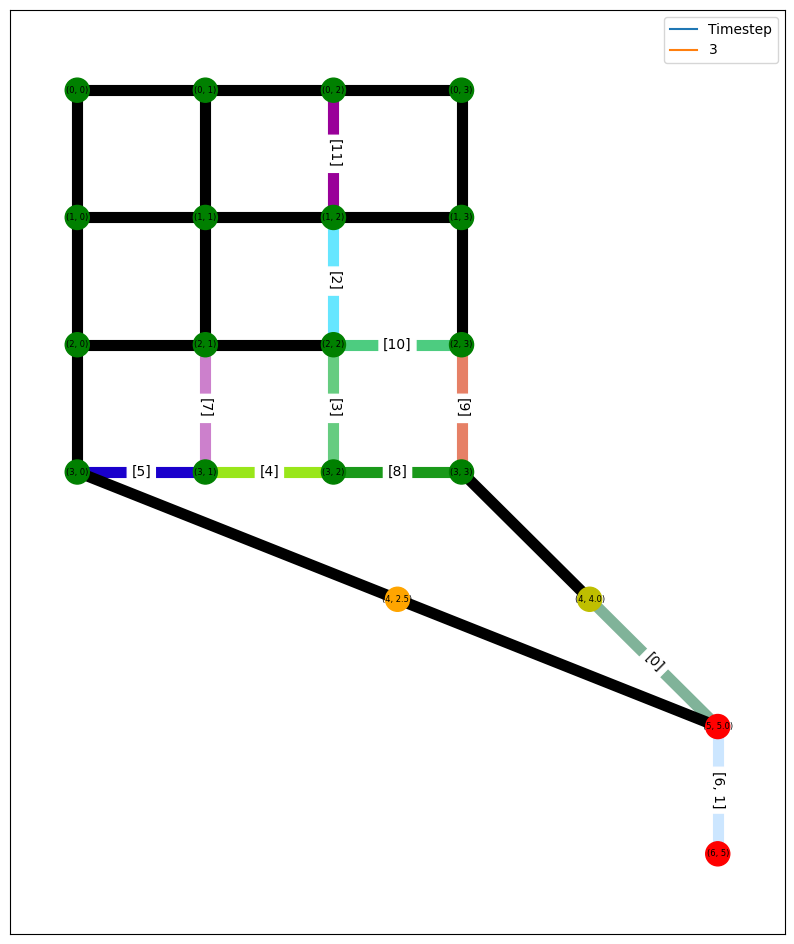

go to PZ


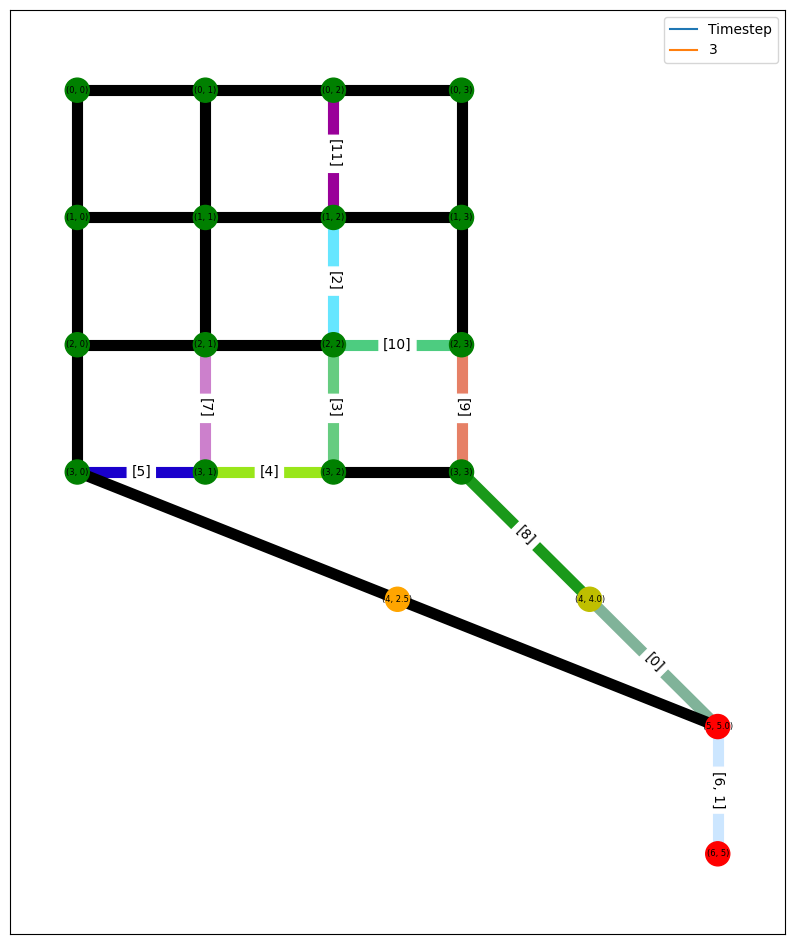

go to PZ


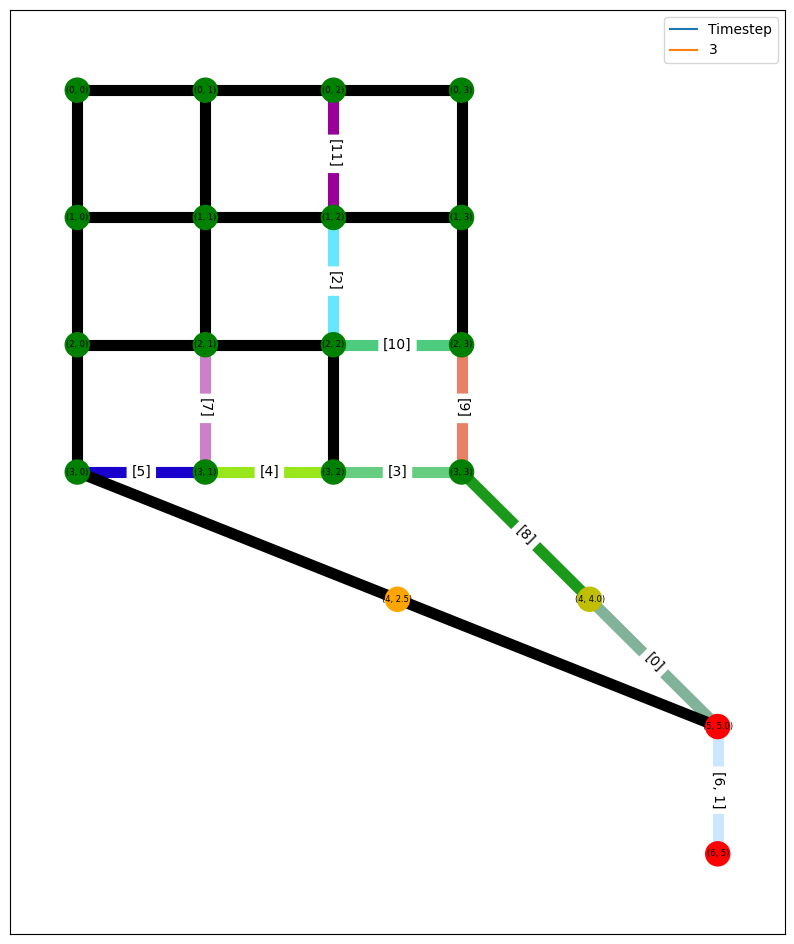

next_edge None
rollback 2
go to PZ


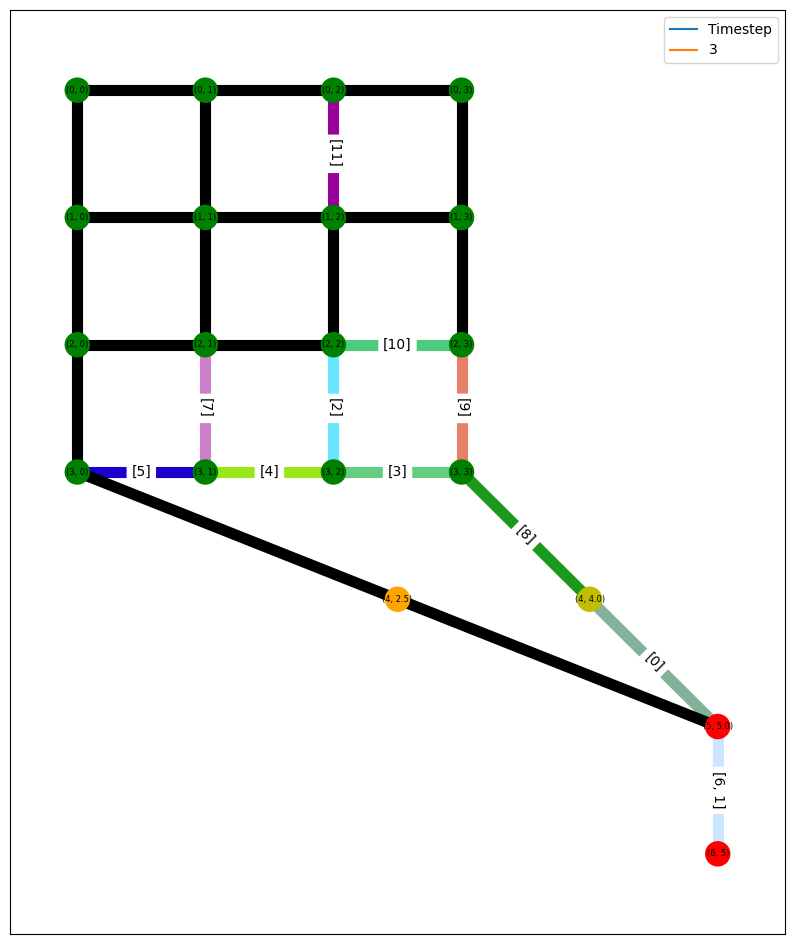

next_edge None
rollback 2
next_edge None
rollback 2
go to PZ


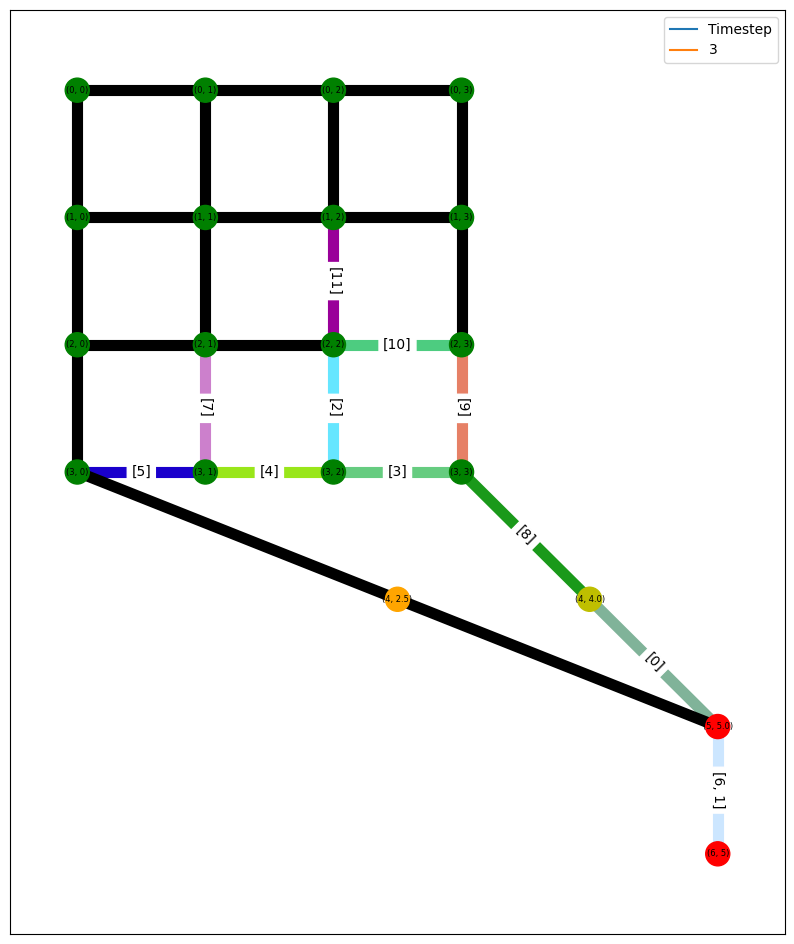

process pz
process gates
time step: 4, execution of gate (2/12) on qubit(s) [1]
Next Node ID: 0, qindices: [0]
unique_seq [0, 8, 3, 9, 2, 4, 10, 5, 7, 11]
move_list [0, 8, 3, 9, 2, 4, 10, 5, 7, 11]
go to PZ


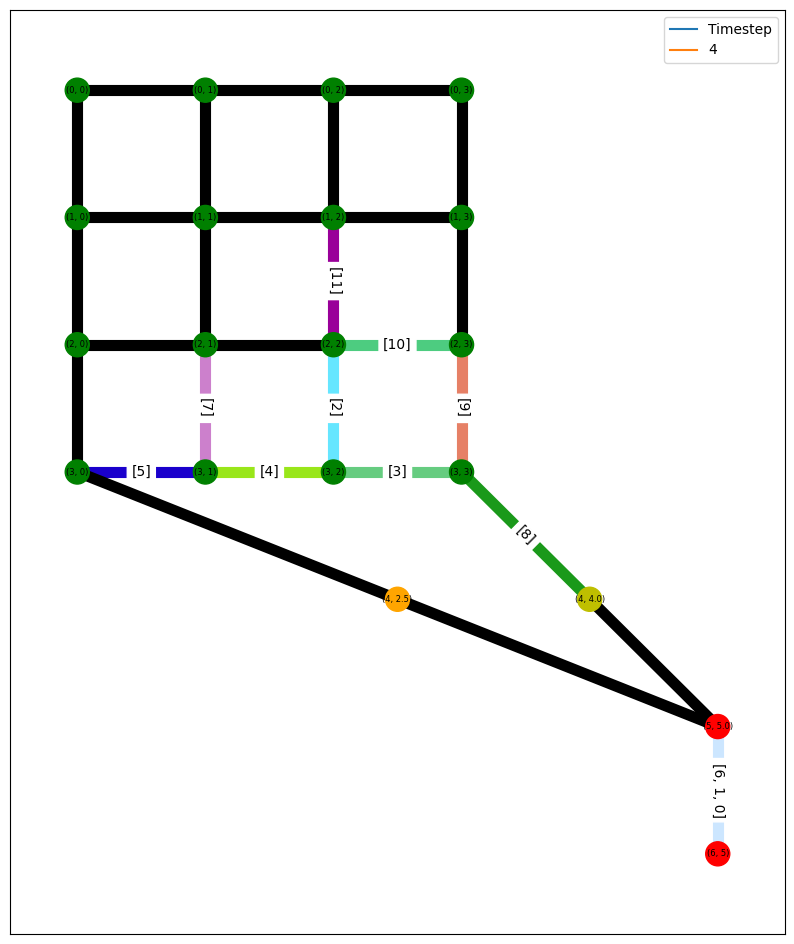

go to PZ


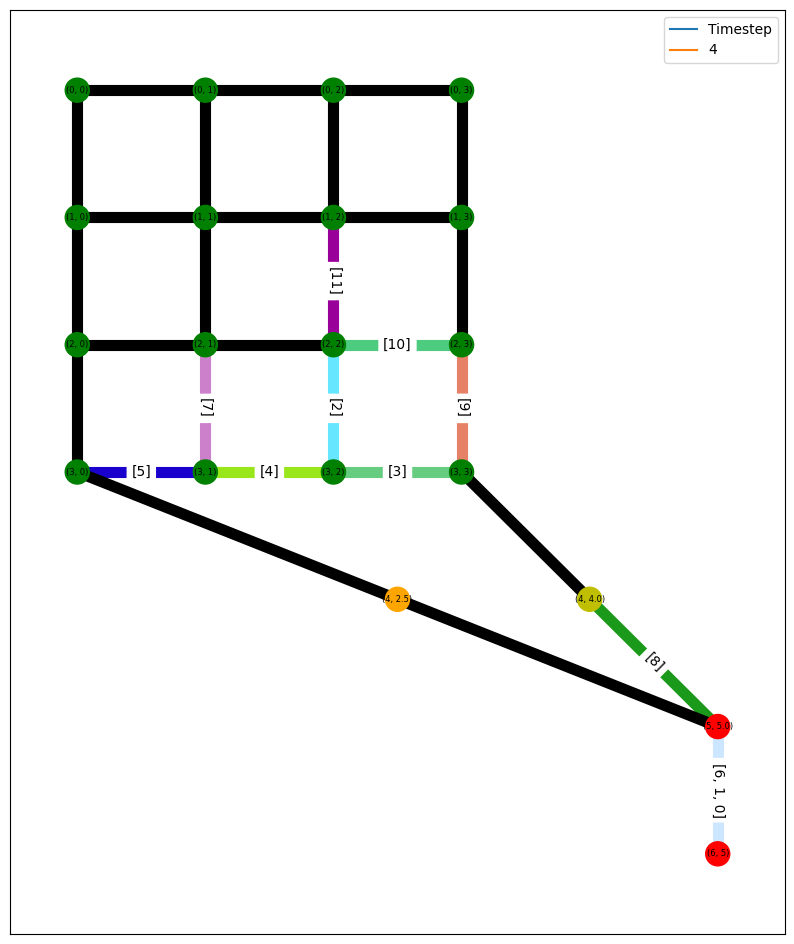

go to PZ


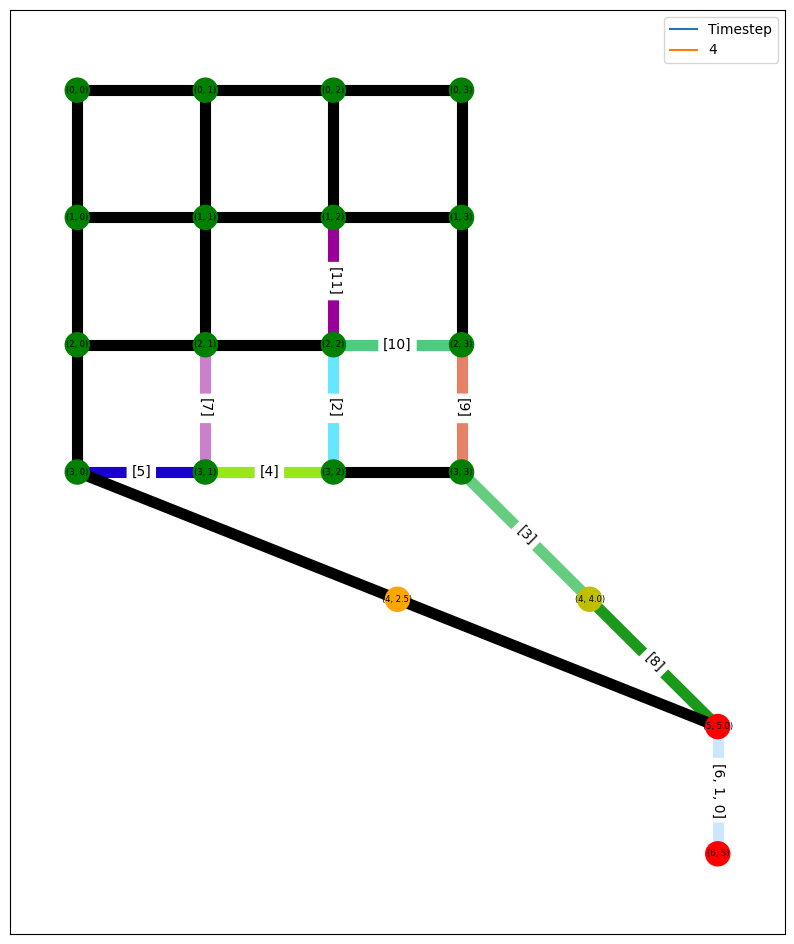

go to PZ


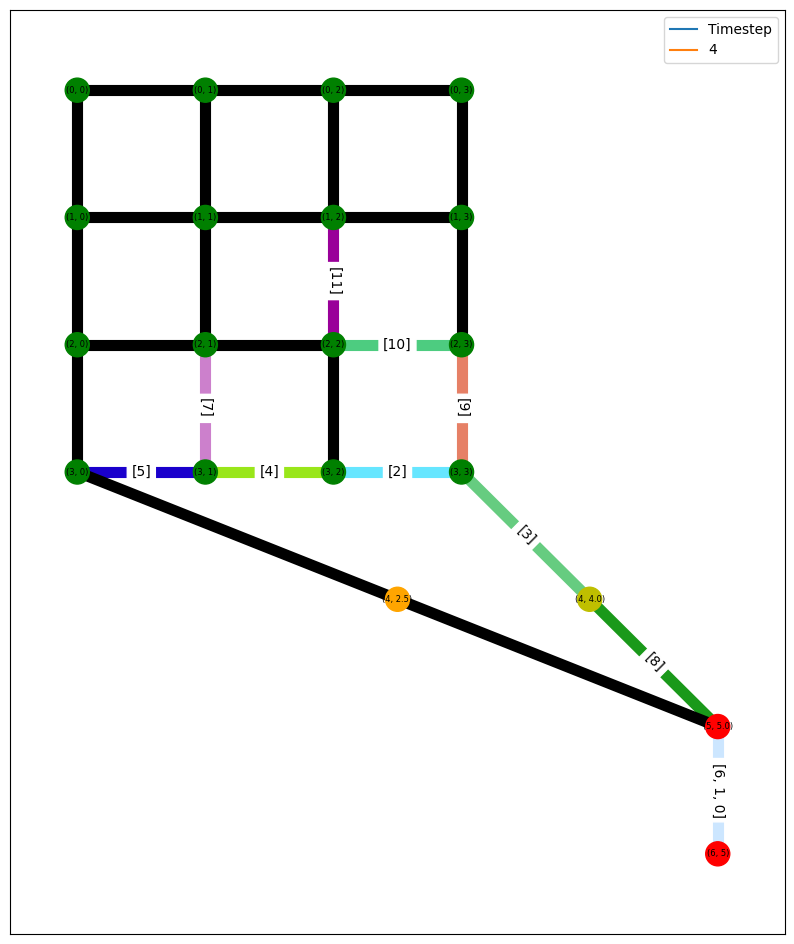

next_edge None
rollback 2
next_edge None
rollback 2
next_edge None
rollback 2
go to PZ


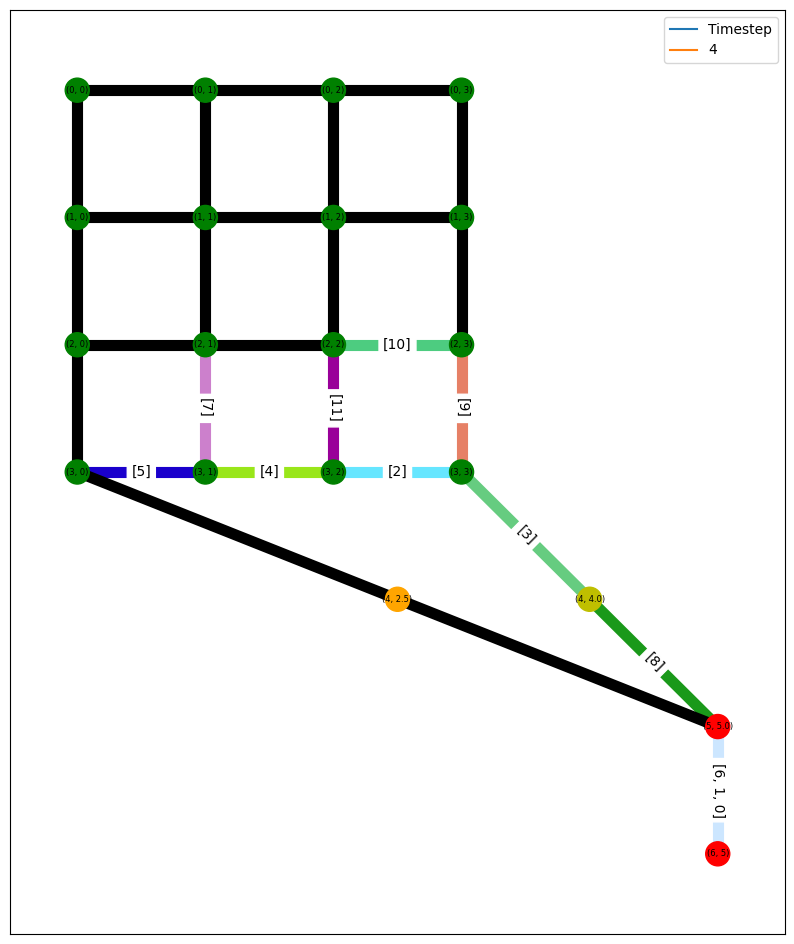

process pz
process gates
time step: 5, execution of gate (3/12) on qubit(s) [0]
Next Node ID: 5, qindices: [8]
unique_seq [8, 3, 2, 9, 4, 10, 11, 5, 7]
move_list [8, 3, 2, 9, 4, 10, 11, 5, 7]
go to PZ


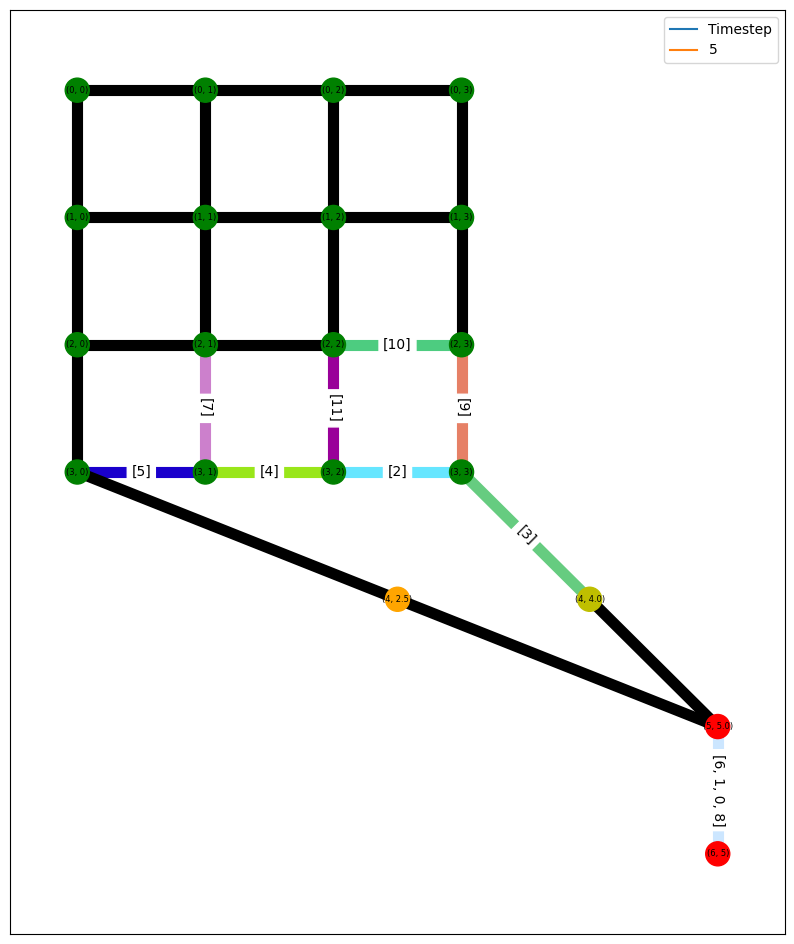

go to PZ


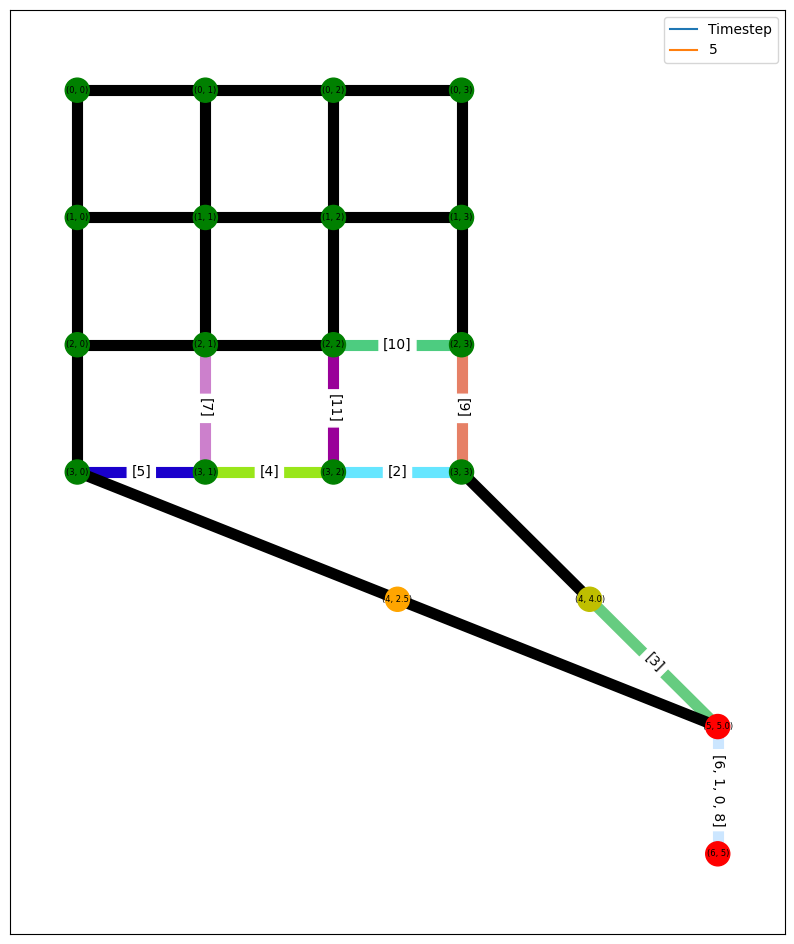

go to PZ


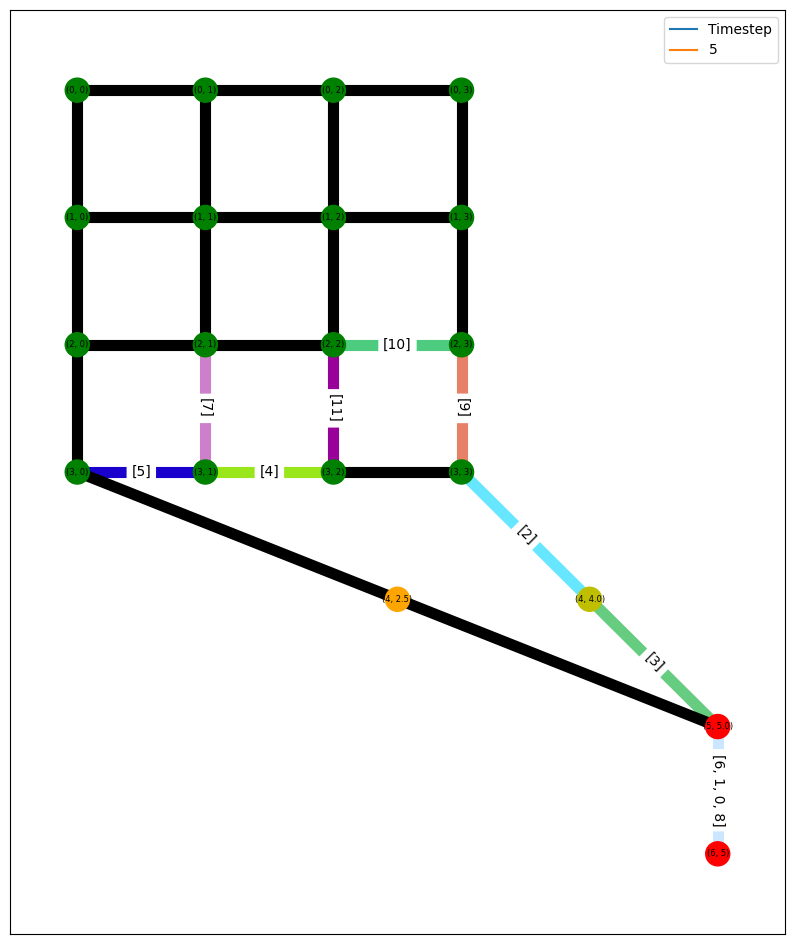

go to PZ


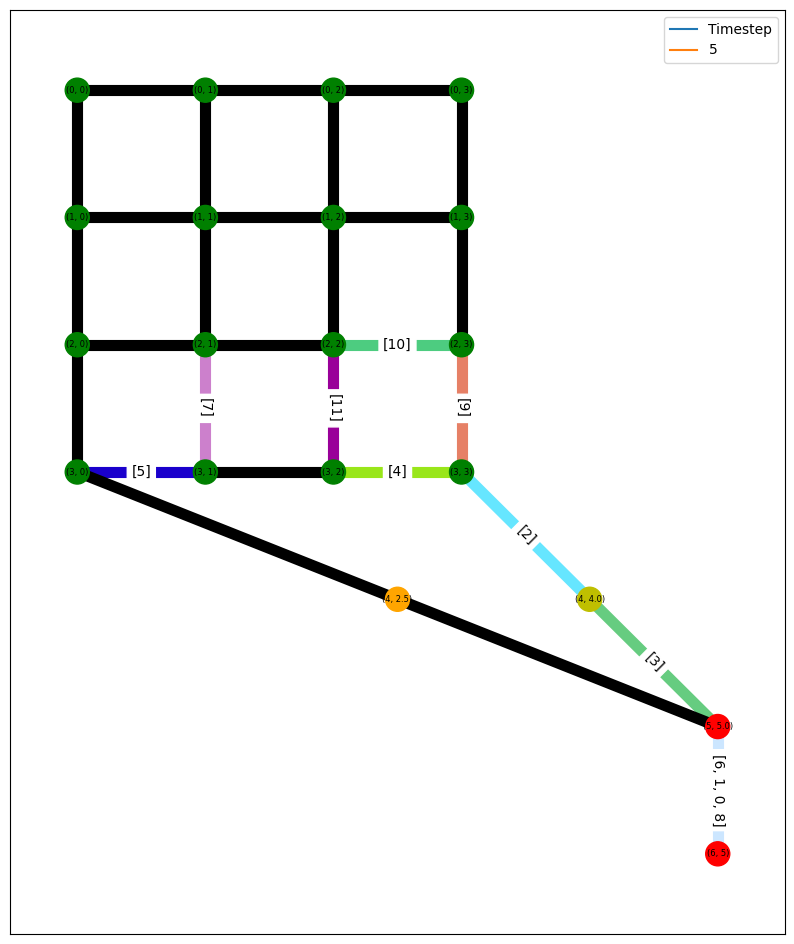

next_edge None
rollback 2
go to PZ


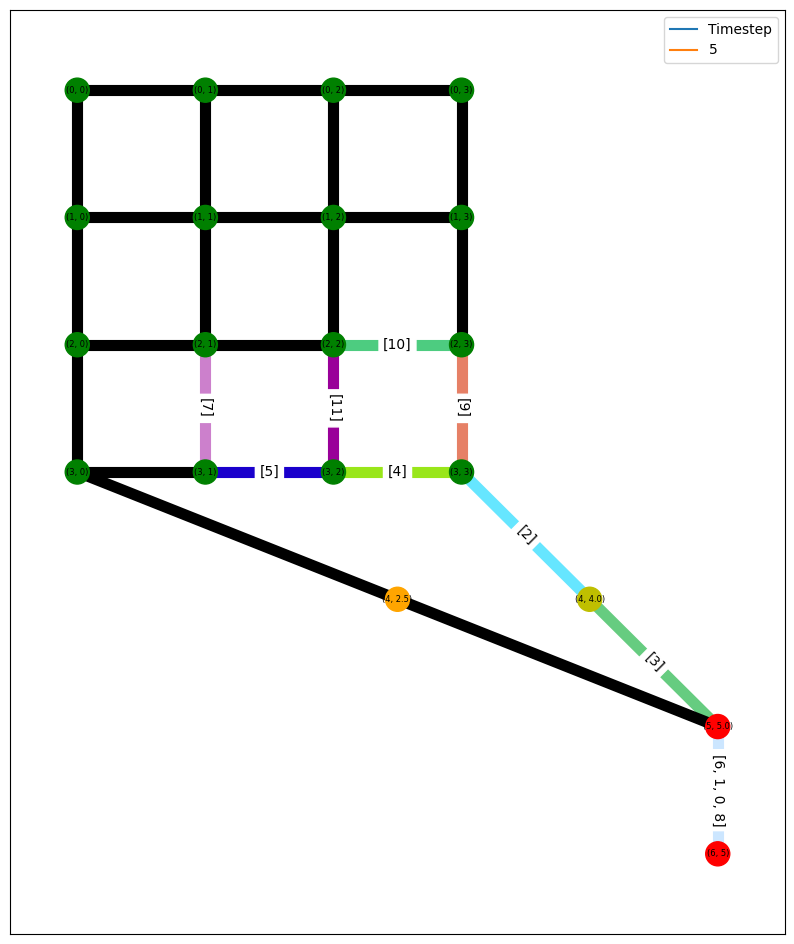

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': []})]


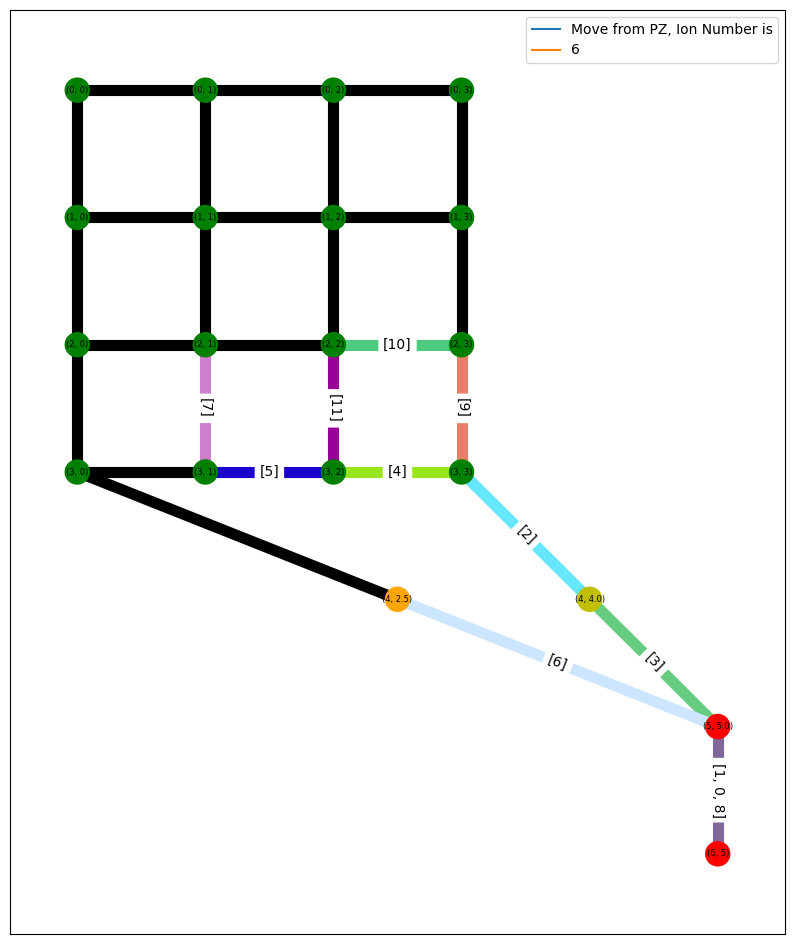

process gates
time step: 6, execution of gate (4/12) on qubit(s) [8]
Next Node ID: 1, qindices: [3]
unique_seq [3, 2, 4, 9, 5, 10, 11, 7]
move_list [3, 2, 4, 9, 5, 10, 11, 7]
go to PZ


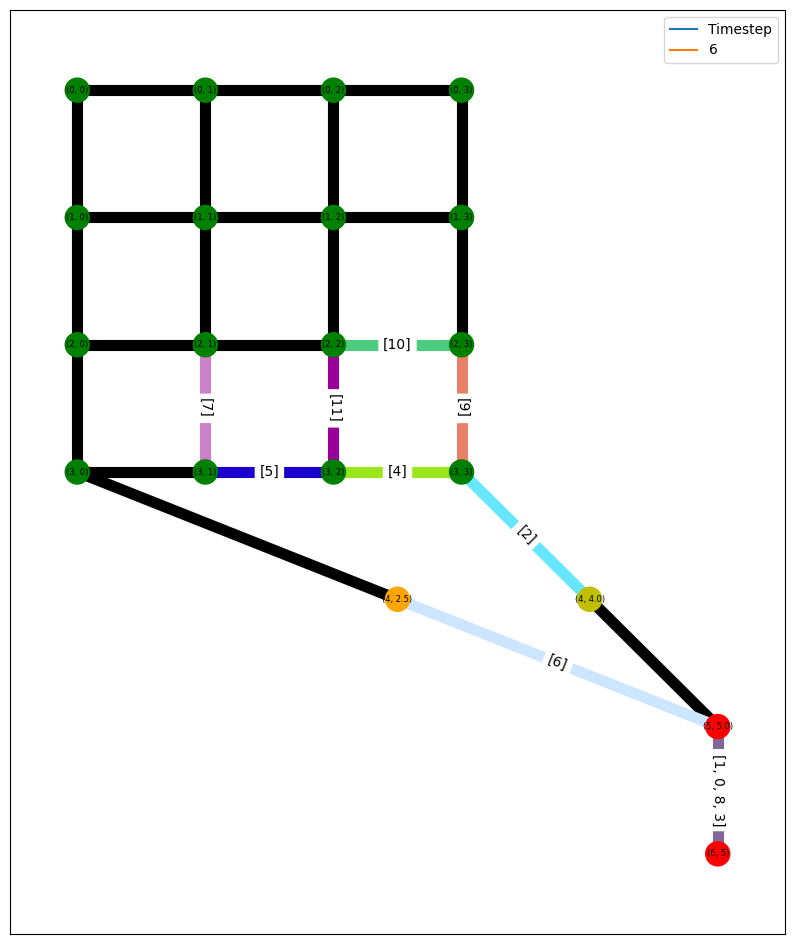

go to PZ


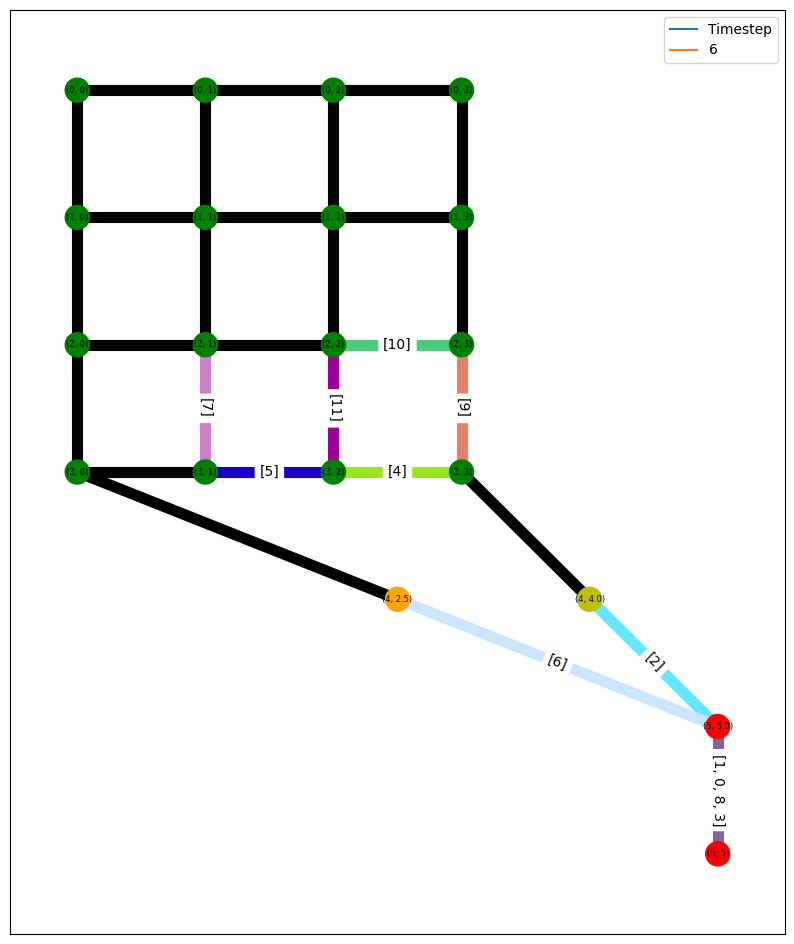

go to PZ


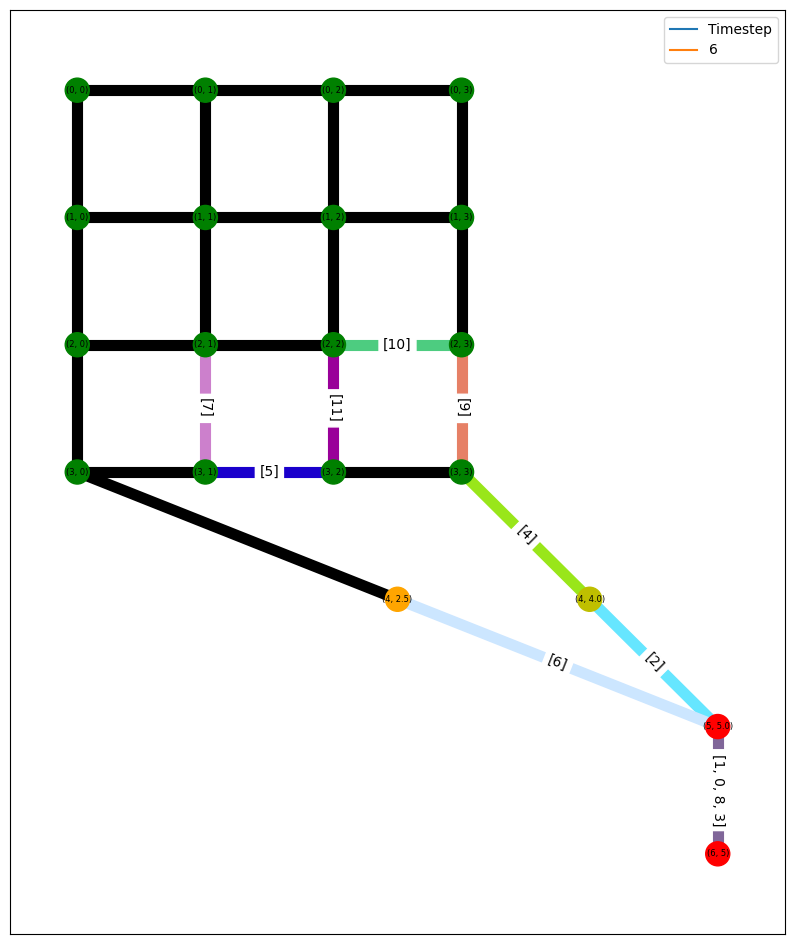

go to PZ


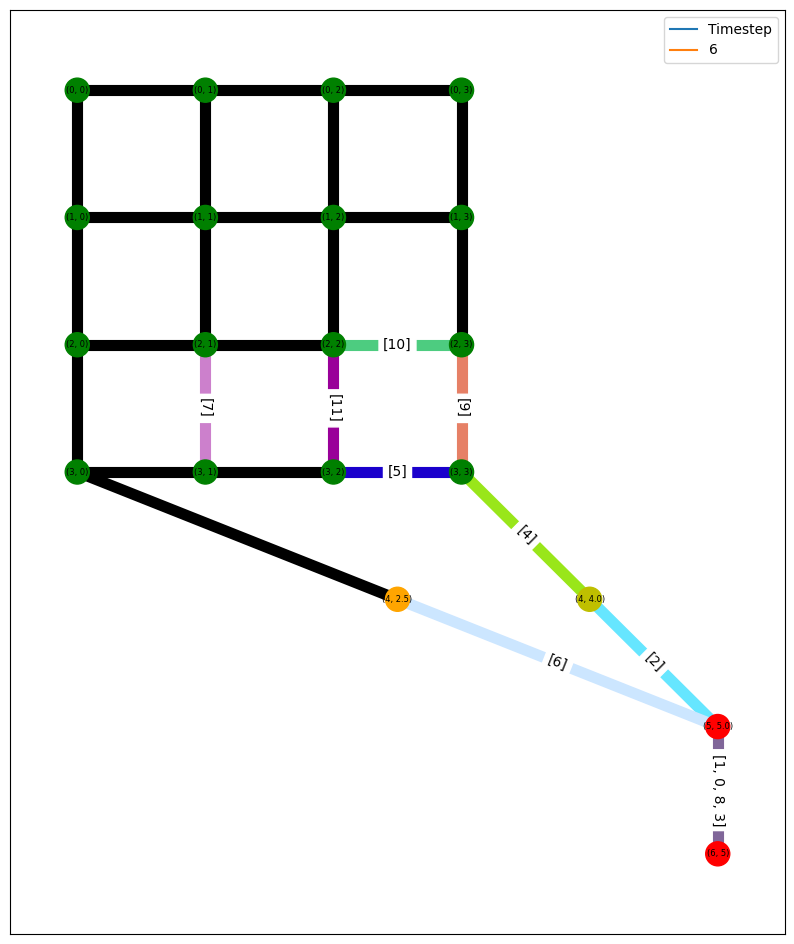

next_edge None
rollback 2
go to PZ


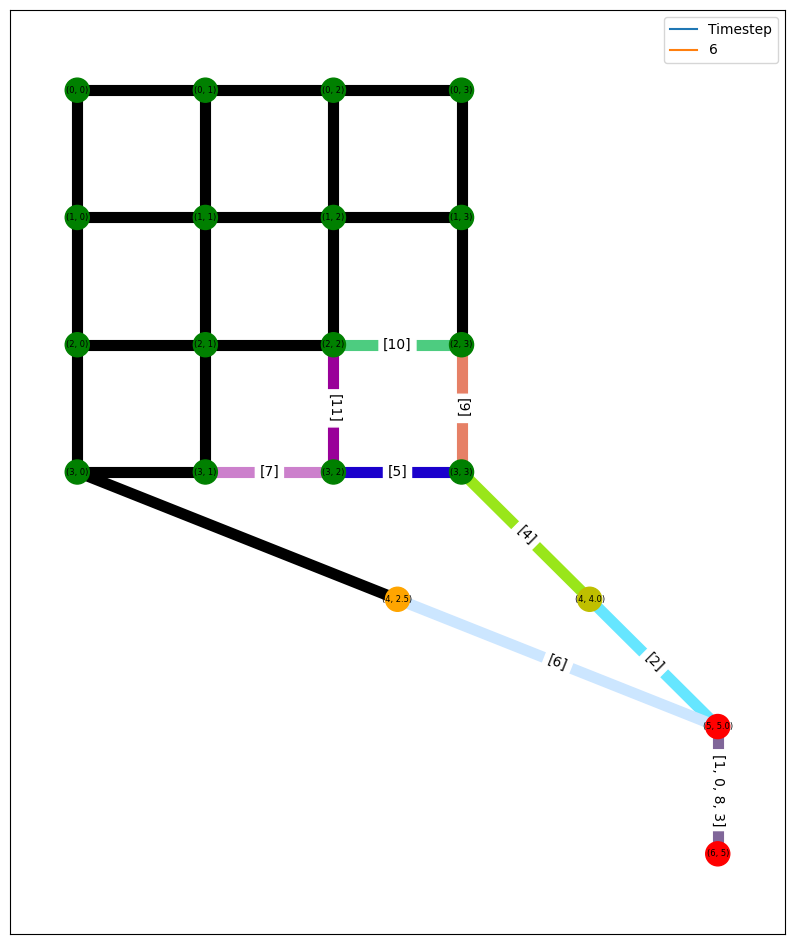

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [6], 'ion_chain': ''})]


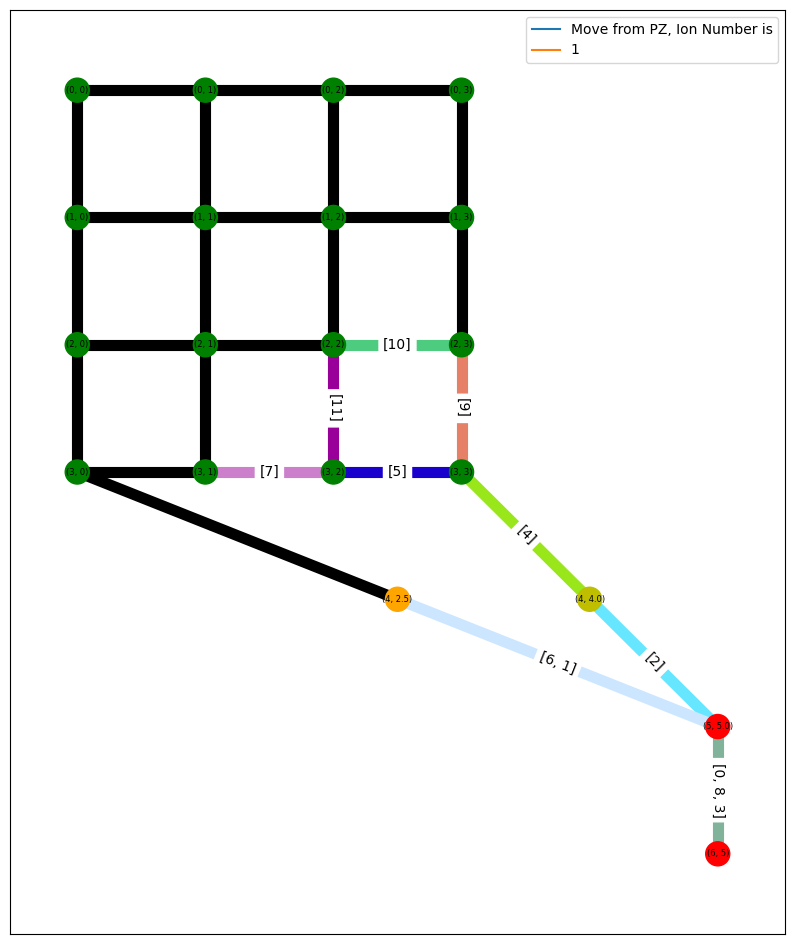

moving_ion 6
used_junctions {3: (5, 5.0), 2: (4, 4.0), 4: (3, 3), 5: (3, 2), 7: (3, 1), 1: (5, 5.0)}
moving_ion 6
イオンを押し出していくしかない
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': []})
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': []})


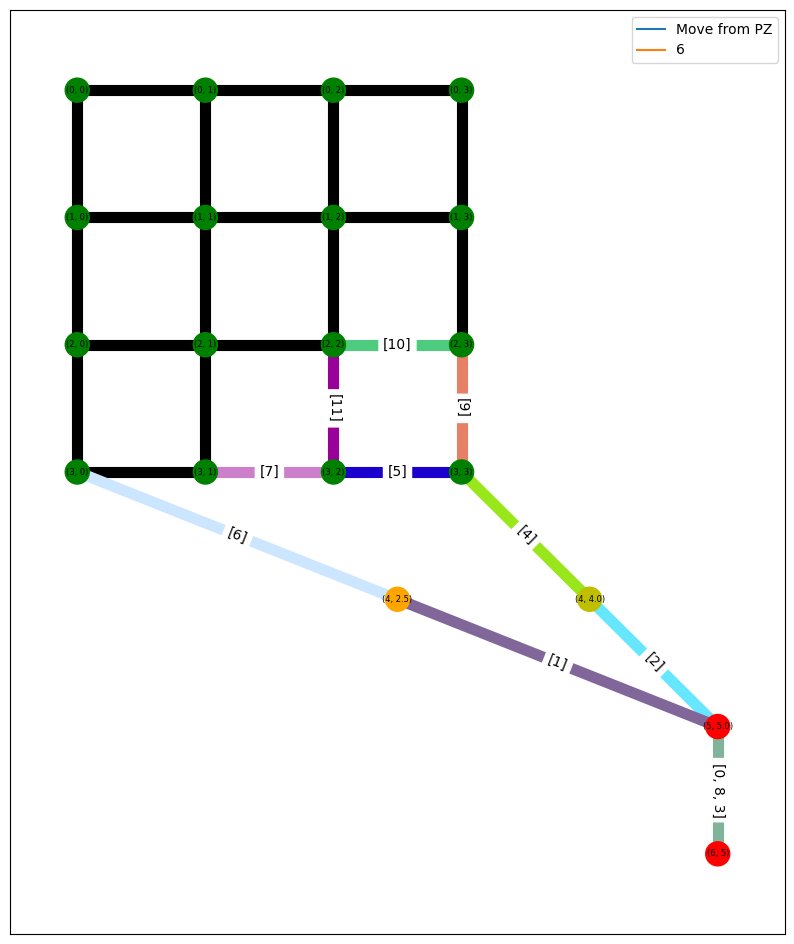

process gates
time step: 7, execution of gate (5/12) on qubit(s) [3]
Next Node ID: 0, qindices: [2]
unique_seq [2, 4, 5, 9, 7, 10, 11]
move_list [2, 4, 5, 9, 7, 10, 11]
go to PZ


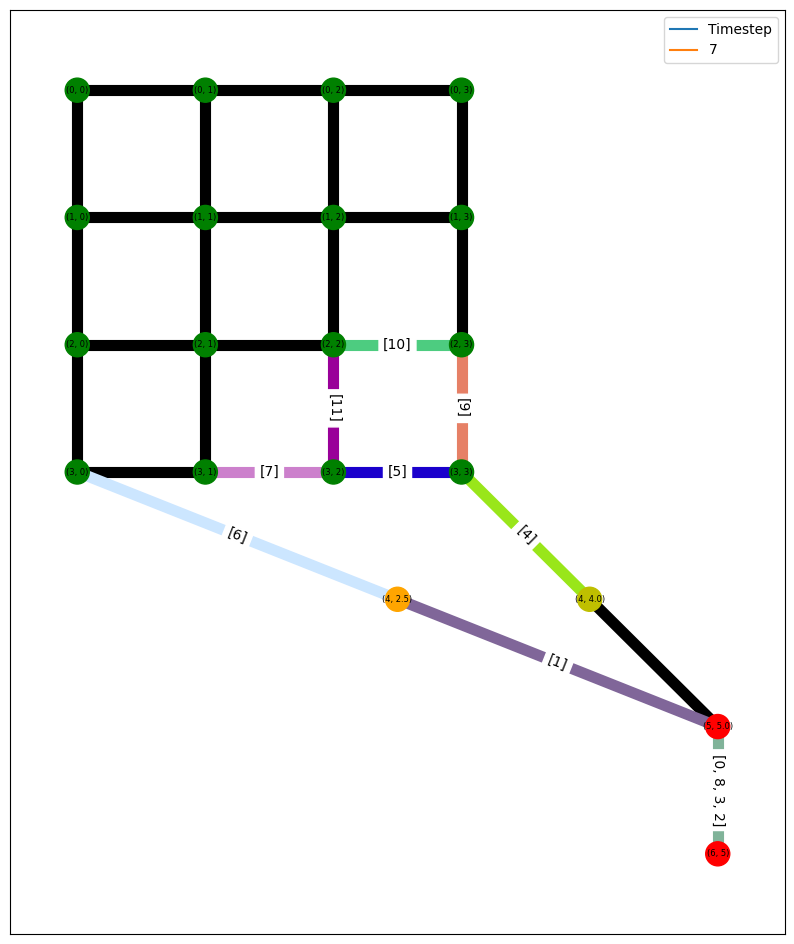

go to PZ


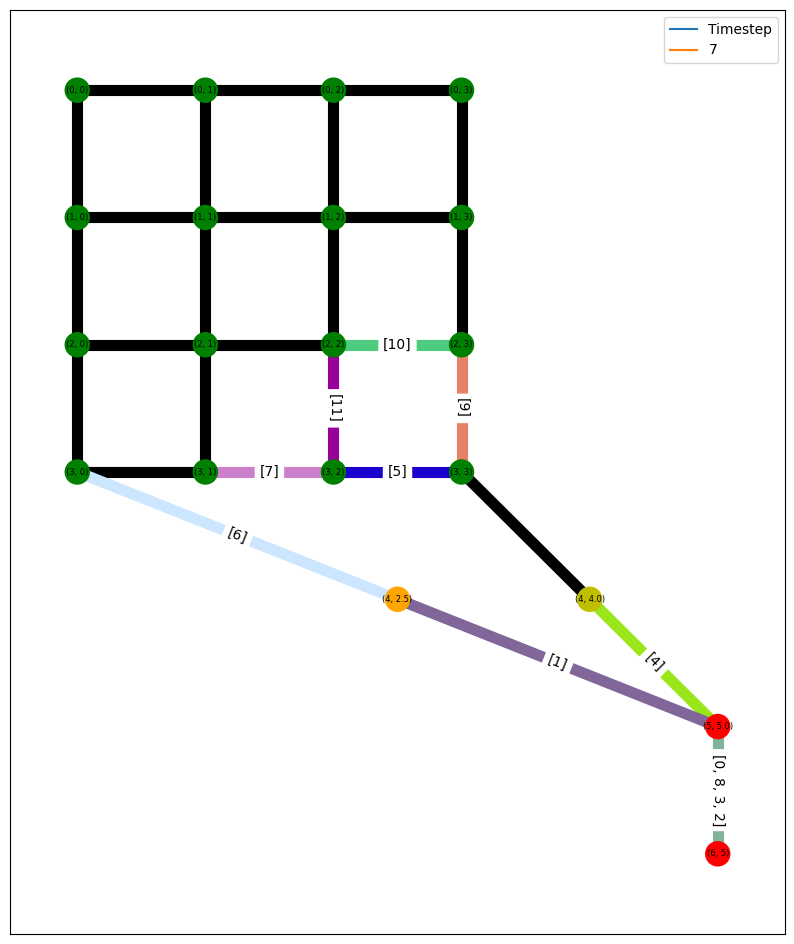

go to PZ


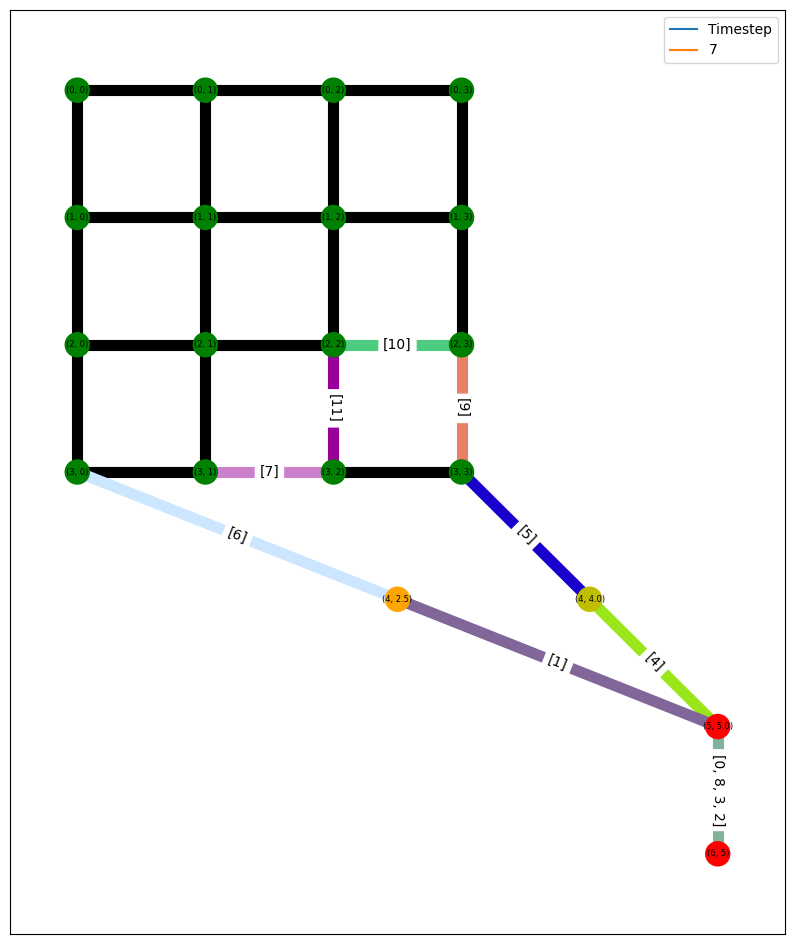

go to PZ


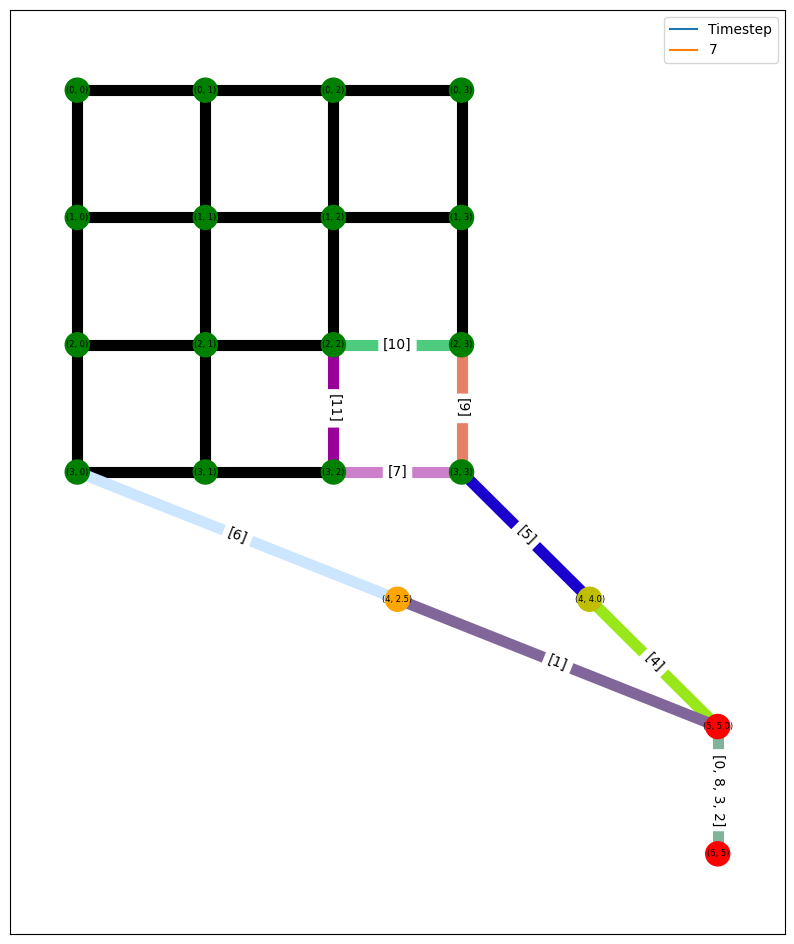

next_edge None
rollback 2
process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [1], 'ion_chain': ''})]


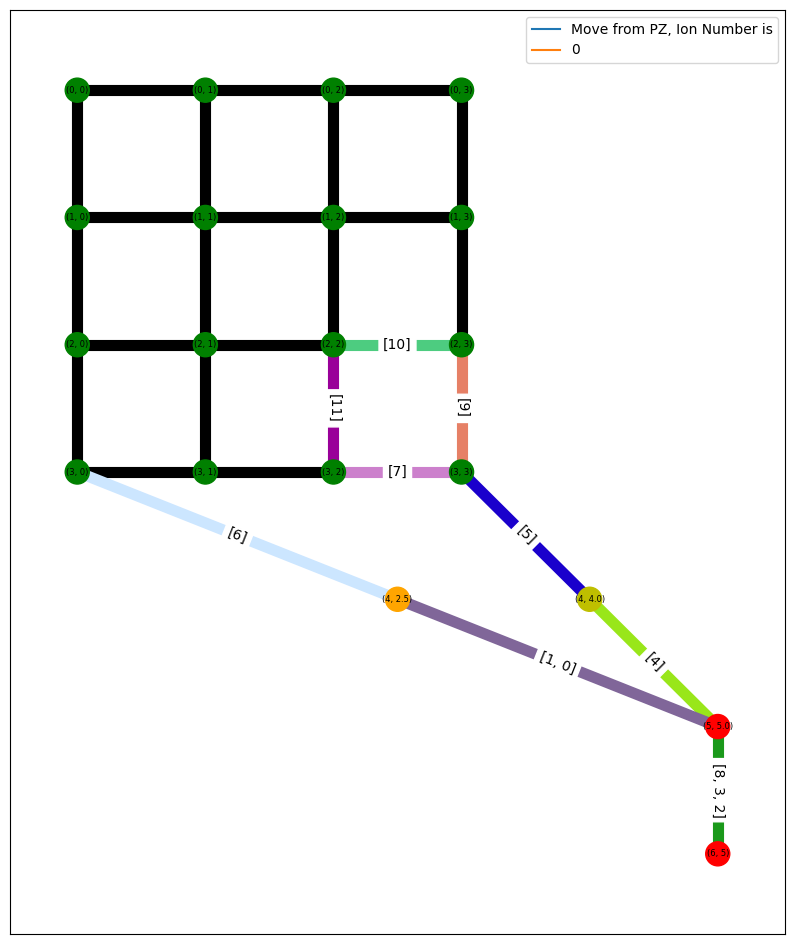

moving_ion 1
used_junctions {2: (5, 5.0), 4: (4, 4.0), 5: (3, 3), 7: (3, 2), 0: (5, 5.0)}
moving_ion 1
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [4], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [8, 3, 2], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [6], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [6], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [6], 'ion_chain': ''})


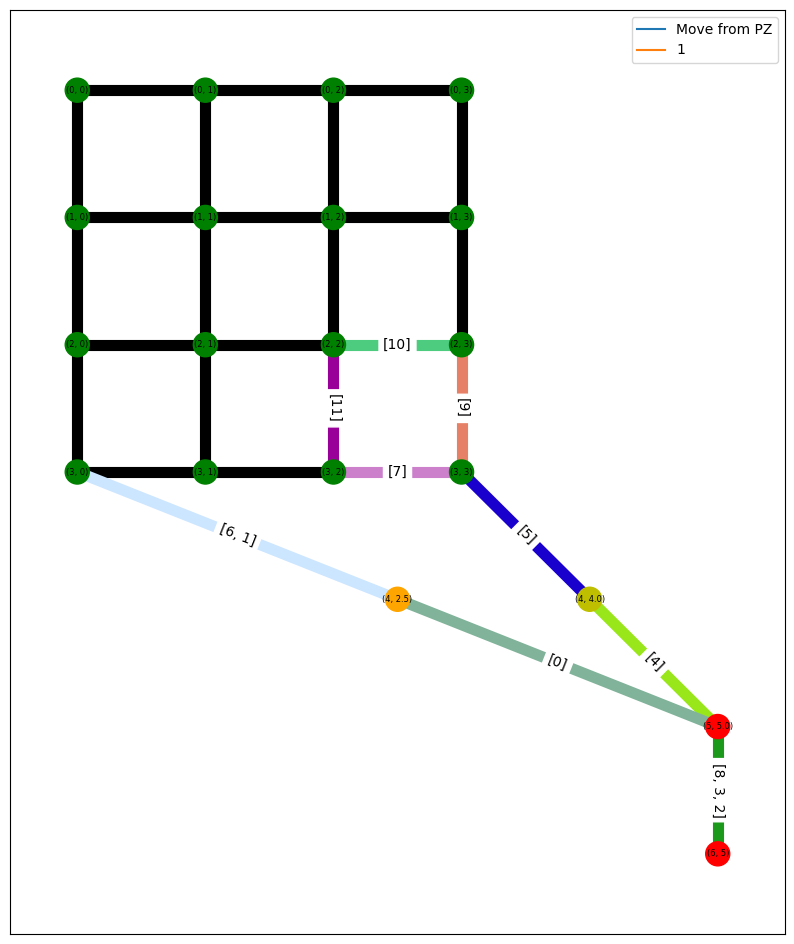

moving_ion 6
used_junctions {2: (5, 5.0), 4: (4, 4.0), 5: (3, 3), 7: (3, 2), 0: (5, 5.0), 1: (4, 2.5)}
moving_ion 6
イオンを押し出していくしかない
next_edge ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k'})
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
next_edge ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k'})


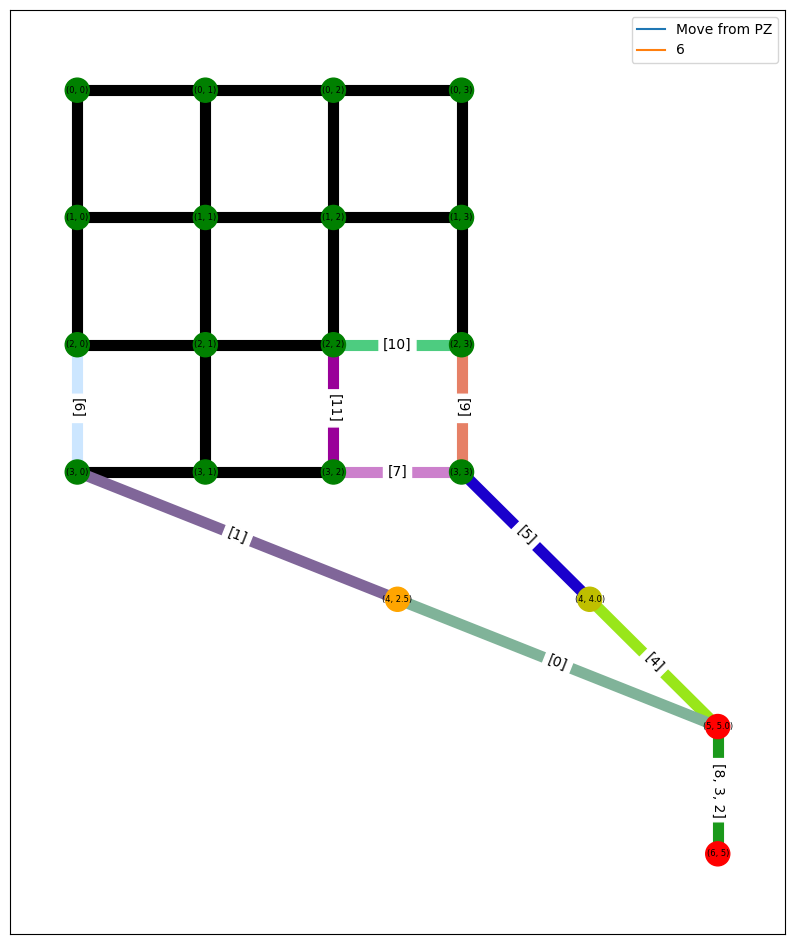

process gates
time step: 8, execution of gate (6/12) on qubit(s) [2]
Next Node ID: 0, qindices: [4]
unique_seq [4, 5, 7, 9, 10, 11]
move_list [4, 5, 7, 9, 10, 11]
go to PZ


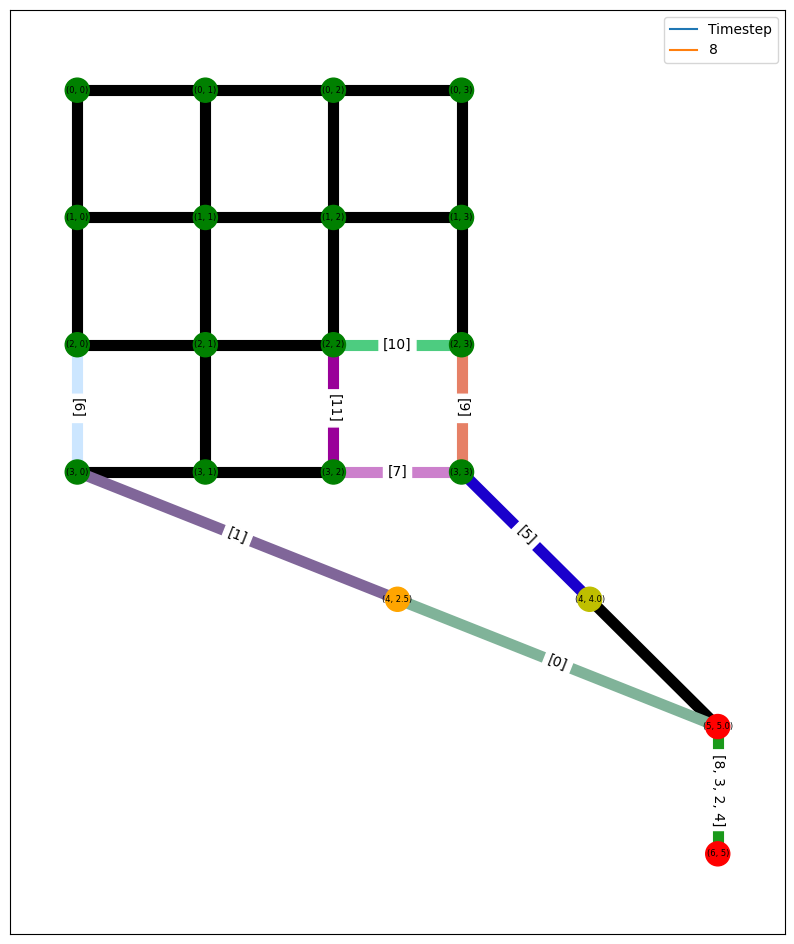

go to PZ


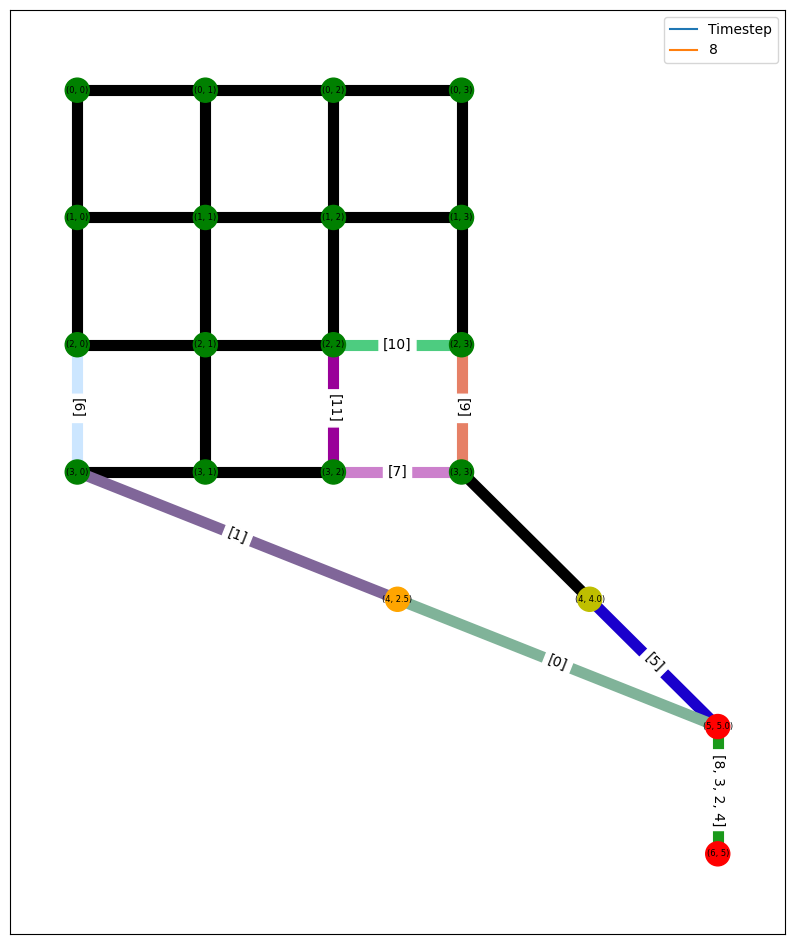

go to PZ


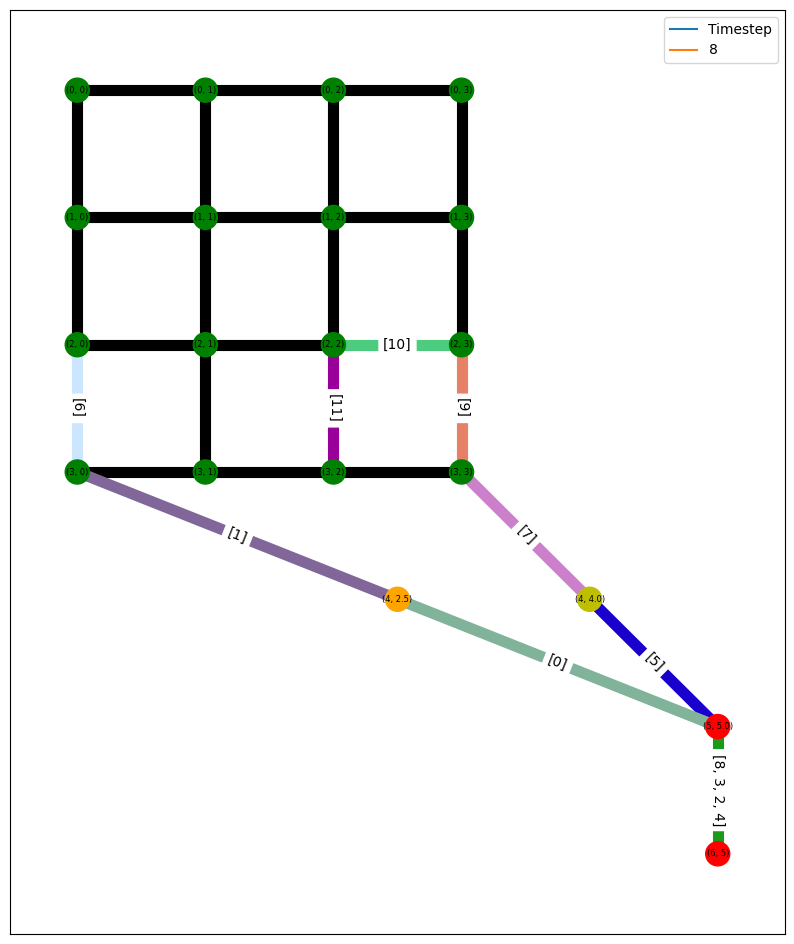

next_edge None
rollback 2
go to PZ


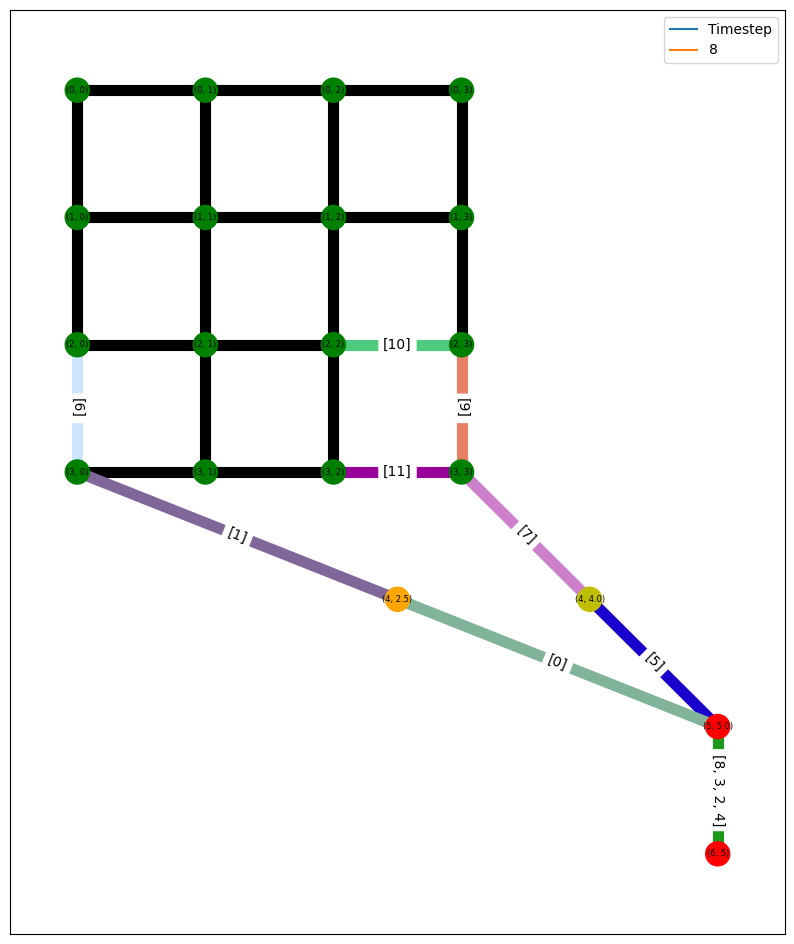

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [0], 'ion_chain': ''})]


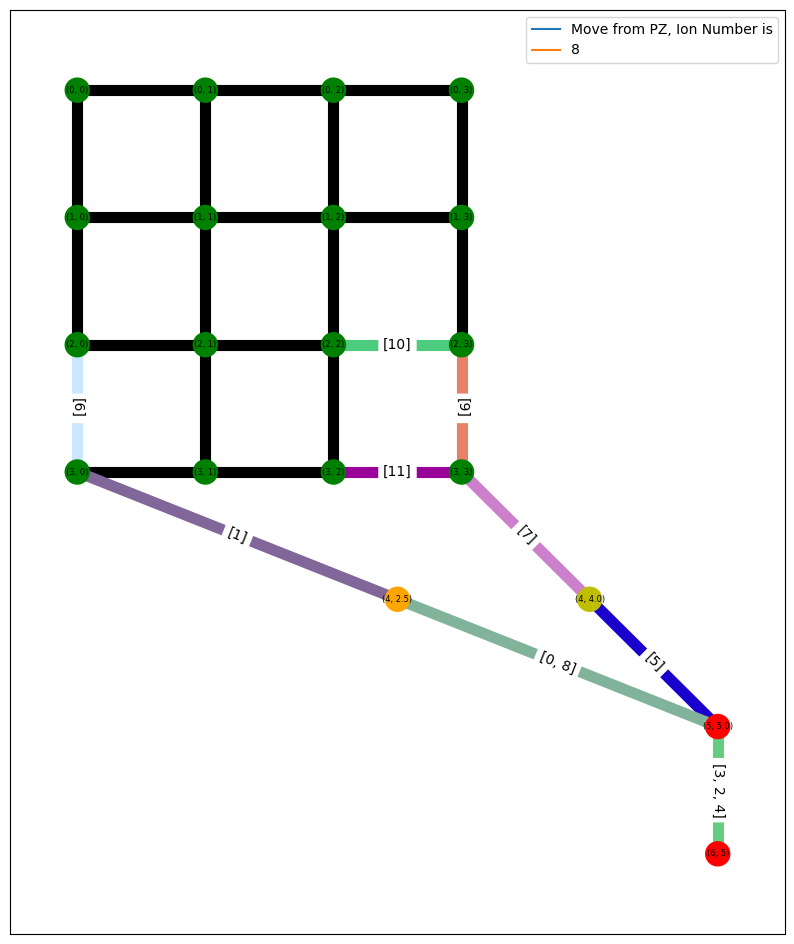

moving_ion 0
used_junctions {4: (5, 5.0), 5: (4, 4.0), 7: (3, 3), 11: (3, 2), 8: (5, 5.0)}
moving_ion 0
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [5], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [3, 2, 4], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [1], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [1], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [1], 'ion_chain': ''})


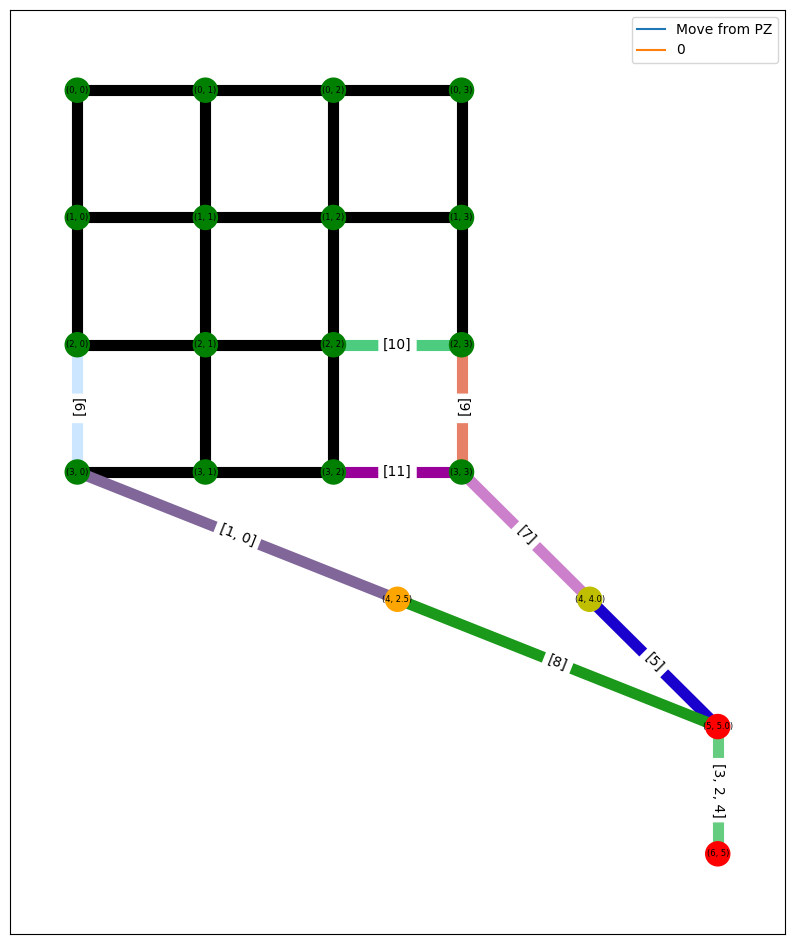

moving_ion 1
used_junctions {4: (5, 5.0), 5: (4, 4.0), 7: (3, 3), 11: (3, 2), 8: (5, 5.0), 0: (4, 2.5)}
moving_ion 1
イオンを押し出していくしかない
next_edge ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
next_edge ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})


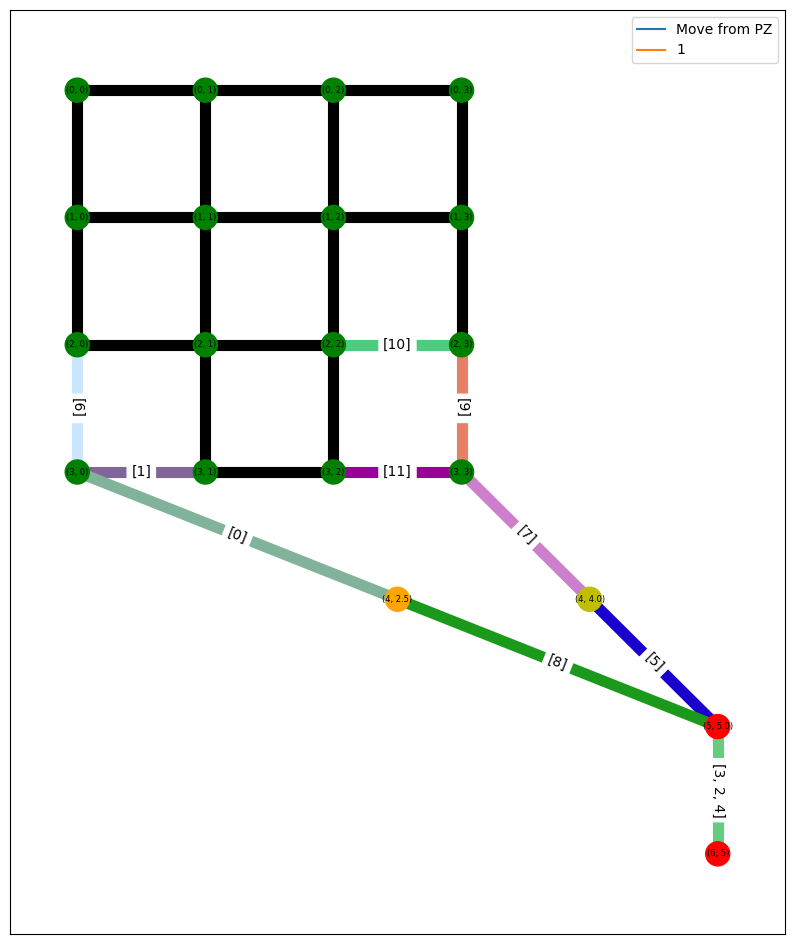

process gates
time step: 9, execution of gate (7/12) on qubit(s) [4]
Next Node ID: 0, qindices: [5]
unique_seq [5, 7, 9, 11, 10]
move_list [5, 7, 9, 11, 10]
go to PZ


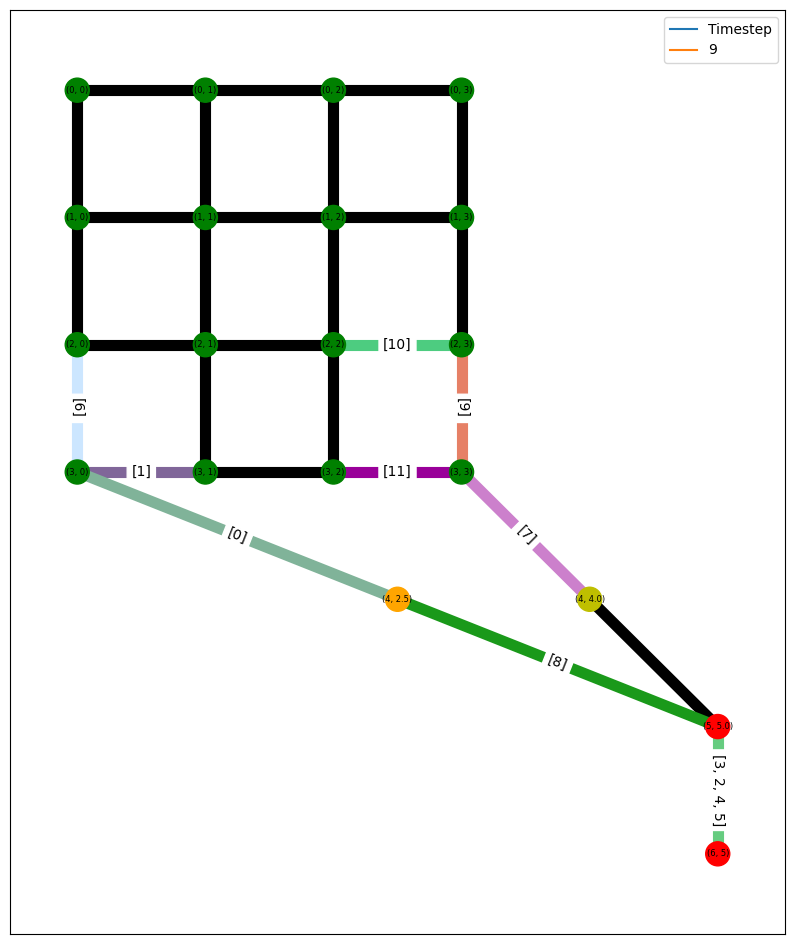

go to PZ


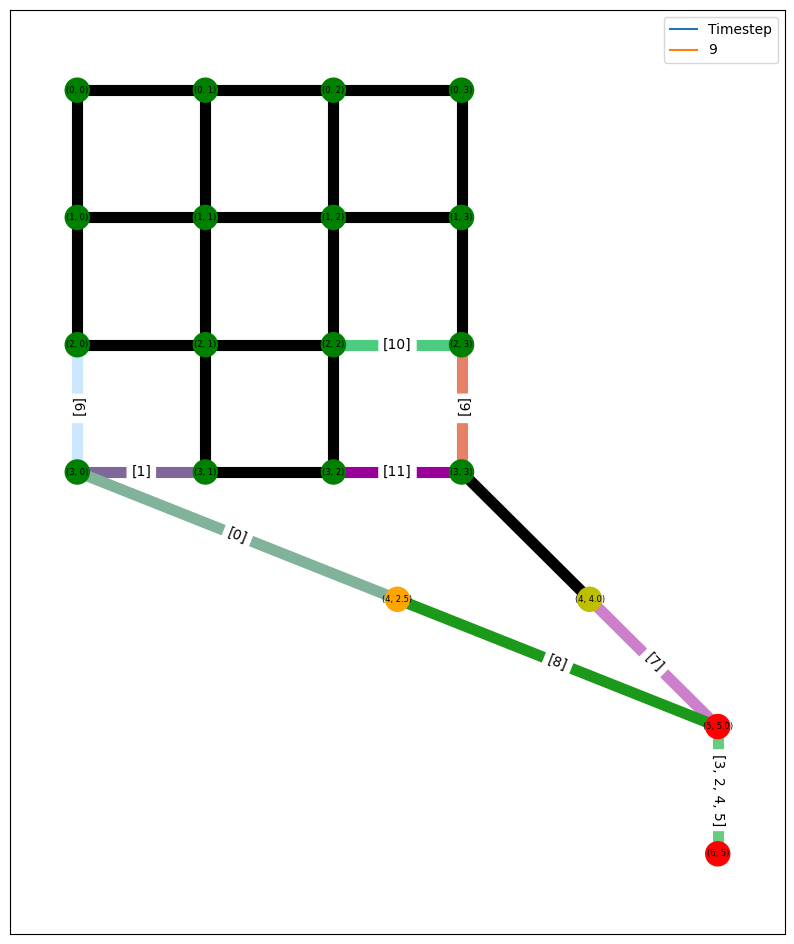

go to PZ


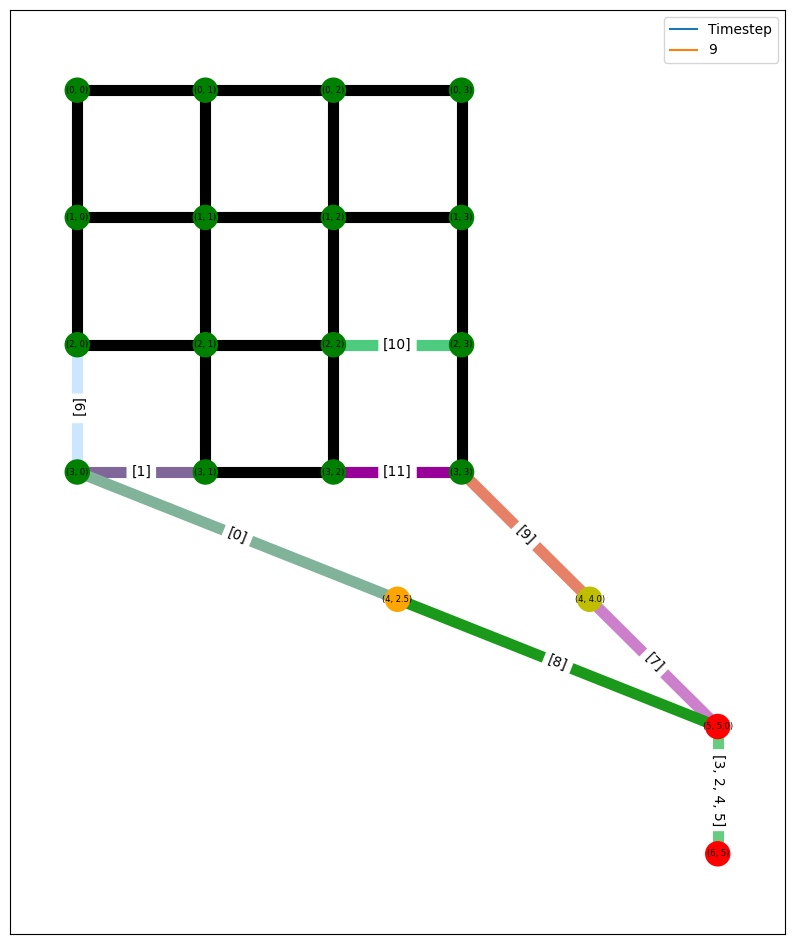

go to PZ


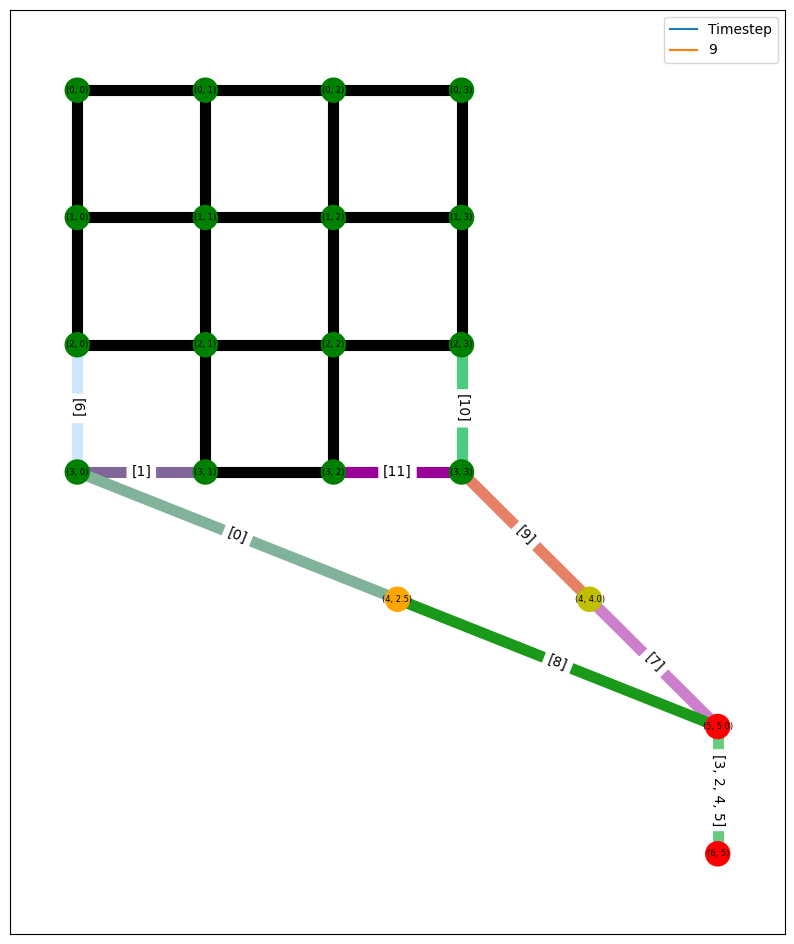

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [8], 'ion_chain': ''})]


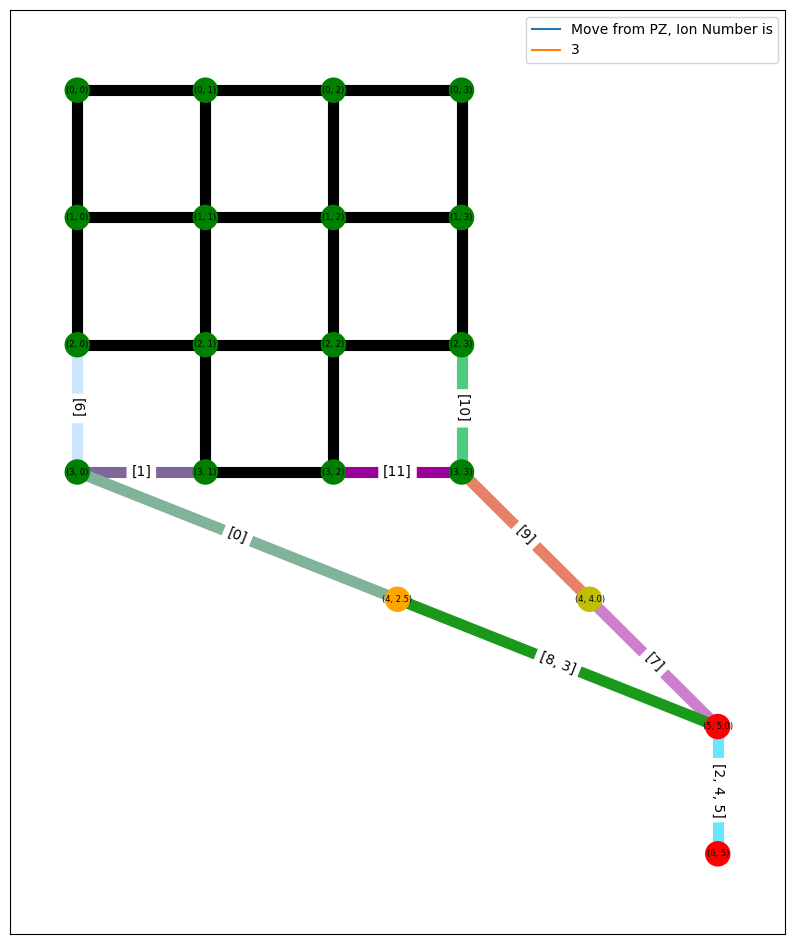

moving_ion 8
used_junctions {5: (5, 5.0), 7: (4, 4.0), 9: (3, 3), 10: (2, 3), 3: (5, 5.0)}
moving_ion 8
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [7], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [2, 4, 5], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [0], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [0], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [0], 'ion_chain': ''})


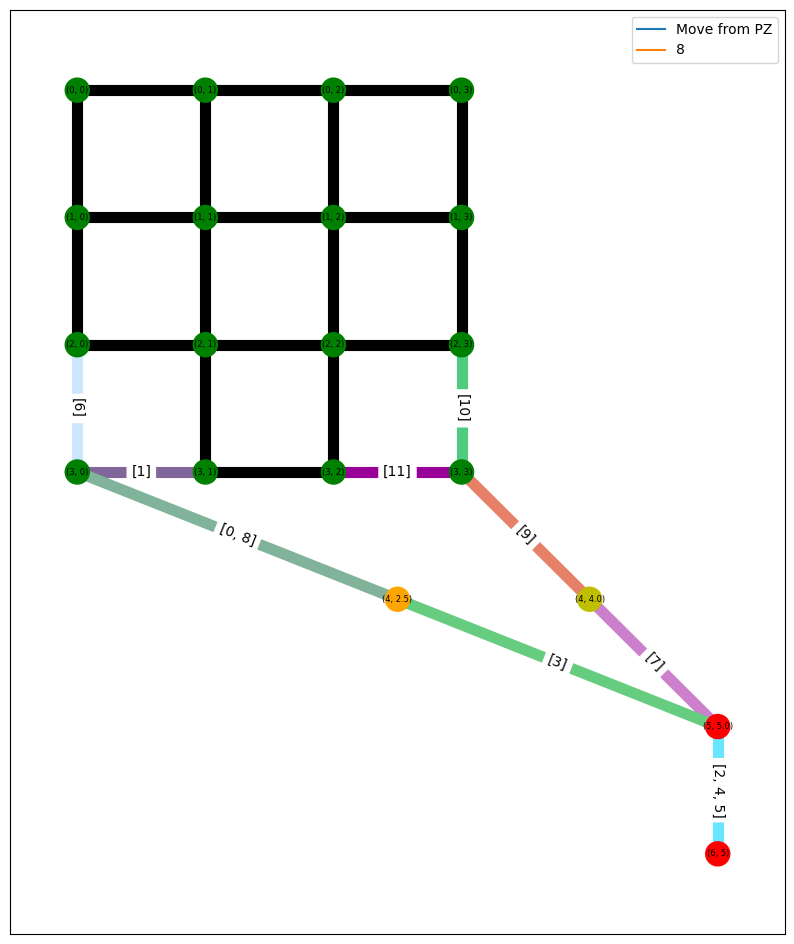

moving_ion 0
used_junctions {5: (5, 5.0), 7: (4, 4.0), 9: (3, 3), 10: (2, 3), 3: (5, 5.0), 8: (4, 2.5)}
moving_ion 0
イオンを押し出していくしかない
next_edge None
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
ad ((4, 2.5), (5, 5.0), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [3], 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [1], 'color': 'k', 'ion_chain': ''})
candidates [((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''}), ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [1], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [1], 'color': 'k', 'ion_chain': ''})


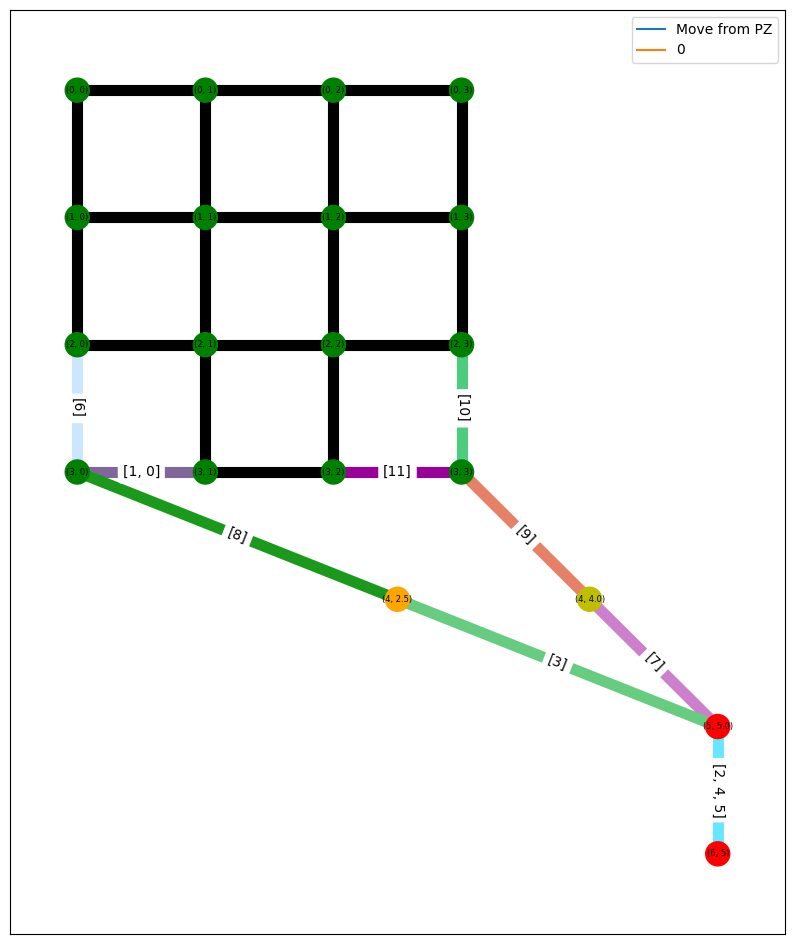

moving_ion 1
used_junctions {5: (5, 5.0), 7: (4, 4.0), 9: (3, 3), 10: (2, 3), 3: (5, 5.0), 8: (4, 2.5), 0: (3, 0)}
moving_ion 1
イオンを押し出していくしかない
next_edge ((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})
current_edge ((3, 0), (3, 1))
prev_edge ((4, 2.5), (3, 0))
next_edge ((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})


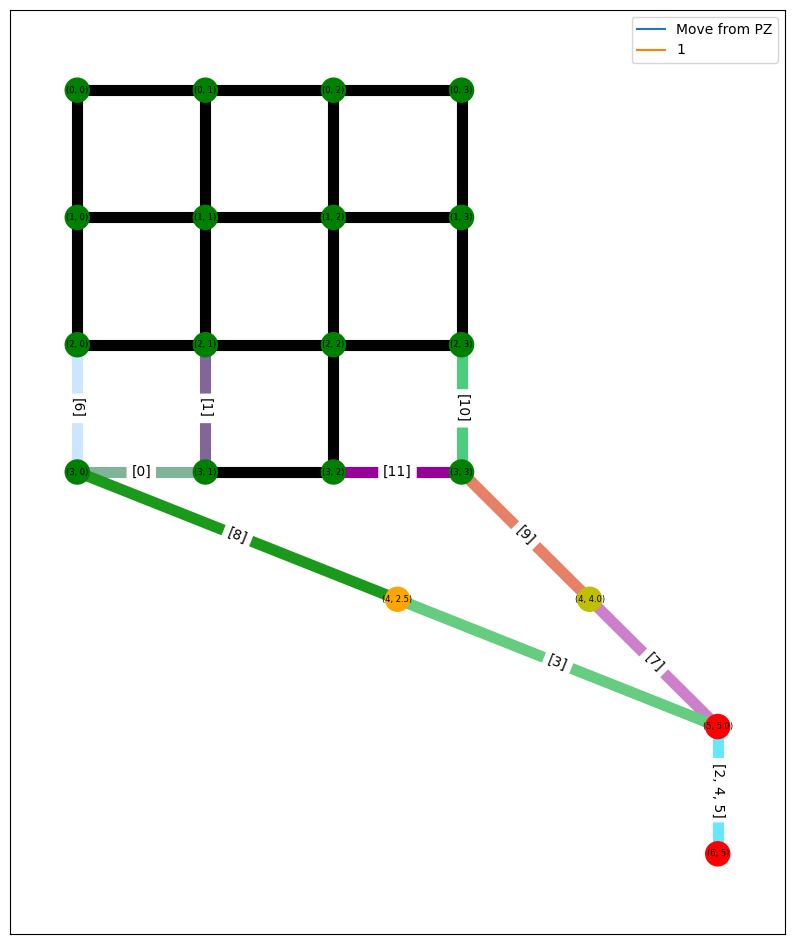

process gates
time step: 10, execution of gate (8/12) on qubit(s) [5]
Next Node ID: 0, qindices: [7]
unique_seq [7, 9, 10, 11]
move_list [7, 9, 10, 11]
go to PZ


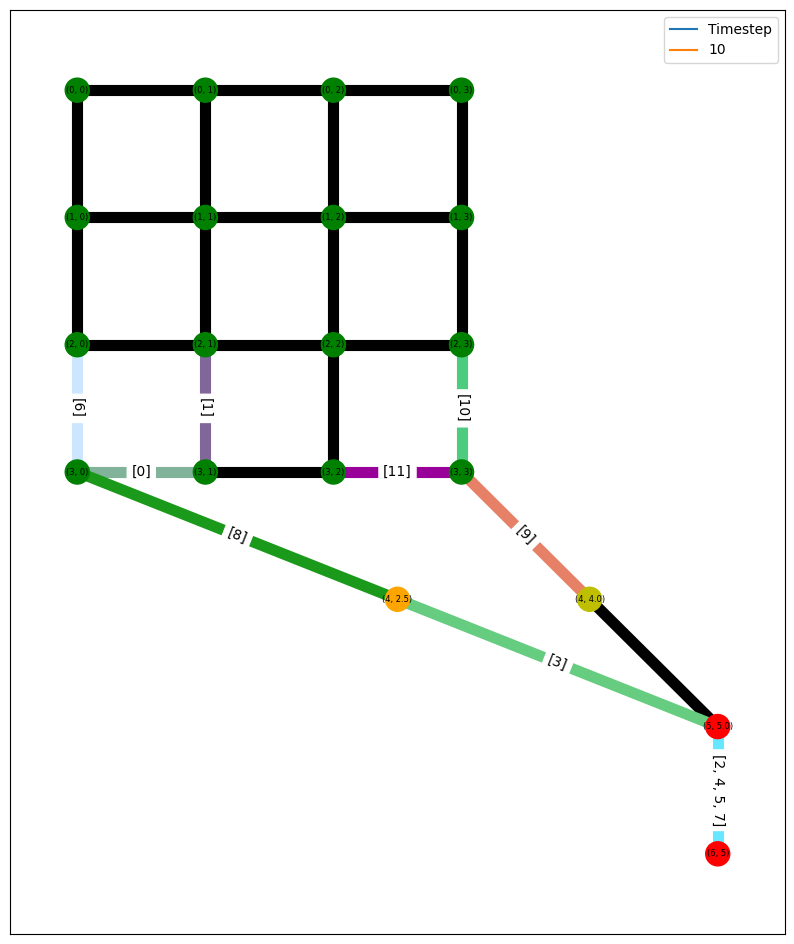

go to PZ


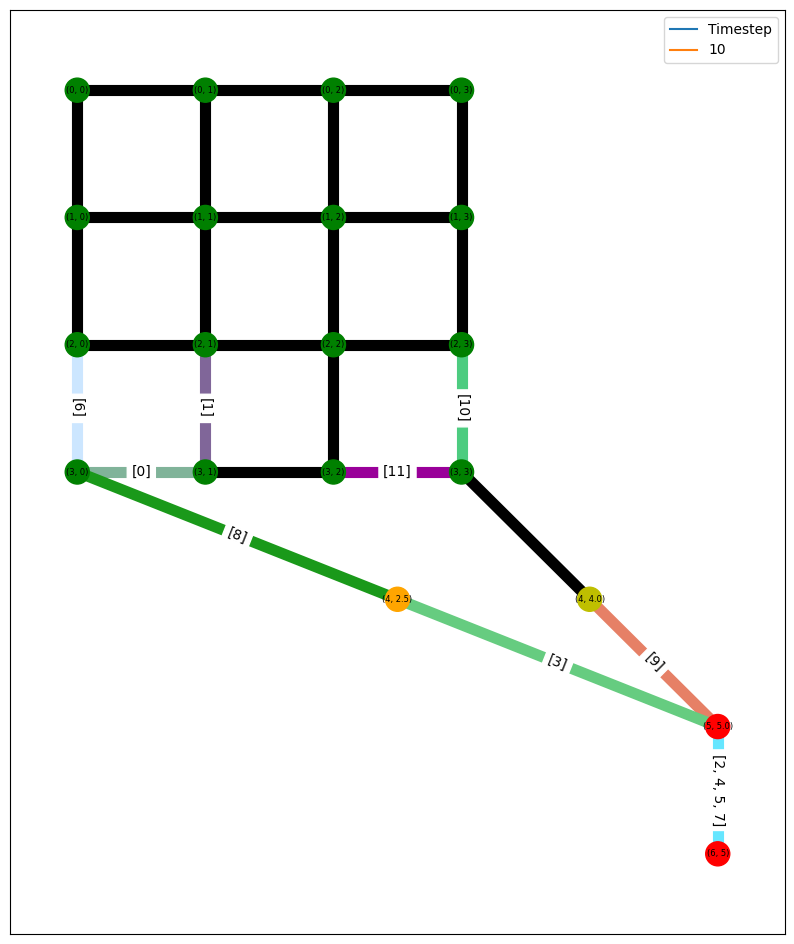

go to PZ


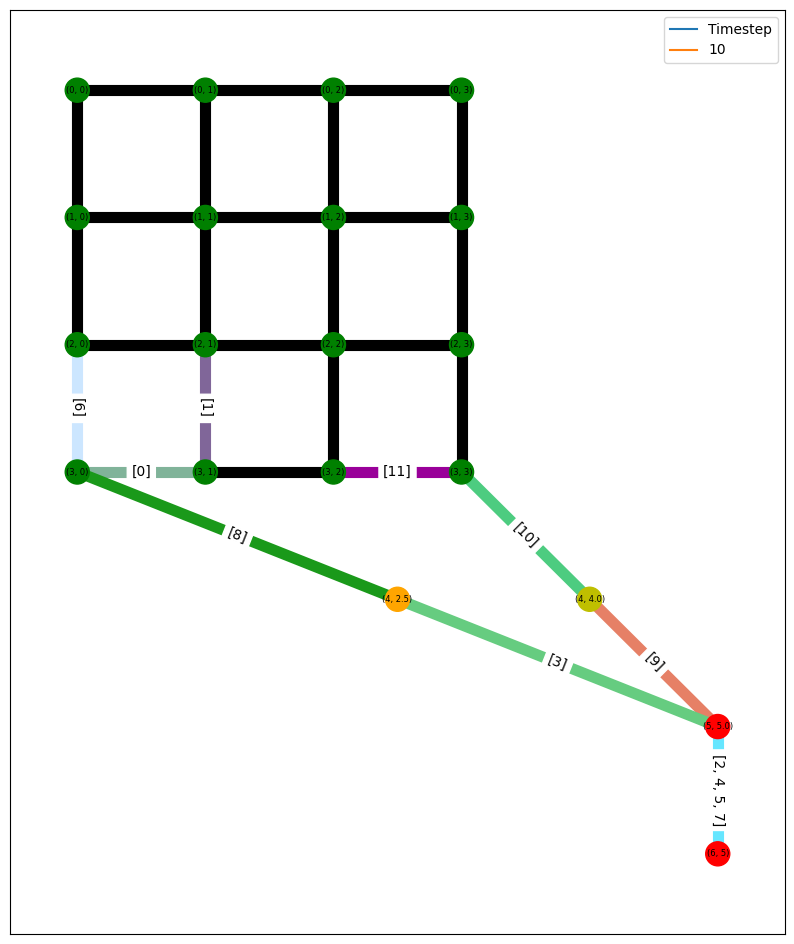

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [3], 'ion_chain': ''})]


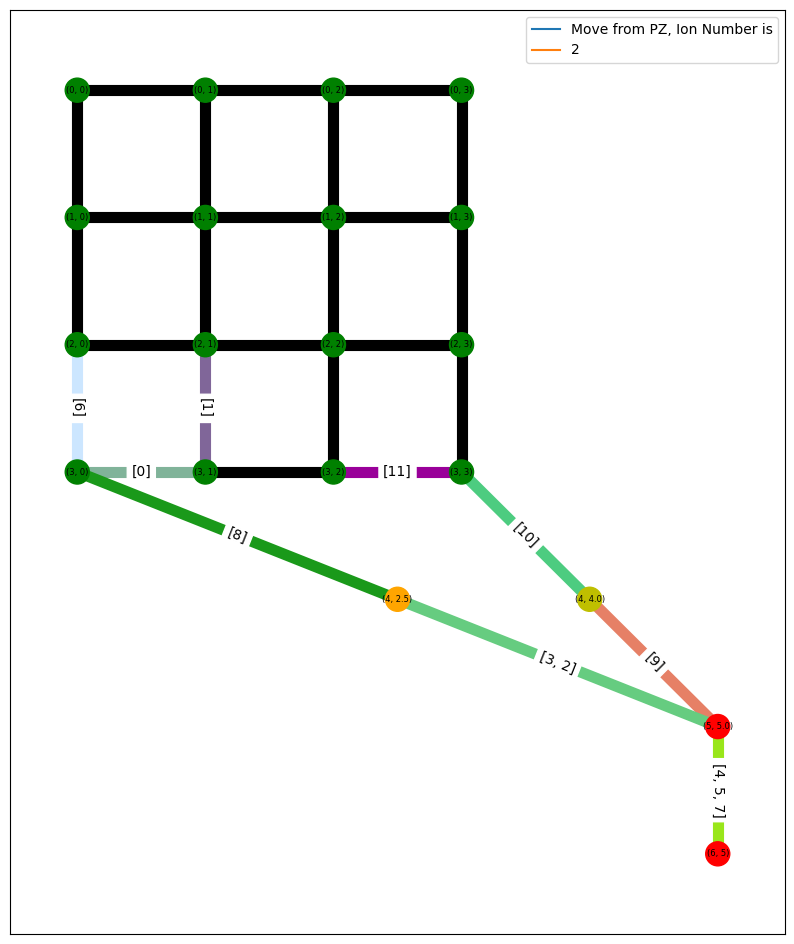

moving_ion 3
used_junctions {7: (5, 5.0), 9: (4, 4.0), 10: (3, 3), 2: (5, 5.0)}
moving_ion 3
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [9], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [4, 5, 7], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [8], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [8], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [8], 'ion_chain': ''})


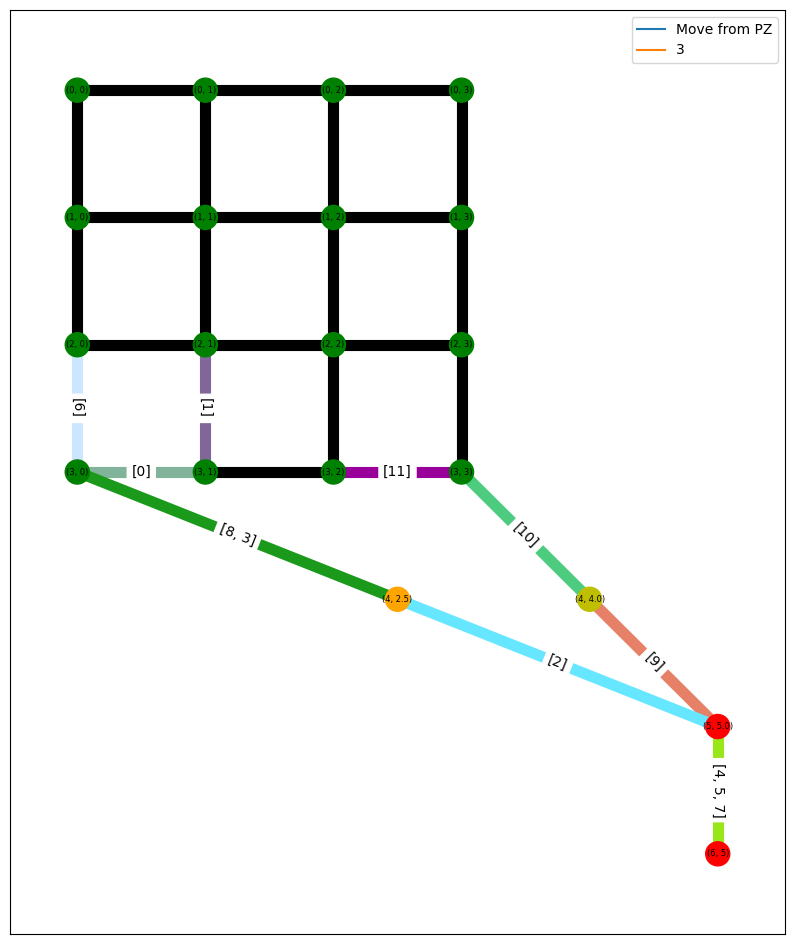

moving_ion 8
used_junctions {7: (5, 5.0), 9: (4, 4.0), 10: (3, 3), 2: (5, 5.0), 3: (4, 2.5)}
moving_ion 8
イオンを押し出していくしかない
next_edge None
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
ad ((4, 2.5), (5, 5.0), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [2], 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})
candidates [((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''}), ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})


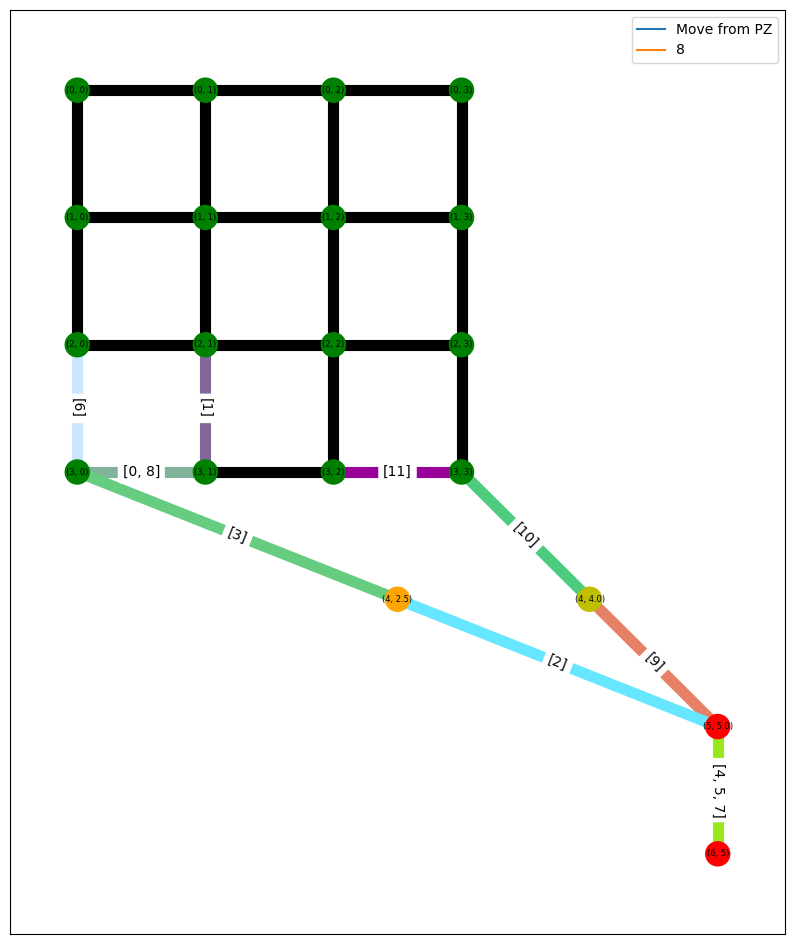

moving_ion 0
used_junctions {7: (5, 5.0), 9: (4, 4.0), 10: (3, 3), 2: (5, 5.0), 3: (4, 2.5), 8: (3, 0)}
moving_ion 0
イオンを押し出していくしかない
next_edge ((3, 1), (3, 2), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})
current_edge ((3, 0), (3, 1))
prev_edge ((4, 2.5), (3, 0))
next_edge ((3, 1), (3, 2), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})


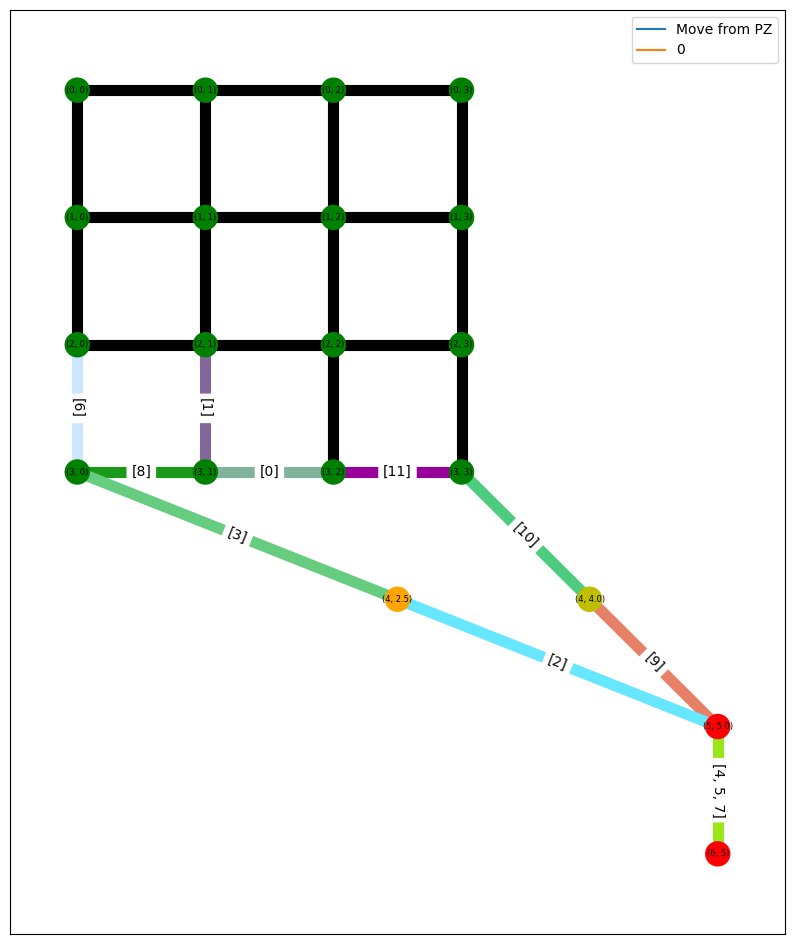

process gates
time step: 11, execution of gate (9/12) on qubit(s) [7]
Next Node ID: 0, qindices: [9]
unique_seq [9, 10, 11]
move_list [9, 10, 11]
go to PZ


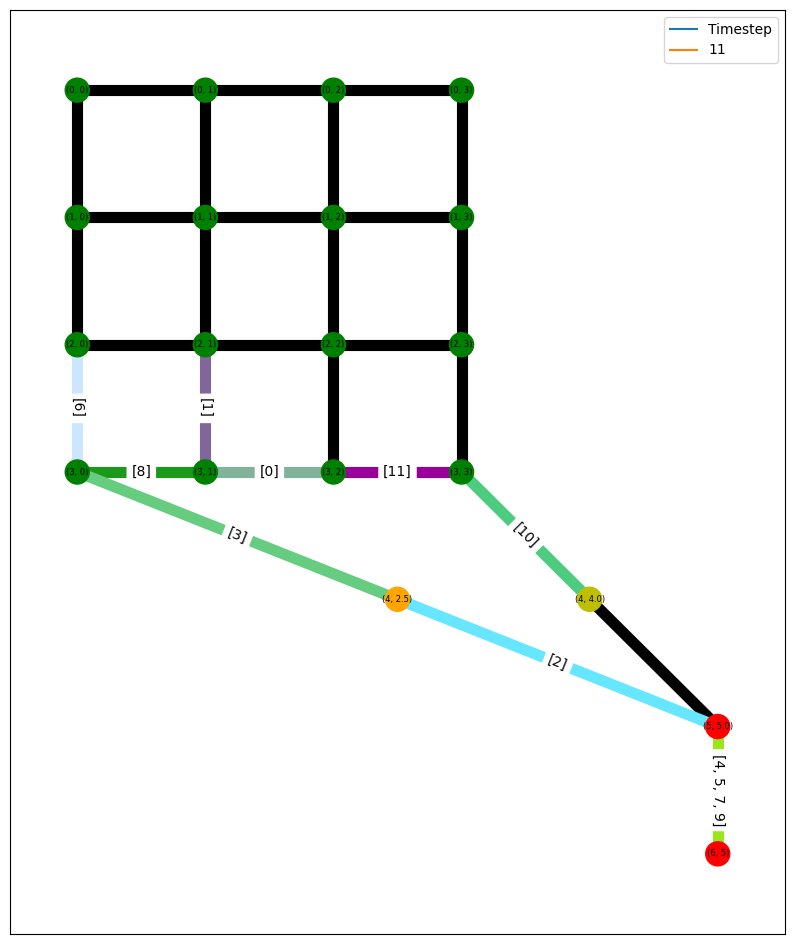

go to PZ


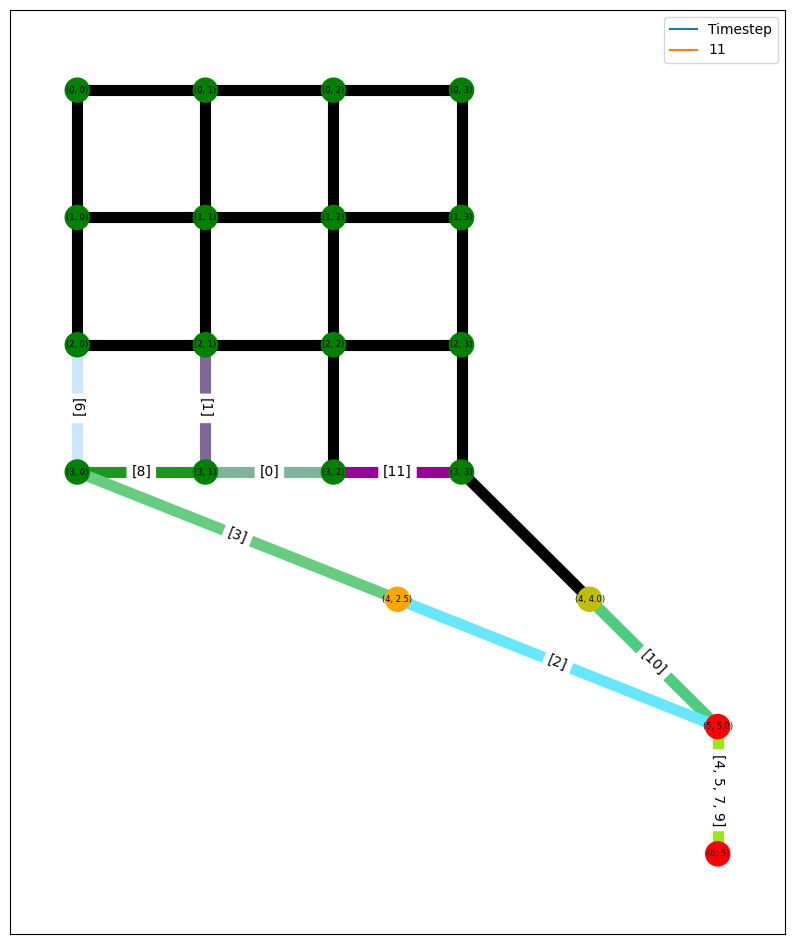

go to PZ


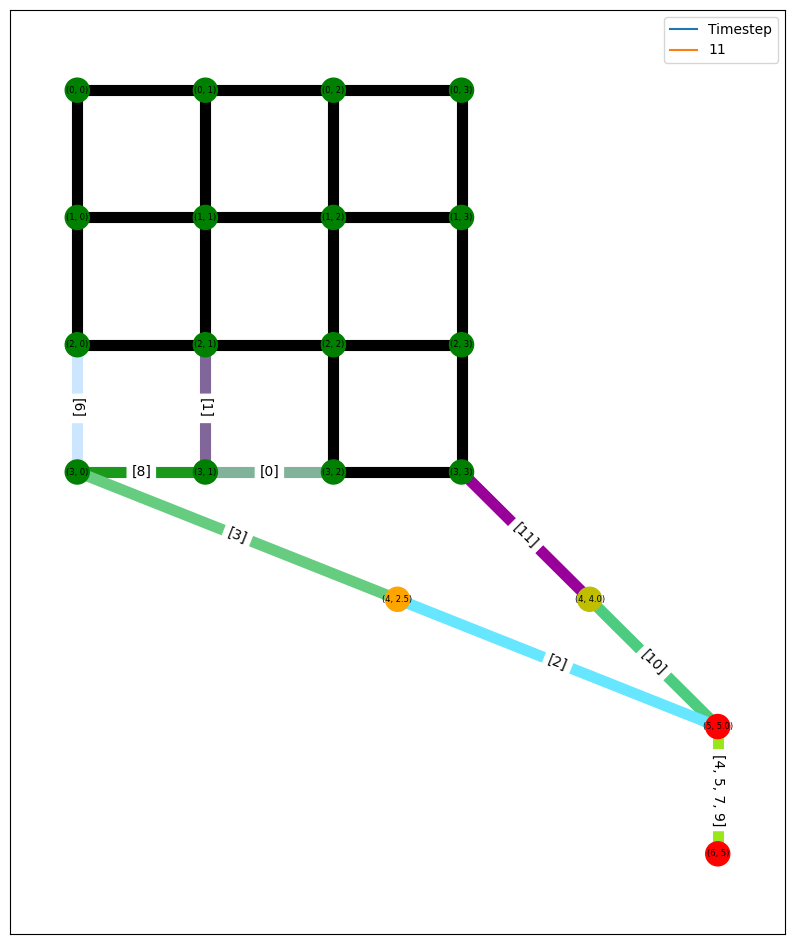

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [2], 'ion_chain': ''})]


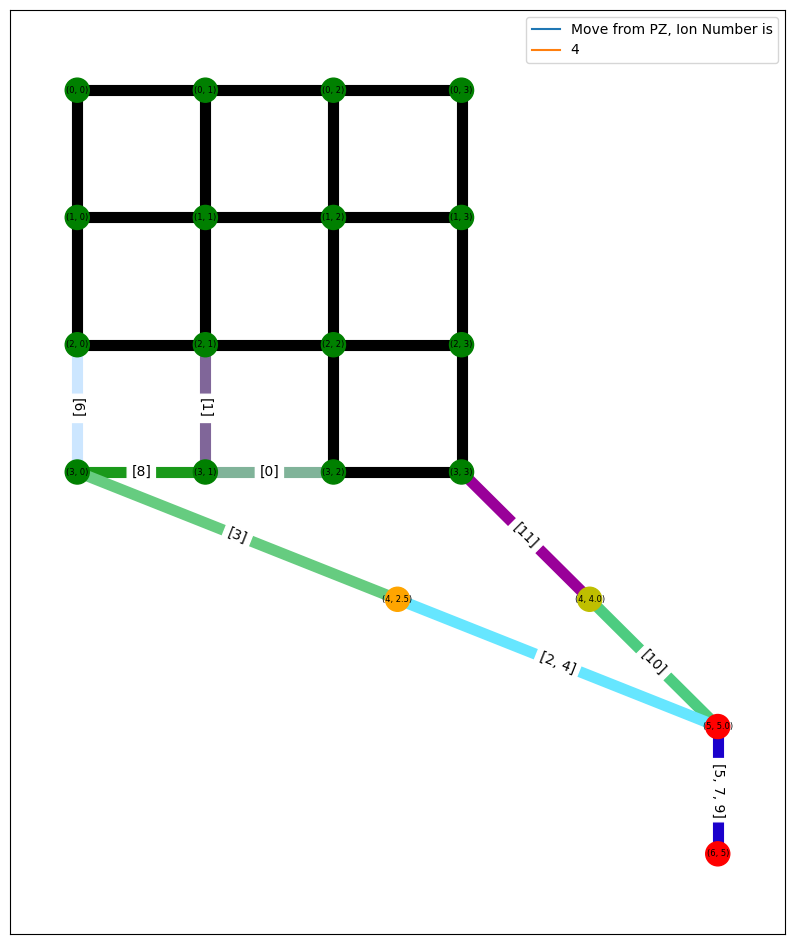

moving_ion 2
used_junctions {9: (5, 5.0), 10: (4, 4.0), 11: (3, 3), 4: (5, 5.0)}
moving_ion 2
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [10], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [5, 7, 9], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [3], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [3], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [3], 'ion_chain': ''})


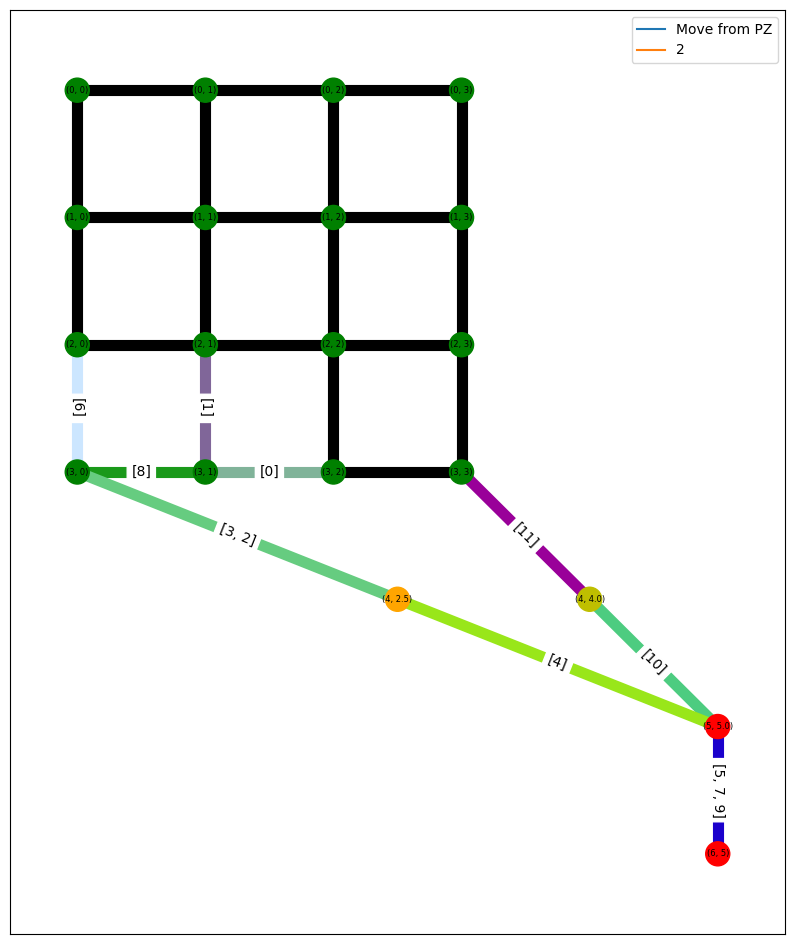

moving_ion 3
used_junctions {9: (5, 5.0), 10: (4, 4.0), 11: (3, 3), 4: (5, 5.0), 2: (4, 2.5)}
moving_ion 3
イオンを押し出していくしかない
next_edge None
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
ad ((4, 2.5), (5, 5.0), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [4], 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})
candidates [((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''}), ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [6], 'color': 'k', 'ion_chain': ''})


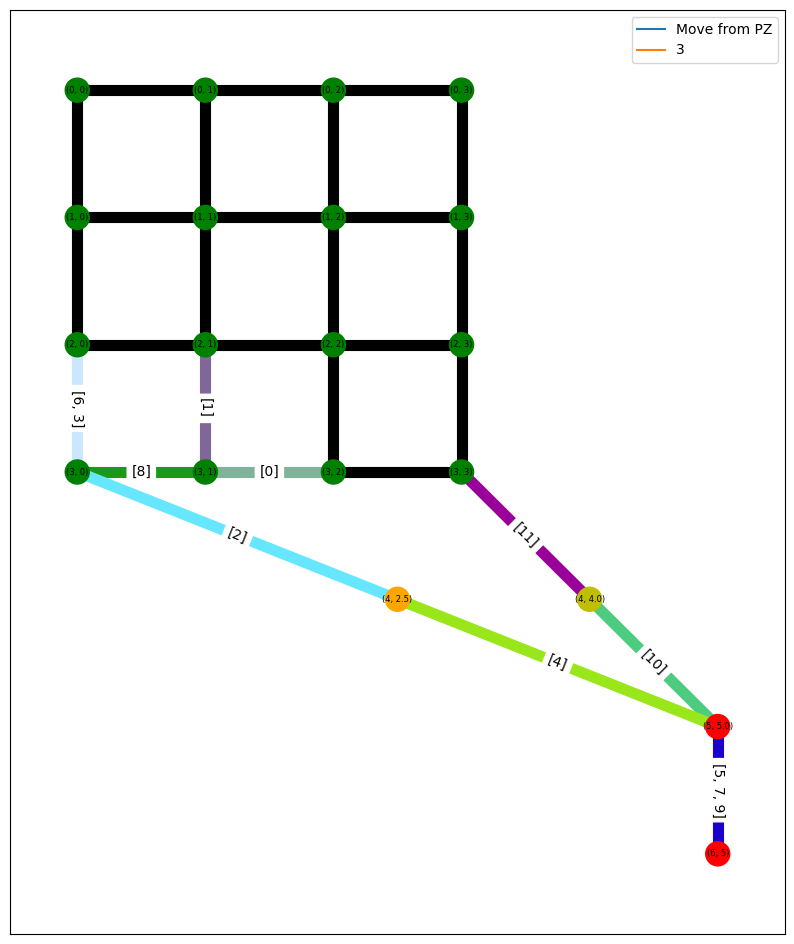

moving_ion 6
used_junctions {9: (5, 5.0), 10: (4, 4.0), 11: (3, 3), 4: (5, 5.0), 2: (4, 2.5), 3: (3, 0)}
moving_ion 6
イオンを押し出していくしかない
next_edge ((2, 0), (1, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k'})
current_edge ((3, 0), (2, 0))
prev_edge ((4, 2.5), (3, 0))
next_edge ((2, 0), (1, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k'})


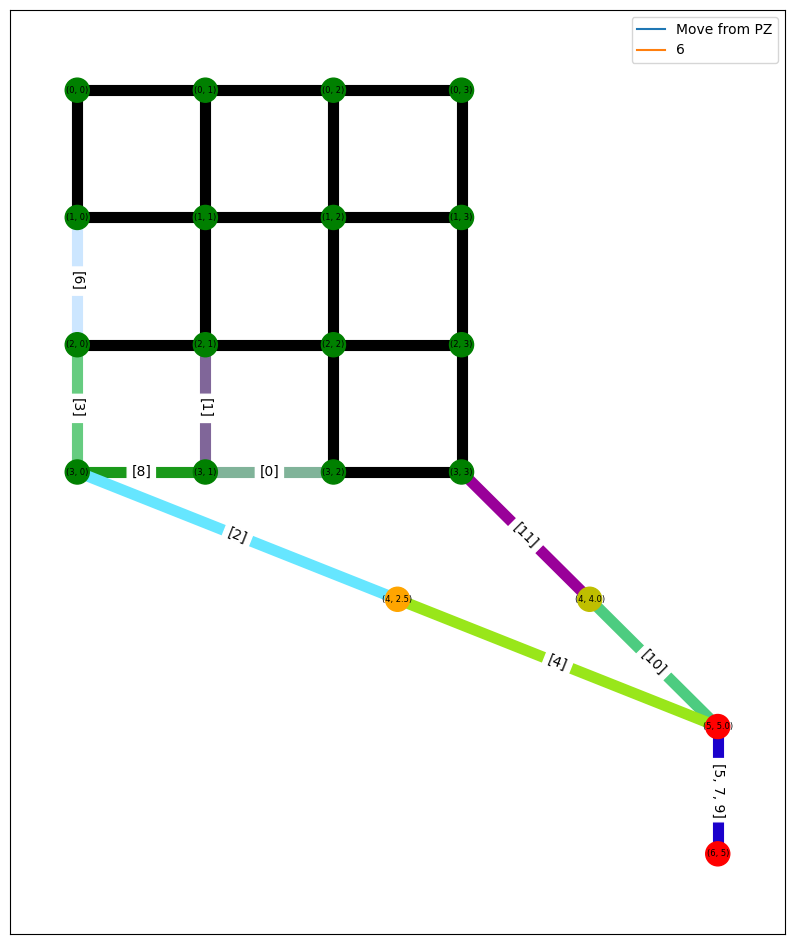

process gates
time step: 12, execution of gate (10/12) on qubit(s) [9]
Next Node ID: 0, qindices: [10]
unique_seq [10, 11]
move_list [10, 11]
go to PZ


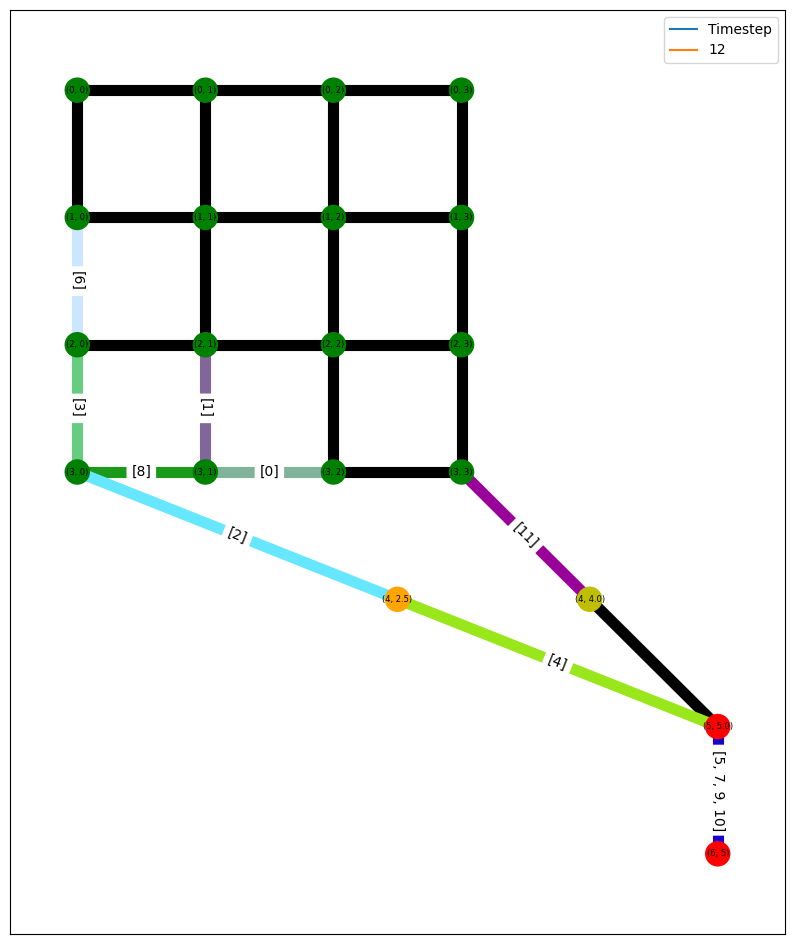

go to PZ


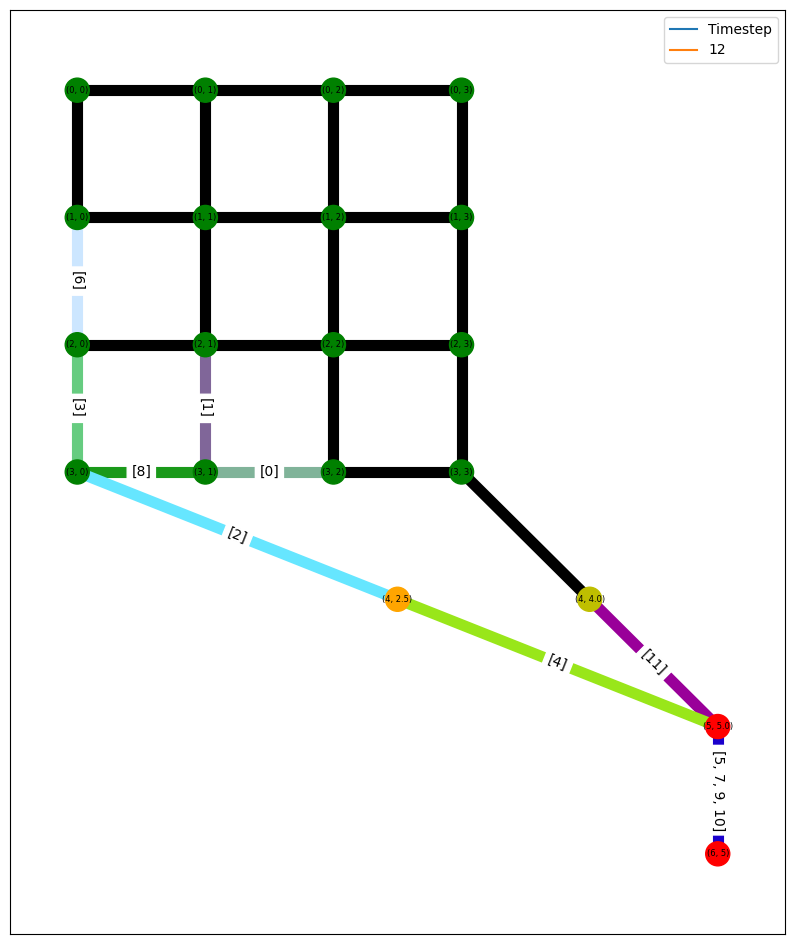

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [4], 'ion_chain': ''})]


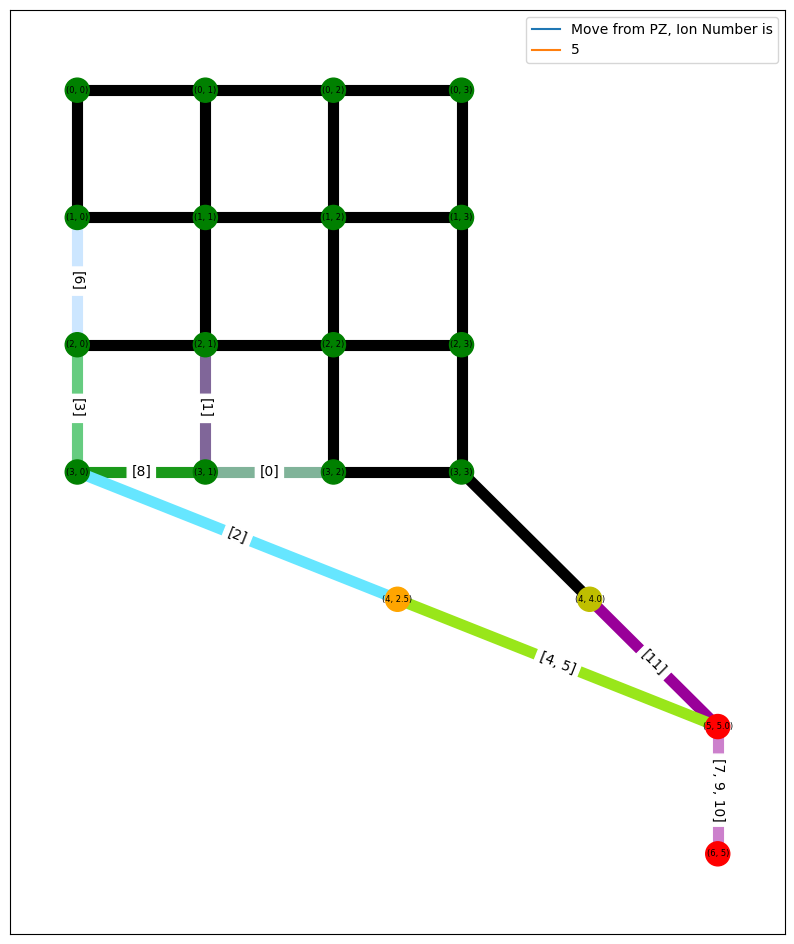

moving_ion 4
used_junctions {10: (5, 5.0), 11: (4, 4.0), 5: (5, 5.0)}
moving_ion 4
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [11], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [7, 9, 10], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [2], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [2], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [2], 'ion_chain': ''})


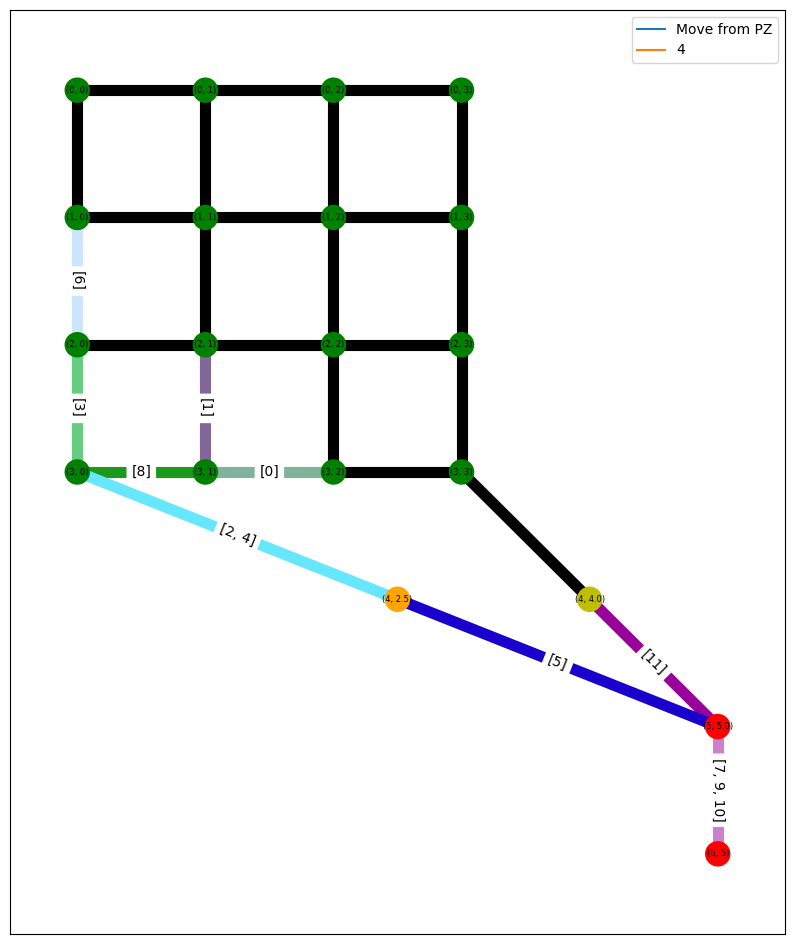

moving_ion 2
used_junctions {10: (5, 5.0), 11: (4, 4.0), 5: (5, 5.0), 4: (4, 2.5)}
moving_ion 2
イオンを押し出していくしかない
next_edge None
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
ad ((4, 2.5), (5, 5.0), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [5], 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [3], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})
candidates [((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [3], 'color': 'k', 'ion_chain': ''}), ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})


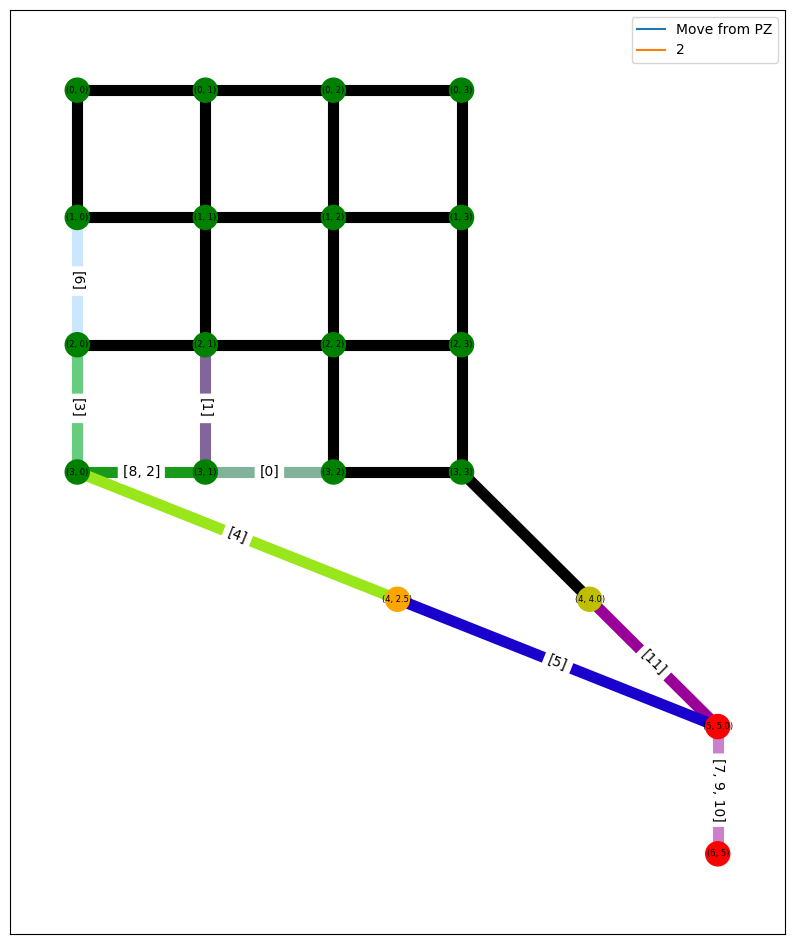

moving_ion 8
used_junctions {10: (5, 5.0), 11: (4, 4.0), 5: (5, 5.0), 4: (4, 2.5), 2: (3, 0)}
moving_ion 8
イオンを押し出していくしかない
next_edge None
current_edge ((3, 0), (3, 1))
prev_edge ((4, 2.5), (3, 0))
ad ((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [1], 'color': 'k', 'ion_chain': ''})
ad ((3, 1), (3, 2), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [3], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (4, 2.5), {'edge_type': 'entry', 'color': 'k', 'ions': [4], 'ion_chain': ''})
candidates [((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [1], 'color': 'k', 'ion_chain': ''}), ((3, 1), (3, 2), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [1], 'color': 'k', 'ion_chain': ''})


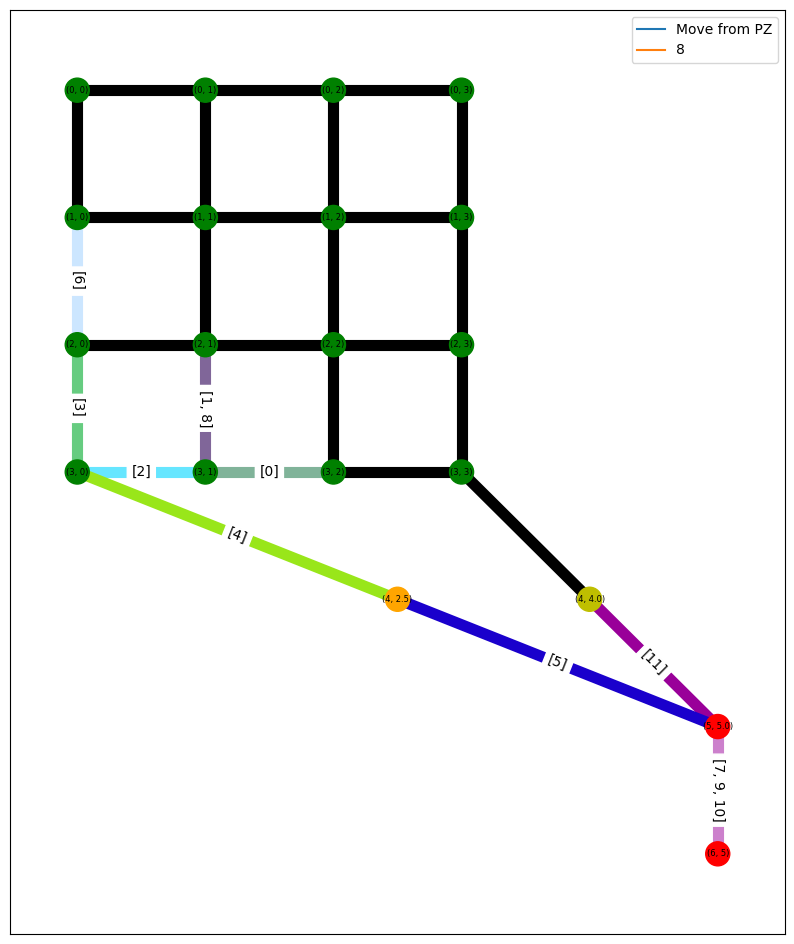

moving_ion 1
used_junctions {10: (5, 5.0), 11: (4, 4.0), 5: (5, 5.0), 4: (4, 2.5), 2: (3, 0), 8: (3, 1)}
moving_ion 1
イオンを押し出していくしかない
next_edge ((2, 1), (1, 1), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})
current_edge ((3, 1), (2, 1))
prev_edge ((3, 0), (3, 1))
next_edge ((2, 1), (1, 1), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})


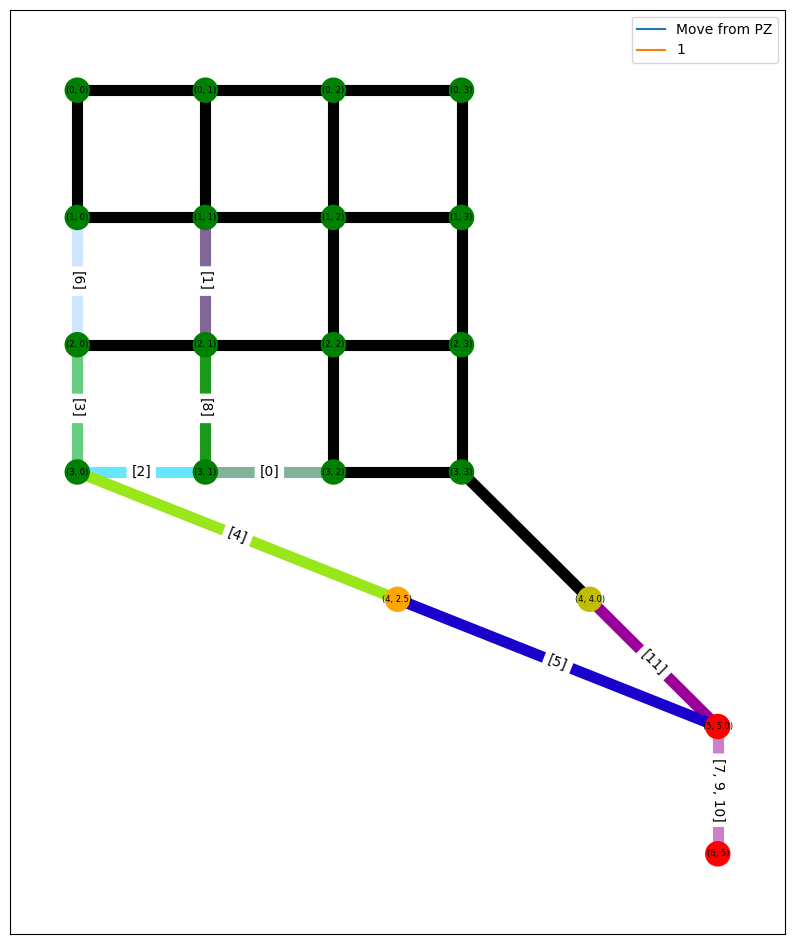

process gates
time step: 13, execution of gate (11/12) on qubit(s) [10]
Next Node ID: 0, qindices: [11]
unique_seq [11]
move_list [11]
go to PZ


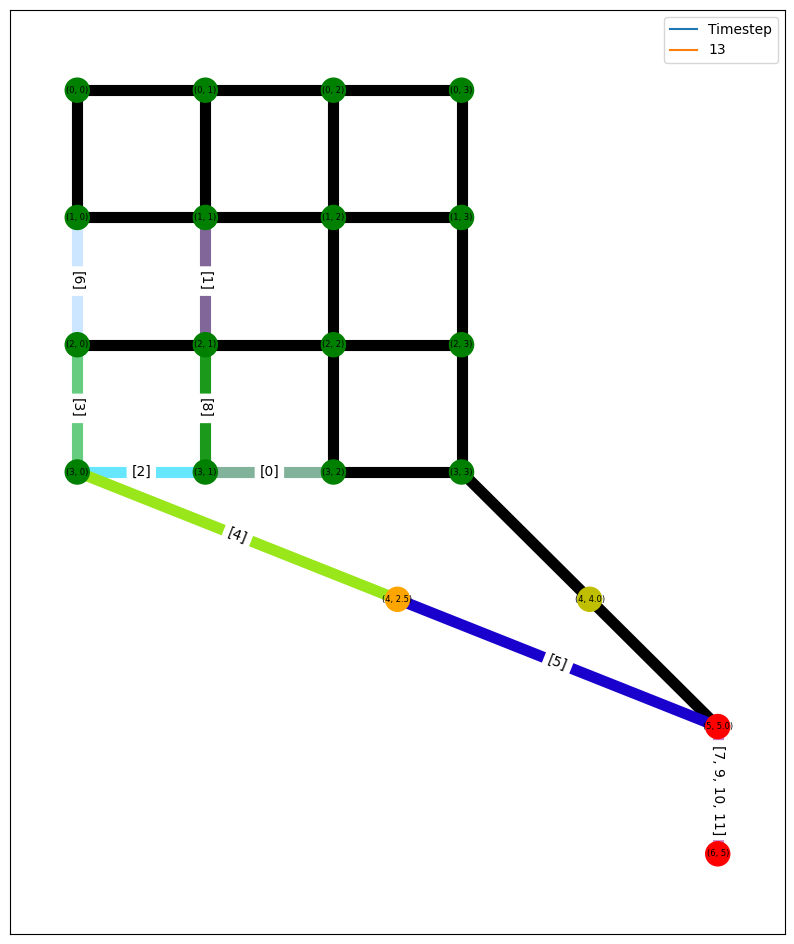

process pz
candidates [((5, 5.0), (4, 2.5), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [5], 'ion_chain': ''})]


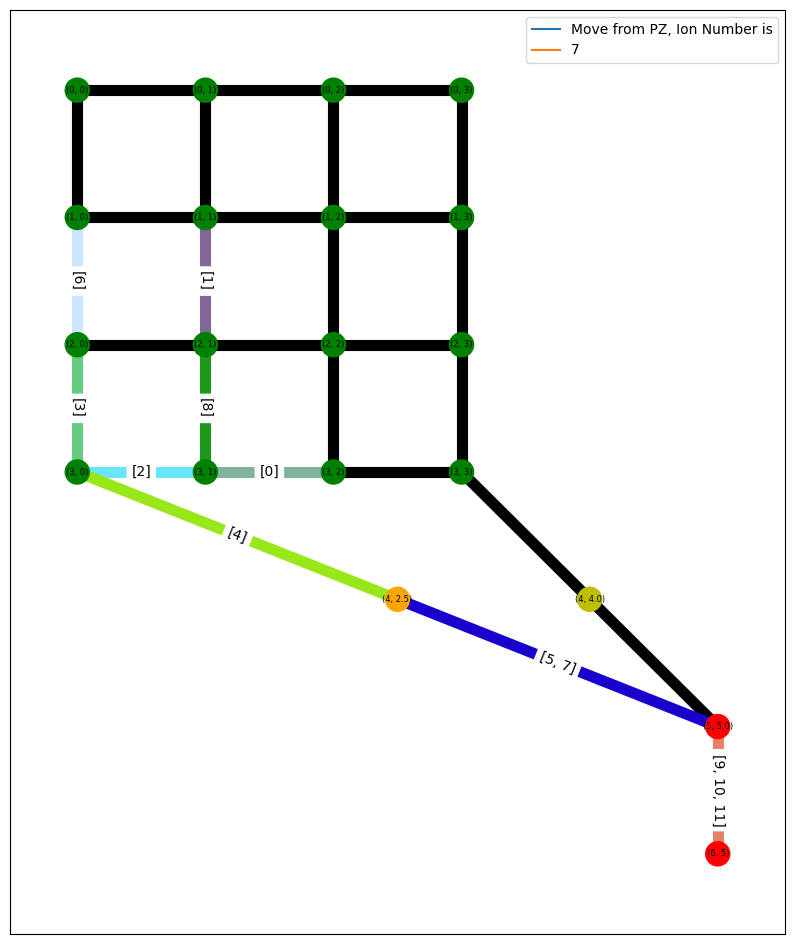

moving_ion 5
used_junctions {11: (5, 5.0), 7: (5, 5.0)}
moving_ion 5
イオンを押し出していくしかない
next_edge None
current_edge ((5, 5.0), (4, 2.5))
prev_edge ((5, 5.0), (6, 5))
ad ((5, 5.0), (4, 4.0), {'edge_type': 'exit', 'color': 'k', 'ions': [], 'ion_chain': ''})
ad ((5, 5.0), (6, 5), {'edge_type': 'parking_edge', 'color': 'k', 'ions': [9, 10, 11], 'ion_chain': ''})
ad ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [4], 'ion_chain': ''})
candidates [((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [4], 'ion_chain': ''})]
next_edge ((4, 2.5), (3, 0), {'edge_type': 'entry', 'color': 'k', 'ions': [4], 'ion_chain': ''})


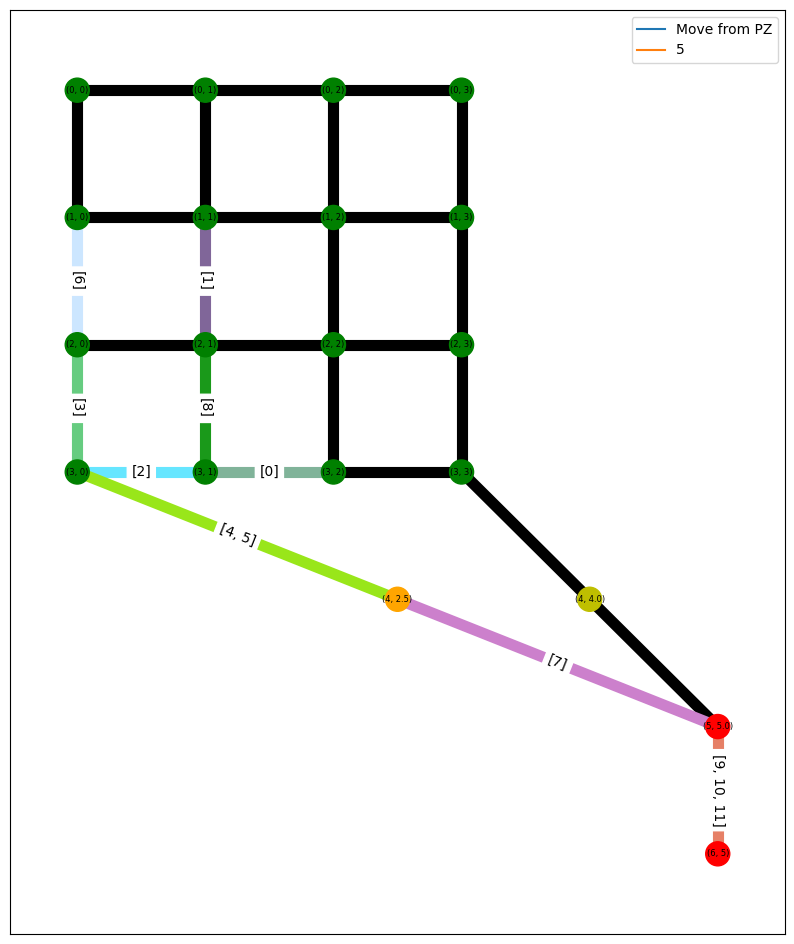

moving_ion 4
used_junctions {11: (5, 5.0), 7: (5, 5.0), 5: (4, 2.5)}
moving_ion 4
イオンを押し出していくしかない
next_edge None
current_edge ((4, 2.5), (3, 0))
prev_edge ((5, 5.0), (4, 2.5))
ad ((4, 2.5), (5, 5.0), {'edge_type': 'first_entry_connection', 'color': 'k', 'ions': [7], 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [3], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [2], 'color': 'k', 'ion_chain': ''})
candidates [((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [3], 'color': 'k', 'ion_chain': ''}), ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [2], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 0), (3, 1), {'edge_type': 'trap', 'ions': [2], 'color': 'k', 'ion_chain': ''})


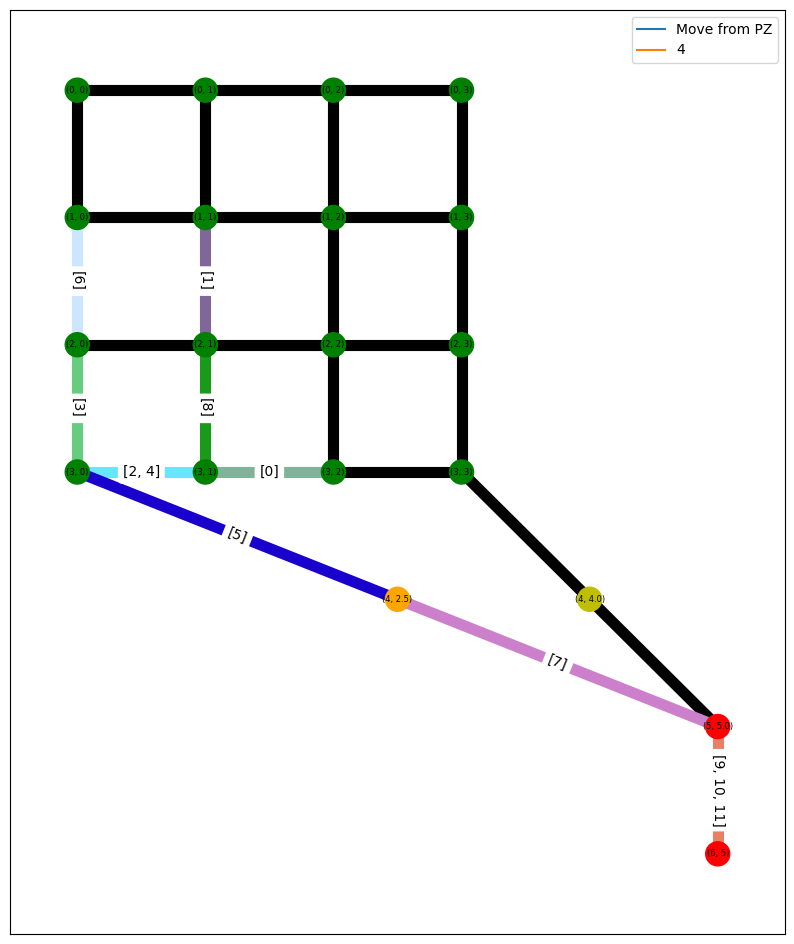

moving_ion 2
used_junctions {11: (5, 5.0), 7: (5, 5.0), 5: (4, 2.5), 4: (3, 0)}
moving_ion 2
イオンを押し出していくしかない
next_edge None
current_edge ((3, 0), (3, 1))
prev_edge ((4, 2.5), (3, 0))
ad ((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})
ad ((3, 1), (3, 2), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (2, 0), {'edge_type': 'trap', 'ions': [3], 'color': 'k', 'ion_chain': ''})
ad ((3, 0), (4, 2.5), {'edge_type': 'entry', 'color': 'k', 'ions': [5], 'ion_chain': ''})
candidates [((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''}), ((3, 1), (3, 2), {'edge_type': 'trap', 'ions': [0], 'color': 'k', 'ion_chain': ''})]
next_edge ((3, 1), (2, 1), {'edge_type': 'trap', 'ions': [8], 'color': 'k', 'ion_chain': ''})


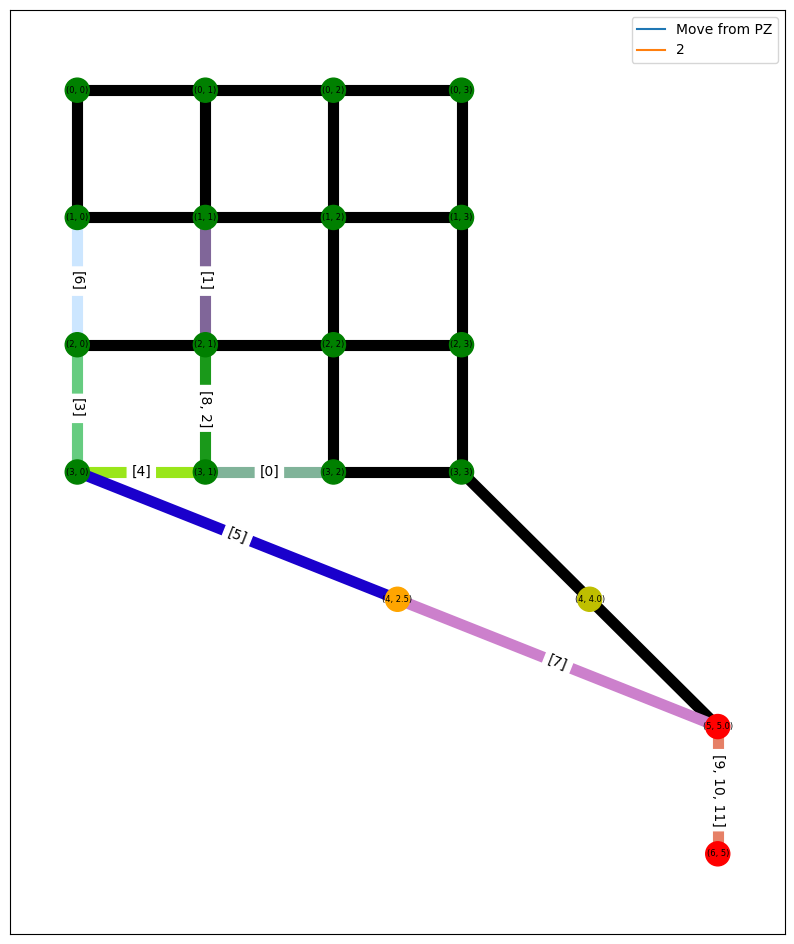

moving_ion 8
used_junctions {11: (5, 5.0), 7: (5, 5.0), 5: (4, 2.5), 4: (3, 0), 2: (3, 1)}
moving_ion 8
イオンを押し出していくしかない
next_edge ((2, 1), (2, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})
current_edge ((3, 1), (2, 1))
prev_edge ((3, 0), (3, 1))
next_edge ((2, 1), (2, 0), {'edge_type': 'trap', 'ions': [], 'color': 'k', 'ion_chain': ''})


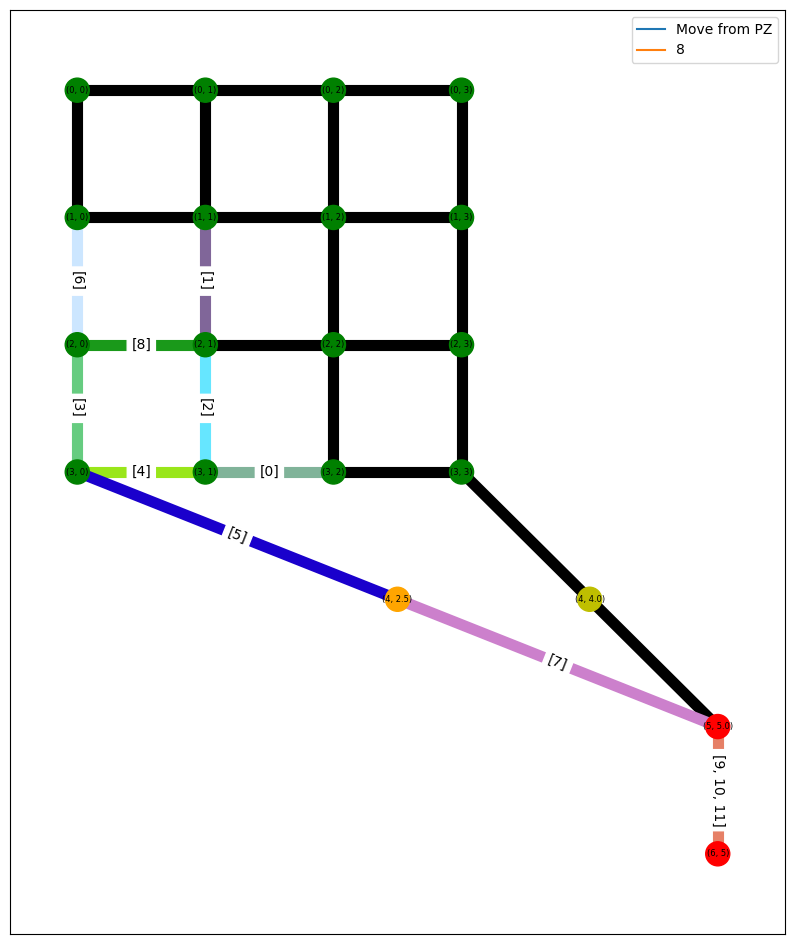

process gates
time step: 14, execution of gate (12/12) on qubit(s) [11]

Full Sequence executed in 14 time steps


In [11]:
from main import run_simulation
run_simulation(G, graph_creator, seq, flat_seq, dag_dep, next_node, init_seq_len)